<a href="https://colab.research.google.com/github/WalterPiTheScienceGuy/PiperPiTry/blob/master/DISSERTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Before running this cell, For optimal processing, first change runtime type to high-RAM with GPU or TPU acceleration

#Now, let's link to your GoogleDrive. Run this cell and follow the authorization instructions:
#(We recommend putting a copy of the github repo in your google drive if you are using the demo "examples")
 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams
import matplotlib.ticker as mtick
from cycler import cycler
from glob import glob
#import tensorflow as tf
import pandas as pd
#import tensorflow as tf

#Might want these later:
#pip install Tensorflow==2.3.0
#pip install --upgrade tensorflow-probability

In [ ]:
colorscheme=['#7fca76', '#982a25', '#000000', '#071576', '#c4f418']#, '#7ebef8', '#fc5931', '#D3D3D3']
plt.rcParams['axes.prop_cycle'] = cycler(color=colorscheme)
plt.rcParams['legend.frameon'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['figure.figsize'] = 12,6
np.set_printoptions(precision=2) 

In [ ]:
np.set_printoptions(precision=4) #Control precision of numbers in text.

#Shows visualization style defaults that can be changed through plt.rcParams['SETTING NAME']=SETTING
#plt.rcParams.keys() 
# Change default plot settings:
plt.rcParams['figure.figsize'] = 12,6
plt.rcParams['figure.titlesize'] = 'x-large'
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['axes.titlesize'] = 'x-large'
# Colors generated using http://vrl.cs.brown.edu/color #a2e67c
#plt.rcParams['axes.prop_cycle'] = cycler(color=['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c']) #538 style
colorscheme=['#7fca76', '#982a25', '#000000', '#071576', '#c4f418']#, '#7ebef8', '#fc5931', '#D3D3D3']
plt.rcParams['axes.prop_cycle'] = cycler(color=colorscheme)
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['legend.framealpha'] = 1
plt.rcParams['legend.frameon'] = False

#ttl_font_path = os.path.join(rcParams['datapath'], 'fonts\\ttf\\Raleway-SemiBoldItalic.ttf')
#ttl_font_prop = fm.FontProperties(fname=ttl_font_path)
#axis_font_path = os.path.join(rcParams['datapath'], 'fonts\\ttf\\Raleway-SemiBoldItalic.ttf')
#axis_font_prop = fm.FontProperties(fname=axis_font_path)

In [ ]:
import time
creation1 = time.time() #Start timer (for arbitrary purpose of measuring time during development or execution)

In [ ]:
# Helper functions
def ETimes(dDoric, NumEvents, SilencePrint=False):
    """
    Returns exact times and index values of square wave rise and fall in 2 pandas Series
    """
    tE = dDoric['t'][1:]
    E = dDoric['Events'].values
    Erise = tE[(E[1:]-E[:-1]) > 0] #Obtain index and time values for rising and falling edges of Event Channel square wave
    Efall = tE[(E[1:]-E[:-1]) < 0]
    if len(Erise) != NumEvents:
        Erisekeysdrop = Erise[1:].iloc[(Erise[1:].keys()-Erise[:-1].keys())==1].keys()
        Erise = Erise.drop(Erisekeysdrop)
    if SilencePrint==False: print(Erise)
    if len(Efall) != NumEvents:
        Efallkeysdrop = Efall[1:].iloc[(Efall[1:].keys()-Efall[:-1].keys())==1].keys()
        Efall = Efall.drop(Efallkeysdrop)
    if SilencePrint==False: 
        print(Efall)
        if len(Erise) == len(Efall): 
            print('Erise and Efall same length.')
            print('Length: '+str(len(Erise)))
            print('NumEvents = '+str(NumEvents))
        else: 
            print('WARNING: Erise and Efall NOT EQUAL LENGTH!')
            print('Erise length: '+str(len(Erise)))
            print('Efall length: '+str(len(Efall)))
            print('NumEvents = '+str(NumEvents))
    return(Erise, Efall) 

def PlotEvents(dDoric, Erise, Efall, EventDict, ID, ProtType, printEventDict=False, returnAxes=None, PlotEventNum=None, left_buffer=20, right_buffer=20):
    NumEvents_dict = {'LTMUUS':8, 'PTC':12, '5CS3UUS':10, 'DiscPTC':17, 'DiscLTM':15}
    NumEvents = NumEvents_dict[ProtType]
    plt.rcParams["figure.figsize"] = [14, 3]
    plt.rcParams["font.size"] = 18
    if returnAxes==None: fig,ax=plt.subplots()
    elif returnAxes!=None:
        ax=returnAxes
    ax.plot(dDoric['t'], dDoric['Events'], color='y', linewidth=3)
    ax.set_xlabel('Time(s)')
    ax.set_yticks([0,1])
    ax.set_yticklabels(['OFF','ON'])
    if ProtType in ['LTMUUS','5CS3UUS','DiscLTM']:
        if printEventDict==True: print(EventDict.items())
        ###
        if PlotEventNum==None:
            ax.set_xlim(xmin=Erise.iloc[0], xmax=np.max([Efall.iloc[-1], 1475]))
        else: ax.set_xlim(xmin=Erise.iloc[PlotEventNum]-left_buffer, xmax=Efall.iloc[PlotEventNum]+right_buffer)
        ###
        ax.set_ylim(0, 1.2)
        if PlotEventNum==None: ###
            for i,EvDict in enumerate(EventDict.items()):
                if i > 0 and i < NumEvents-1: ax.annotate(s=EvDict[0], xy=(EvDict[1][0][1], 0.85))
                elif i == 0: ax.annotate(s='start\nt=0', xy=(EvDict[1][0][1]+5, 0.70))
                elif i == NumEvents-1: ax.annotate(s=EvDict[0], xy=(EvDict[1][0][1], 0.70))
        else: 
            ax.annotate(s=Erise.keys()[PlotEventNum],xy=(EventDict[Erise.keys()[PlotEventNum]][0][1], 0.70))
    elif ProtType=='PTC':
        if printEventDict==True: print(EventDict.items())
        CSset={1,3,5,7,9}
        USset={2,4,6,8,10}
        ###
        if PlotEventNum==None:
            ax.set_xlim(xmin=Erise.iloc[0], xmax=np.max([Efall.iloc[-1], 1890]))
        else: ax.set_xlim(xmin=Erise.iloc[PlotEventNum]-left_buffer, xmax=Efall.iloc[PlotEventNum]+right_buffer)
        ###
        ax.set_ylim(0, 1.2)
        if PlotEventNum==None: ###
            for i,EvDict in enumerate(EventDict.items()):
                if i > 0 and i < NumEvents-1: 
                    if i in CSset: ax.annotate(s=EvDict[0], xy=(EvDict[1][0][1], 1.05))
                    elif i in USset: ax.annotate(s=EvDict[0], xy=(EvDict[1][0][1], 0.90))
                elif i == 0: ax.annotate(s='start\nt=0', xy=(EvDict[1][0][1]+5, 0.70))
                elif i == NumEvents-1: ax.annotate(s=EvDict[0], xy=(EvDict[1][0][1], 0.70))
        
    ax.set_title(ID+' '+ProtType)
    if returnAxes==None: plt.show()
    elif returnAxes!=None: return(ax)
    
def csvfile_load(csvfile, ID, DemOrRaw='Dem', ProtType=None, plotEvents=False, expdecay=False, downsample=5, SilencePlots=False, NumEventsNum=None, Background_Autofl_tuple=(None,None), modifier_DiscPTC=None):
    #Load data frame and downsample to resolution in ms
    
    timemarker=time.time() #To report how long this function takes to run.
    
    dDoric = pd.read_csv(csvfile, skiprows=1)
    dDoric = pd.DataFrame(dDoric[['Time(s)','AIn-1 - Raw','AIn-1 - Dem (AOut-1)','AIn-2 - Raw','AIn-2 - Dem (AOut-2)','DI/O-2']])
    dDoric.columns = ['t','G_Raw','Green','R_Raw','Red','Events']
    
    NumEvents_dict = {'LTMUUS':8, 'PTC':12, '5CS3UUS':10, 'DiscPTC':17, 'DiscLTM':15, 'post':0}
    NumEvents = NumEvents_dict[ProtType]
    NameEvents_dict= {'LTMUUS':['start','CS1','CS2','CS3','CS4','CS5','UUS','end'],
                      'PTC':['start','CS1','US1','CS2','US2','CS3','US3','CS4','US4','CS5','US5','end'],
                      '5CS3UUS':['start','CS1','CS2','CS3','CS4','CS5','UUS1','UUS2','UUS3','end'],
                      'DiscPTC':['start','CSUS_alpha_1','CSUS_beta_1','CSUS_gamma_1','CSUS_alpha_2','CSUS_beta_2','CSUS_gamma_2','CSUS_alpha_3','CSUS_beta_3','CSUS_gamma_3','CSUS_alpha_4','CSUS_beta_4','CSUS_gamma_4','CSUS_alpha_5','CSUS_beta_5','CSUS_gamma_5','end'],
                      'DiscLTM':['start','CS_A_1','CS_B_1','CS_A_2','CS_B_2','CS_A_3','CS_B_3','CS_C_1','CS_D_1','CS_C_2','CS_D_2','CS_orig_1','CS_orig_2','CS_orig_3','end'],
                      'post':[]
                     }
    EventStrings = NameEvents_dict[ProtType]

    if len(dDoric) == len(dDoric.dropna()): 
        if SilencePlots==False:
            print('No null values')
    else: 
        if SilencePlots==False:print(ID)
        if SilencePlots==False:print(str(len(dDoric)-len(dDoric.dropna()))+' NULL VALUES')
        dDoric = dDoric.dropna()
        if SilencePlots==False:print('Null values dropped')

    silenceKwargs = {'SilencePrint': SilencePlots}
    if NumEvents > 0: 
        Erise, Efall = ETimes(dDoric, NumEvents, SilencePrint=True) #Custom function to return time of event signals from Arduino input
        #Set t=0 to offset of start wave
        dDoric['t'] = dDoric['t'] - Erise.iloc[0] #Set t=0 to offset of start wave
        Erise, Efall = ETimes(dDoric, NumEvents, **silenceKwargs) #Calculate times again after origin offset.

    #Downsample to specified downsample interval (ms) with median aggregate function
    dDoric['timedelta']=pd.to_timedelta(dDoric['t'].values, unit='S')
    dDoric.index=dDoric['timedelta']
    #intervalstring1='10ms'
    #dDoric = dDoric.resample(intervalstring1).median()
    #dDoric[['AIn-1 - Dem (AOut-1)','AIn-2 - Dem (AOut-2)']] = dDoric[['AIn-1 - Dem (AOut-1)','AIn-2 - Dem (AOut-2)']].rolling(3).mean()
    #intervalstring2=str(downsample)+'ms'
    #dDoric = dDoric.resample(intervalstring2).mean()

    if len(dDoric) == len(dDoric.dropna()): 
        if SilencePlots==False:print('No null values (Post-downsample)')
    else: 
        if SilencePlots==False:print(ID)
        if SilencePlots==False:print(str(len(dDoric)-len(dDoric.dropna()))+' NULL VALUES')
        dDoric = dDoric.dropna()
        if SilencePlots==False:print('Null values dropped (Post-downsample)')

    dDoric['ID']=ID
    
    if SilencePlots==False: 
        if plotEvents==True: #PLOT EVENTS WITH LABELS
            if NumEvents > 0: PlotEvents(dDoric, Erise, Efall, EventDict, ID, ProtType)
    print(str(time.time() - timemarker) + ' seconds (process time for loadDoric_from_csv)')
    if NumEvents > 0: 
        EventDict = {EventStrings[i]:((Erise.keys()[i],Erise.iloc[i]),(Efall.keys()[i],Efall.iloc[i])) for i in range(len(Erise))}
        Erise.index=EventStrings
        Efall.index=EventStrings
        EReturns = (Erise, Efall)
    else: 
        EReturns = None
        EventDict = None
    means_tuple_GR = None
    return( dDoric, EReturns, EventDict, means_tuple_GR, EventStrings )

def name_csvfile(Date1, ProtType, ID, Date2):
    csvfile = 'D:\\Doric_Data\\'+Date1+'\\'+ProtType+'_walter_285'+ID+'_'+Date2+'.csv'
    return(csvfile)

def plot_over_Events(dDoric, Erise, Efall, EventDict, ID, ProtType, PlotEventNum=None, left_buffer=20, right_buffer=20, z_yscale=[0.2,0.2], z_yoffset=[0.4,0.4], alphas=[0.7,0.7], multiplot=False):
    plt.rcParams["figure.figsize"] = [14, 8]
    plt.rcParams["font.size"] = 18
    if multiplot==False:
        fig, axes = plt.subplots(1,1,constrained_layout=True)
        dDoric.index=dDoric['t']
        if PlotEventNum != None:
            dDoric = dDoric.loc[Erise[PlotEventNum]-left_buffer:Efall[PlotEventNum]+right_buffer,:]
        axes = PlotEvents(dDoric, Erise, Efall, EventDict, ID, ProtType, printEventDict=False, returnAxes=axes, PlotEventNum=PlotEventNum, left_buffer=left_buffer, right_buffer=right_buffer)
        axes.plot(dDoric['t'],z_yoffset[0]+z_yscale[0]*(dDoric['Green'].values-dDoric['Green'].values.mean())/(dDoric['Green'].std()),color='k',alpha=alphas[0], label='NE_GRAB')
        #axes[1] = PlotEvents(dDoric, Erise, Efall, EventDict, ID, ProtType, printEventDict=False, returnAxes=axes[1], PlotEventNum=PlotEventNum, left_buffer=left_buffer, right_buffer=right_buffer)
        axes.plot(dDoric['t'],z_yoffset[1]+z_yscale[1]*(dDoric['Red'].values-dDoric['Red'].values.mean())/(dDoric['Red'].std()),color='r',alpha=alphas[1], label='mCherry')
        axes.legend()
        plt.show()
    elif multiplot==True:
        fig, axes = plt.subplots(2,1,constrained_layout=True)
        dDoric.index=dDoric['t']
        if PlotEventNum != None:
            dDoric = dDoric.loc[Erise[PlotEventNum]-left_buffer:Efall[PlotEventNum]+right_buffer,:]
        axes[0] = PlotEvents(dDoric, Erise, Efall, EventDict, ID, ProtType, printEventDict=False, returnAxes=axes[0], PlotEventNum=PlotEventNum, left_buffer=left_buffer, right_buffer=right_buffer)
        axes[0].plot(dDoric['t'],z_yoffset[0]+z_yscale[0]*(dDoric['Green'].values-dDoric['Green'].values.mean())/(dDoric['Green'].std()),color='k',alpha=alphas[0], label='NE_GRAB')
        #axes[1] = PlotEvents(dDoric, Erise, Efall, EventDict, ID, ProtType, printEventDict=False, returnAxes=axes[1], PlotEventNum=PlotEventNum, left_buffer=left_buffer, right_buffer=right_buffer)
        axes[0].plot(dDoric['t'],z_yoffset[1]+z_yscale[1]*(dDoric['Red'].values-dDoric['Red'].values.mean())/(dDoric['Red'].std()),color='r',alpha=alphas[1], label='mCherry')
        axes[0].legend()
        axes[1] = PlotEvents(dDoric, Erise, Efall, EventDict, ID, ProtType, printEventDict=False, returnAxes=axes[1], PlotEventNum=PlotEventNum, left_buffer=left_buffer, right_buffer=right_buffer)
        axes[1].plot(dDoric['t'],0.5+z_yoffset[0]+z_yscale[0]*(dDoric['Green'].values-dDoric['Green'].values.mean())/(dDoric['Green'].std()) - (z_yoffset[1]+z_yscale[1]*(dDoric['Red'].values-dDoric['Red'].values.mean())/(dDoric['Red'].std())), color='b', label='diff')
        axes[1].legend()
        plt.show()
    



In [ ]:
# This is my dissertation project

# Inputs: Fiber Photometry Data (Doric_Data), Video Data (DLC_output, Timestamps), Video Frames for Quality Check Plots (Video_Data)

# First goal: Demodulate raw signal from both GFP and RFP channels.
GFP_charfreq = 208.616 # (Hz)
RFP_charfreq = 572.205 # (Hz)

#Doric_Dataset = 

In [ ]:

# Establish data organization infrastructure

Video_basepath = '/content/drive/My Drive/Video_Data'

timestamppath = Video_basepath #Note that regex expression is not the same, because all timestamp files are in root of timestamppath

DLC_path = '/content/drive/My Drive/DLC-WaltP/DLC_fiber_photometry-Walter-2020-06-22/videos' #Files are .h5 format with .pickle metadata files

Doric_basepath = '/content/drive/My Drive/Doric_Data'
Doric_TFRECORDS_path = os.path.join(Doric_basepath, 'TFRECORDS/') #Note that regex expression is not the same, because all timestamp files are in root of Doric_TFRECORDS_path

#Date_Videopath = 'June21'
#Date_Doricpath = 'June21'
#filetest = 'DiscLTM_walter_285295_June21_2020.csv'

templist=[]
filelist_temp = glob(os.path.join(Doric_basepath)+'/*/*_*_*_*_*.csv')
Doric_files = [file for file in filelist_temp if 'post' not in file and 'pre' not in file]
for filename in Doric_files:
    splitlist = filename.split('_')
    MonthDay=splitlist[4]
    IDtemp=splitlist[3]
    PROT=splitlist[1].split('/')[-1]
    templist.append([filename, MonthDay, PROT, IDtemp])
    
Doric_source_df = pd.DataFrame(templist, columns=['File', 'MonthDay', 'ProtType', 'ID'])
display(Doric_source_df.head())
display(Doric_source_df.iloc[:,1:])
print(Doric_source_df.info())


templist=[]
filelist_temp = glob(os.path.join(Doric_basepath)+'/*/*_*_*_*_*.csv')
#filelist_temp.append(glob(os.path.join(Doric_basepath)+'/*/pre*.csv'))
fiber_only_Doric_files = [file for file in filelist_temp if 'post' in file]# or 'pre' in file]
for filename in fiber_only_Doric_files:
    splitlist = filename.split('_')
    MonthDay=splitlist[4]
    IDtemp=splitlist[3]
    PROT=splitlist[1].split('/')[-1]
    templist.append([filename, MonthDay, PROT, IDtemp])
#templist.append([Doric_basepath+'/March7/pre299.csv', 'mar7', 'pre', '285299'])
fiber_only_Doric_source_df = pd.DataFrame(templist, columns=['File', 'MonthDay', 'ProtType', 'ID'])
display(fiber_only_Doric_source_df.head())
display(fiber_only_Doric_source_df.iloc[:,1:])
print(fiber_only_Doric_source_df.info())


#DATE = datetime.date(2020, 6, 14)

templist=[]
Video_files = glob(Video_basepath+'/Video_Data/*_*_*_*_*.mp4')
for filename in Video_files:
    splitlist = filename.split('_')
    MonthDay=splitlist[4]
    IDtemp=splitlist[3]
    PROT=splitlist[1].split('/')[-1]
    if 'PART' in filename:
        modifier=splitlist[-1].split('.')[0]
    else:
        modifier=''
    templist.append([filename, MonthDay, PROT, IDtemp, modifier])
    
Video_source_df = pd.DataFrame(templist, columns=['VideoFile', 'MonthDay', 'ProtType', 'ID', 'modifier'])
display(Video_source_df.head())
display(Video_source_df.iloc[:,1:])
print(Video_source_df.info())

templist=[]
Timestamp_files = glob(Video_basepath+'/TIMESTAMPS_*_*_*_*.csv')
for filename in Timestamp_files:
    splitlist = filename.split('_')
    MonthDay=splitlist[4]
    IDtemp=splitlist[3]
    PROT=splitlist[1].split('/')[-1].split('-')[-1]
    if 'PART' in filename:
        modifier=splitlist[-1].split('.')[0]
    else:
        modifier=''
    templist.append([filename, MonthDay, PROT, IDtemp, modifier])
    
Timestamp_source_df = pd.DataFrame(templist, columns=['VideoFile', 'MonthDay', 'ProtType', 'ID', 'modifier'])
display(Timestamp_source_df.head())
display(Timestamp_source_df.iloc[:,1:])
print(Timestamp_source_df.info())

templist=[]
DLC_files = glob('/content/drive/My Drive/videos/*163800.h5')
for filename in DLC_files:
    splitlist = filename.split('_')
    MonthDay=splitlist[3]
    IDtemp=splitlist[2]
    PROT=splitlist[0].split('\\')[-1]
    if 'PART' in filename:
        modifier=splitlist[5].split('.')[0][:5]
    else:
        modifier=''
    templist.append([filename, MonthDay, PROT, IDtemp, modifier])
    
DLC_source_df = pd.DataFrame(templist, columns=['VideoFile', 'MonthDay', 'ProtType', 'ID', 'modifier'])
display(DLC_source_df.head())
display(DLC_source_df.iloc[:,1:])
print(DLC_source_df.info())
###############################################
DoricVideoTimestampDLC_list = [Doric_source_df, fiber_only_Doric_source_df, Video_source_df, Timestamp_source_df, DLC_source_df]
###############################################
session_dict = {'Dec14':['285295','285296','285298','285299','285300',
                         '285301','285302','285303','285305','285306'],
                'Dec15':['285295','285296','285298','285301','285302','285303'],
                'mar7':['285299','285300','285305','285306'],
                'mar8':['285295','285296','285298','285299','285300','285303',
                        '285305','285306'],
                'June14':['285295','285298','285300','285305','285306'],
                'June20':['285295','285298','285300','285305','285306'],
                'June21':['285295','285298','285300','285305','285306']
                }
tup_list=[]
for key in session_dict.keys():
    for animal in session_dict[key]:
        tup_list.append((key, animal))
print(tup_list)
session_index = pd.MultiIndex.from_tuples(tup_list)
###############################################
mar8_tx_dict = {'Veh':['285296','285299','285303','285306'], 'Yoh':['285295','285298','285300','285305']}
June14_tx_dict = {'Veh':['285295','285298','285300','285305'], 'Yoh':['285306']}
June20_counterbalance_dict = {'CSUS_1st': ['285295','285305','285306'], 'CSUS_2nd': ['285298','285300'],
                             'TwokHz_1st':['285295','285300','285306'] ,'TwokHz_2nd':['285298','285305'] }
June21_counterbalance_dict = {'CS_1st': ['285298','285300'], 'CS_2nd': ['285295','285305','285306'],
                             'TwokHz_1st': ['285298','285305'],'TwokHz_2nd':['285295','285300','285306'] }
###############################################
multiidx_Video = pd.MultiIndex.from_frame(Video_source_df.loc[:,('MonthDay','ID','modifier')])
multiidx_Doric = pd.MultiIndex.from_frame(Doric_source_df.loc[:,('MonthDay','ID')])
multiidx_fiber_only_Doric = pd.MultiIndex.from_frame(fiber_only_Doric_source_df.loc[:,('MonthDay','ID')])
multiidx_Timestamp =  pd.MultiIndex.from_frame(Timestamp_source_df.loc[:,('MonthDay','ID','modifier')])
multiidx_DLC =  pd.MultiIndex.from_frame(DLC_source_df.loc[:,('MonthDay','ID','modifier')])



for data, idx_obj in zip(DoricVideoTimestampDLC_list, [multiidx_Doric, multiidx_fiber_only_Doric, multiidx_Video, multiidx_Timestamp, multiidx_DLC]):
    data.index = idx_obj
    print(data.head(3))
    
###########################################################################
    #######################################################################
    #######################################################################

,File,MonthDay,ProtType,ID
0,/content/drive/My Drive/Doric_Data/March8/5CS3...,mar8,5CS3UUS,285295
1,/content/drive/My Drive/Doric_Data/March8/5CS3...,mar8,5CS3UUS,285296
2,/content/drive/My Drive/Doric_Data/March8/5CS3...,mar8,5CS3UUS,285298
3,/content/drive/My Drive/Doric_Data/March8/5CS3...,mar8,5CS3UUS,285299
4,/content/drive/My Drive/Doric_Data/March8/5CS3...,mar8,5CS3UUS,285300


,MonthDay,ProtType,ID
0,mar8,5CS3UUS,285295
1,mar8,5CS3UUS,285296
2,mar8,5CS3UUS,285298
3,mar8,5CS3UUS,285299
4,mar8,5CS3UUS,285300
...,...,...,...
67,walter,resampled,LTMUUS
68,walter,resampled,LTMUUS
69,walter,resampled,LTMUUS
70,walter,resampled,LTMUUS


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   File      72 non-null     object
 1   MonthDay  72 non-null     object
 2   ProtType  72 non-null     object
 3   ID        72 non-null     object
dtypes: object(4)
memory usage: 2.4+ KB
None


,File,MonthDay,ProtType,ID
0,/content/drive/My Drive/Doric_Data/March8/post...,mar8,post,285295
1,/content/drive/My Drive/Doric_Data/March8/post...,mar8,post,285296
2,/content/drive/My Drive/Doric_Data/March8/post...,mar8,post,285299
3,/content/drive/My Drive/Doric_Data/March8/post...,mar8,post,285298
4,/content/drive/My Drive/Doric_Data/March8/post...,mar8,post,285303


,MonthDay,ProtType,ID
0,mar8,post,285295
1,mar8,post,285296
2,mar8,post,285299
3,mar8,post,285298
4,mar8,post,285303
5,mar8,post,285305
6,mar8,post,285306
7,mar8,post,285300
8,mar7,post,285299
9,mar7,post,285300


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   File      22 non-null     object
 1   MonthDay  22 non-null     object
 2   ProtType  22 non-null     object
 3   ID        22 non-null     object
dtypes: object(4)
memory usage: 832.0+ bytes
None


,VideoFile,MonthDay,ProtType,ID,modifier
0,/content/drive/My Drive/Video_Data/Video_Data/...,285305,Video,walter,
1,/content/drive/My Drive/Video_Data/Video_Data/...,285300,Video,walter,
2,/content/drive/My Drive/Video_Data/Video_Data/...,285298,Video,walter,
3,/content/drive/My Drive/Video_Data/Video_Data/...,285300,Video,walter,
4,/content/drive/My Drive/Video_Data/Video_Data/...,285305,Video,walter,


,MonthDay,ProtType,ID,modifier
0,285305,Video,walter,
1,285300,Video,walter,
2,285298,Video,walter,
3,285300,Video,walter,
4,285305,Video,walter,
5,285295,Video,walter,
6,285300,Video,walter,
7,285295,Video,walter,
8,285306,Video,walter,
9,285298,Video,walter,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   VideoFile  48 non-null     object
 1   MonthDay   48 non-null     object
 2   ProtType   48 non-null     object
 3   ID         48 non-null     object
 4   modifier   48 non-null     object
dtypes: object(5)
memory usage: 2.0+ KB
None


,VideoFile,MonthDay,ProtType,ID,modifier


,MonthDay,ProtType,ID,modifier


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   VideoFile  0 non-null      object
 1   MonthDay   0 non-null      object
 2   ProtType   0 non-null      object
 3   ID         0 non-null      object
 4   modifier   0 non-null      object
dtypes: object(5)
memory usage: 0.0+ bytes
None


,VideoFile,MonthDay,ProtType,ID,modifier


,MonthDay,ProtType,ID,modifier


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   VideoFile  0 non-null      object
 1   MonthDay   0 non-null      object
 2   ProtType   0 non-null      object
 3   ID         0 non-null      object
 4   modifier   0 non-null      object
dtypes: object(5)
memory usage: 0.0+ bytes
None
[('Dec14', '285295'), ('Dec14', '285296'), ('Dec14', '285298'), ('Dec14', '285299'), ('Dec14', '285300'), ('Dec14', '285301'), ('Dec14', '285302'), ('Dec14', '285303'), ('Dec14', '285305'), ('Dec14', '285306'), ('Dec15', '285295'), ('Dec15', '285296'), ('Dec15', '285298'), ('Dec15', '285301'), ('Dec15', '285302'), ('Dec15', '285303'), ('mar7', '285299'), ('mar7', '285300'), ('mar7', '285305'), ('mar7', '285306'), ('mar8', '285295'), ('mar8', '285296'), ('mar8', '285298'), ('mar8', '285299'), ('mar8', '285300'), ('mar8', '285303'), ('mar8', '285305'), ('mar8', '285306'), ('June14', '285

In [ ]:

def plot_feature(df, axs=None, xlim=None, color='b'):
    """ Takes a pandas DataFrame and plots it over specified time window (or whole time by default) """
    if type(df)==pd.core.series.Series:
        df = pd.DataFrame(df)
    
    if xlim==None:
        xlim=(df.index.min(), df.index.max())
        
    if type(axs)==np.ndarray:
        for ii in range(len(axs)):
            axs[ii].plot(df.t, df.loc[xlim[0]:xlim[1],df.columns[ii+1]].values, label=df.columns[ii+1], color=color[ii])
            axs[ii].legend()
            #print('checkpoint plot_feature')
    #elif axs==None:
    #    df.plot(color=color, title=df.columns[0])
    else:
        df.plot(color=color, title=df.columns[0])
        
    return axs

def load_untethered_recording(MonthDay, ID, fiber_only_Doric_source_df):
    """
    This is solely to load a recording outside a session from the fiber_only DataFrame
    """
    #MonthDay = 'mar8'
    #ID = '285300'
    #ProtType='post'
    kwarg_dict = dict(csvfile=fiber_only_Doric_source_df.loc[(MonthDay,ID),'File'], 
                      ID=fiber_only_Doric_source_df.loc[(MonthDay,ID),'ID'], 
                      DemOrRaw='Both', 
                      ProtType=fiber_only_Doric_source_df.loc[(MonthDay,ID),'ProtType'], 
                      plotEvents=False, expdecay=False, downsample=False,
                       SilencePlots=True, NumEventsNum=None, Background_Autofl_tuple=(None,None), modifier_DiscPTC=None)

    dDoric_p0, EReturns_p0, EventDict_p0, means_tuple_GR_p0, EventStrings_p0 = csvfile_load(**kwarg_dict)

    dur= dDoric_p0['t'].iloc[-1] - dDoric_p0['t'].iloc[0] # duration of recording
    fs = 1/np.mean(np.diff(dDoric_p0['t'])) #sampling rate

    display(dDoric_p0.head(3))
    display(dDoric_p0.info())
    return(dDoric_p0, EReturns_p0, EventDict_p0, means_tuple_GR_p0, EventStrings_p0, fs, dur) # 7 outputs

"""
This is to import recording from animals. Simply choose the MonthDay and Animal ID
"""
def load_animal_recording(MonthDay, ID, Doric_source_df):
    #MonthDay = 'mar8'
    #ID = '285306'

    kwarg_dict = dict(csvfile=Doric_source_df.loc[(MonthDay,ID),'File'], 
                      ID=Doric_source_df.loc[(MonthDay,ID),'ID'], 
                      DemOrRaw='Both', 
                      ProtType=Doric_source_df.loc[(MonthDay,ID),'ProtType'], 
                      plotEvents=False, expdecay=False, downsample=False,
                       SilencePlots=True, NumEventsNum=None, Background_Autofl_tuple=(None,None), modifier_DiscPTC=None)

    dDoric_m, EReturns_m, EventDict_m, means_tuple_GR_m, EventStrings_m = csvfile_load(**kwarg_dict)

    dur= dDoric_m['t'].iloc[-1] - dDoric_m['t'].iloc[0] # duration of recording
    fs = 1/np.mean( np.diff( dDoric_m['t'] )) #sampling rate
    #print('Length of loaded recording: {:.2f} seconds'.format(dur))
    #print('Sampling rate: {:.2f} Hz'.format(fs))
    #print('Total time points: {}'.format(len(dDoric_m)))
    return(dDoric_m, EReturns_m, EventDict_m, means_tuple_GR_m, EventStrings_m, fs, dur) # 7 outputs

# More Helper functions
def percent_change(values):
    """Calculates the % changes between the last value and the mean of previous values
    """
    # Separate the last value and all previous values into variables
    previous_values = values[:-1]
    last_value = values[-1]
    
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

def difference(data, output_window_length, filter_window_length, total_data_length):
    """Calculates the diff between the last value and the mean of previous values
    """
    if not len(output_window_length)+len(filter_window_length)==total_data_length:
      raise ValueError('CUSTOM ERROR: This must be True: len(output_window_length)+len(filter_window_length)==total_data_length')
    print( len(output_window_length)+len(filter_window_length)==total_data_length )
    # Separate the last value and all previous values into variables
    previous_values = values[:filter_window_length]
    last_value = values[filter_window_length] 
    difference = last_value - np.mean(previous_values)
    return difference

#Calculates Zscore
ZScore = lambda y: (y - np.mean(y))/np.std(y)

#Calculates the envelope of the input signal by taking mean of abs of mean-corrected signal within a rolling window
calc_envelope_rolling = lambda y: np.mean(np.abs(y - np.mean(y)))


In [ ]:
dDoric_m, EReturns_m, EventDict_m, means_tuple_GR_m, EventStrings_m, fs, dur = load_animal_recording('mar7', '285299', Doric_source_df)

#dDoric, EReturns, EventDict, means_tuple_GR, EventStrings = csvfile_load(Doric_source_df.loc[('mar7','285299'),'File'], DemOrRaw='Both', ID='285299')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1762: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


ValueError: ignored

In [ ]:
#FIGURE 1
#plot_FFT(dDoric_m, N=2**22)

print(fs)
print(2**22/fs)

NameError: ignored

In [ ]:
# Even more Helper functions

from scipy.signal import find_peaks
from scipy.signal import peak_widths
import matplotlib.gridspec as gridspec

def plot_FFT(df, ch=(1,2), start_t=0, N=2**18, xlim_d=(1,1.02), xlim_0=(208.616-1.5,208.616+1.5), stitle=None):

    return_list=[]
    t = df['t'].values[:N]
    fs=1/np.mean(np.diff(t))

    print('Sampling rate: {:.16f}'.format(fs) +' Hz')
    
    fig = plt.figure(constrained_layout=True)
    if stitle != None:
        fig.suptitle(stitle, y=1.05)
    axs = fig.add_gridspec(2, 2)
    gs00 = axs[0,0].subgridspec(1, 1)
    gs01 = axs[0,1].subgridspec(1, 1)
    gs11 = axs[1,1].subgridspec(1, 2)
    gs10 = axs[1,0].subgridspec(1, 2)
    ax00 =fig.add_subplot(gs00[0])
    ax01 =fig.add_subplot(gs01[0])
    ax10 =fig.add_subplot(gs10[0])
    ax1gs = fig.add_subplot(gs10[1])
    gs1 = fig.add_subplot(gs11[0])
    gs2 = fig.add_subplot(gs11[1])
        
    for i, ch in enumerate(ch):
        if ch==1:
            x = df['G_Raw'].values[:N]
            charfreq = 208.616
            colors='#a2e67c'
            label='GFP'
        if ch==2:
            x = df['R_Raw'].values[:N]
            charfreq = 572.205
            colors='#982a25'
            label='RFP'
            
        f0 = charfreq
        print('Characteristic Frequency: {:.3f}'.format(f0) +' Hz')
        #N=len(x)
        UFFT = np.fft.fft(x,N)
        f = np.linspace(0, fs, N)
        subsecond_freq_threshold_idx = np.argmin(np.abs(f-1))
        print('\n subsecond_freq_threshold_idx: {} \n'.format(subsecond_freq_threshold_idx))
        normfac = fs
        #normfac = np.trapz(abs(UFFT[:int(N)]), x= f[:int(N)])
        #normfac = np.trapz(abs(UFFT[subsecond_freq_threshold_idx:int(N/2)]), x= f[subsecond_freq_threshold_idx:int(N/2)])
        print(f.shape)
        peak, peak_property = find_peaks(np.abs(UFFT[subsecond_freq_threshold_idx:N // 2]), height=np.max(np.abs(UFFT[np.argmin(abs(f[subsecond_freq_threshold_idx:N // 2] - xlim_0[0])):np.argmin(abs(f[subsecond_freq_threshold_idx:N // 2] - xlim_0[1]))])) )
        widths_tenth_height = peak_widths(np.abs(UFFT[:N // 2] * 1 / normfac), peak+subsecond_freq_threshold_idx, rel_height=0.99)
        #print(results_half3)
        if ch == 1: 
            ax00.yaxis.set_major_locator(plt.MaxNLocator(2))
            ax00.xaxis.set_major_locator(plt.MaxNLocator(2))
            ax10.yaxis.set_major_locator(plt.MaxNLocator(2))
            ax10.xaxis.set_major_locator(plt.MaxNLocator(2))
            ax1gs.yaxis.set_major_locator(plt.MaxNLocator(2))
            ax1gs.xaxis.set_major_locator(plt.MaxNLocator(2))

            ax00.plot(t,x,color=colors, label=label)
            #ax00.set_xlabel('Time(s)')
            ax00.set_ylabel('Signal Amplitude (V)')
            ax00.set_title(label)
            ax00.set_xlim(*xlim_d)
            ax10.set_ylabel("Frequency Amplitude (V)")
            #ax10.set_xlabel("Frequency [Hz]")
            ax10.plot(f[subsecond_freq_threshold_idx:N // 2], np.abs(UFFT)[subsecond_freq_threshold_idx:N // 2] * 1 / normfac, color=colors, lw=1.5)  # 1 / normfac is a normalization factor
            ax10.set_xlim(*xlim_0)
            ax10.set_ylim(-0.001, np.max(1.1 * np.abs(UFFT[subsecond_freq_threshold_idx:N // 2] * 1 / normfac)))
            ax1gs.set_ylim(-0.001, np.max(1.1 * np.abs(UFFT[subsecond_freq_threshold_idx:N // 2] * 1 / normfac)))
            annotation_string = '{:.2f}Hz'.format(f[peak[0]+subsecond_freq_threshold_idx])
            ax10.annotate(annotation_string, xy=(f[peak[0]+subsecond_freq_threshold_idx]+0.05, 0.9*np.abs(UFFT[peak[0]+subsecond_freq_threshold_idx] * 1 / normfac)), xycoords='data', fontsize=14)
            ax10.set_xticks([208,210])
            ax1gs.plot(f[subsecond_freq_threshold_idx:N // 2], np.abs(UFFT[subsecond_freq_threshold_idx:N // 2] * 1 / normfac), color=colors, lw=1.5)
            ax1gs.set_xlim(572.205-1.5,572.205+1.5)
            ax1gs.set_yticklabels([])
            ax1gs.set_xticks([571,573])
            #ax10.hlines(widths_tenth_height[1], widths_tenth_height[2]*(fs/N), widths_tenth_height[3]*(fs/N), color='grey')
            #ax1gs.hlines(0.02, 0, 1000, color='k')

        elif ch == 2:
            ax01.yaxis.set_major_locator(plt.MaxNLocator(2))
            ax01.xaxis.set_major_locator(plt.MaxNLocator(2))
            gs1.yaxis.set_major_locator(plt.MaxNLocator(2))
            gs1.xaxis.set_major_locator(plt.MaxNLocator(2))
            gs2.yaxis.set_major_locator(plt.MaxNLocator(2))
            gs2.xaxis.set_major_locator(plt.MaxNLocator(2))

            ax01.plot(t,x,color=colors, label=label)
            #ax01.set_xlabel('Time(s)')
            ax01.set_title(label)
            ax01.set_xlim(*xlim_d)
            #gs1.set_xlabel("Frequency [Hz]")
            #gs2.set_xlabel("Frequency [Hz]")
            gs1.plot(f[subsecond_freq_threshold_idx:N // 2], np.abs(UFFT[subsecond_freq_threshold_idx:N // 2] * 1 / normfac), color=colors, lw=1.5)  # 1 / normfac is a normalization factor
            gs1.set_xlim(*xlim_0)
            gs1.set_ylim(-0.001, np.max(1.1 * np.abs(UFFT[subsecond_freq_threshold_idx:N // 2] * 1 / normfac)))
            gs2.set_ylim(-0.001, np.max(1.1 * np.abs(UFFT[subsecond_freq_threshold_idx:N // 2] * 1 / normfac)))
            gs2.plot(f[subsecond_freq_threshold_idx:N // 2], np.abs(UFFT[subsecond_freq_threshold_idx:N // 2] * 1 / normfac), color=colors, lw=1.5)  # 1 / normfac is a normalization factor
            gs2.set_xlim(572.205-1.5,572.205+1.5)
            gs2.set_yticklabels([])
            gs1.set_xticks([208,210])
            gs2.set_xticks([571,573])
            annotation_string = '{:.2f}Hz'.format(f[peak[0]+subsecond_freq_threshold_idx])
            gs1.annotate(annotation_string, xy=(f[peak[0]+subsecond_freq_threshold_idx]+0.05, 0.9*np.abs(UFFT[peak[0]+subsecond_freq_threshold_idx] * 1 / normfac)), xycoords='data', fontsize=14)

            annotation_string = '{:.2f}Hz'.format(f[peak[1]+subsecond_freq_threshold_idx])
            gs2.annotate(annotation_string, xy=(f[peak[1]+subsecond_freq_threshold_idx]+0.05, 0.9*np.abs(UFFT[peak[1]+subsecond_freq_threshold_idx] * 1 / normfac)), xycoords='data', fontsize=14)
            
            print('test {}'.format(normfac))
            #gs1.hlines(widths_tenth_height[1][0], widths_tenth_height[2][0]*(fs/N), widths_tenth_height[3][0]*(fs/N), color='grey')
            #gs2.hlines(widths_tenth_height[1][1], widths_tenth_height[2][1]*(fs/N), widths_tenth_height[3][1]*(fs/N), color='grey')
        
        y_fmt = '{x:,.1f}V'
        y_tick = mtick.StrMethodFormatter(y_fmt)
        ax00.yaxis.set_major_formatter(y_tick) 
        ax01.yaxis.set_major_formatter(y_tick) 

        x_fmt = r'{x:,.2f}s'
        x_tick = mtick.StrMethodFormatter(x_fmt)
        ax00.xaxis.set_major_formatter(x_tick) 
        ax01.xaxis.set_major_formatter(x_tick) 
        
        x_fmt = r'{x:,.0f}Hz'
        x_tick = mtick.StrMethodFormatter(x_fmt)
        ax10.xaxis.set_major_formatter(x_tick) 
        ax1gs.xaxis.set_major_formatter(x_tick) 
        gs1.xaxis.set_major_formatter(x_tick) 
        gs2.xaxis.set_major_formatter(x_tick)
        
        print(np.max(np.abs(UFFT[subsecond_freq_threshold_idx:]* 1 / normfac)))
        print(np.argmax(np.abs(UFFT[subsecond_freq_threshold_idx:]* 1 / normfac)))
        print('N points in FFT: {}'.format(len(UFFT)))
        peak = peak+subsecond_freq_threshold_idx
        return_list.append(peak)
        for i in range(len(widths_tenth_height[2])): #Cant get AUC without extreme upsampling, because widths are < 1 data point
            peak_AUC = np.trapz(np.abs(UFFT[int(widths_tenth_height[2][i]):int(widths_tenth_height[3][i])]* 1 / normfac), dx=fs/N)
        #np.trapz(np.abs(UFFT)[peak]* 1 / normfac)
        print('PEAK AUC: {}'.format(peak_AUC))
        print('DEBUG WIDTHS:', widths_tenth_height)
        return_list.append([np.abs(UFFT[np.array(peak)]* 1 / normfac), widths_tenth_height[0]*(fs/N), widths_tenth_height]) #returns width in Hz and peak height in proportion of all amplitudes for freqs > 1Hz

    plt.show()
    
    return (return_list)


def return_raw_timefreq_summary(peak_G, peak_property_G, peak_R, peak_property_R):

    templistA=[]
    templistB=[]
    #peak properties are height at peak point, width at 10% height, and AUC of abs(FFT) within width boundaries 
    print('\nGFP channel')
    labels=['peak height','width_at_tenth_height']
    print('peak index in FFT', peak_G)
    print('peak frequencies(Hz)', np.linspace(0, fs, N)[peak_G])
    templistA.append(np.linspace(0, fs, N)[peak_G][0])
    for label, peakprop in zip (labels, peak_property_G):
        print(label, peakprop)
        templistA.append(peakprop[0])
    #print(iter(zip(*labels, *peak_property_G)))
    print('\nRFP channel')
    print('peak index in FFT', peak_R)
    print('peak frequencies(Hz)', np.linspace(0, fs, N)[peak_R])
    templistA.append(np.linspace(0, fs, N)[peak_R][0])
    templistA.append(np.linspace(0, fs, N)[peak_R][1])
    for label, peakprop in zip (labels, peak_property_R):
        print(label, peakprop)
        templistA.append(peakprop[0])
        templistA.append(peakprop[1])
    templistB.append(templistA)
    df_raw_summary = pd.DataFrame(templistB, columns=['peak_freq_G','peak_height_G','peak_width_G', 
                                                      'peak_freq_R208','peak_freq_R572', 
                                                      'peak_height_R208','peak_height_R572', 
                                                      'peak_width_R208','peak_width_R572'])
    display(df_raw_summary)
    return(df_raw_summary)

In [ ]:
from math import gcd, log10, pow

def float_scale(x):
    max_digits = 14
    int_part = int(abs(x))
    magnitude = 1 if int_part == 0 else int(log10(int_part)) + 1
    if magnitude >= max_digits:
        return 0
    frac_part = abs(x) - int_part
    multiplier = 10 ** (max_digits - magnitude)
    frac_digits = multiplier + int(multiplier * frac_part + 0.5)
    while frac_digits % 10 == 0:
        frac_digits /= 10
    return int(log10(frac_digits))


def float_gcd(a, b):
    sc = float_scale(a)
    sc_b = float_scale(b)
    sc = sc_b if sc_b > sc else sc
    fac = pow(10, sc)

    a = int(round(a*fac))
    b = int(round(b*fac))

    return round(gcd(a, b)/fac, sc)

def lcm(a, b):
    return abs(a*b) // float_gcd(a, b)

print(GFP_charfreq, RFP_charfreq)
print(1000/GFP_charfreq, 1000/RFP_charfreq)
print(float_gcd(1000/GFP_charfreq, 1000/RFP_charfreq))
print(lcm(1000/GFP_charfreq, 1000/RFP_charfreq))


print(10*1000/GFP_charfreq/(1000/RFP_charfreq))

208.616 572.205
4.7934961843770365 1.74762541396877
2e-13
41886178767898.0
27.428624841814624


No handles with labels found to put in legend.


fs: 12190.387579125572
1727 2.1166248611409806 1424 2.1166248611409806
141.6689985277629 ms GFP filter window length in time
116.81334910453641 ms RFP filter window length in time


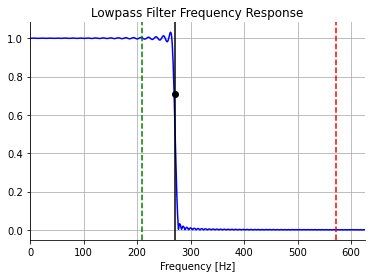

No handles with labels found to put in legend.


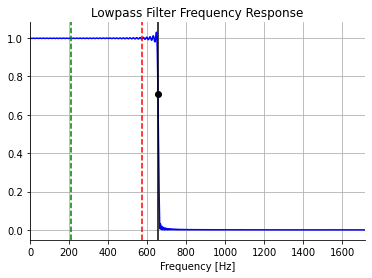

No handles with labels found to put in legend.



--------------------------------------------

nyquist_freq 6095.193789562785
referenceFrequency 208.616
210
17.22668771906787 ms filter window length in time


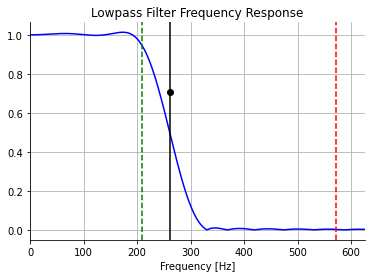

No handles with labels found to put in legend.


nyquist_freq 6095.193789562785
referenceFrequency 572.205
78
6.398484009939494 ms filter window length in time


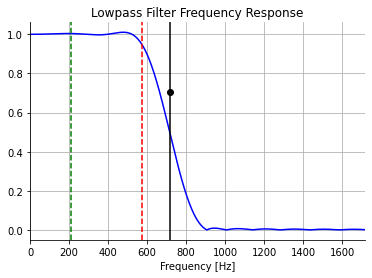

In [ ]:

fs = 1/np.mean(np.diff(dDoric.t.values))
print('fs: '+str(fs))
GFP_charfreq = 208.616 # (Hz)
RFP_charfreq = 572.205 # (Hz)
cutofffreq_GFP = GFP_charfreq * 1.3
cutofffreq_RFP = RFP_charfreq * 1.15
#Python code scipy.signal.kaiserord expresses width and ripple in terms of Nyquist frequency (fs/2)
nyquist_freq = fs/2
width_GFP = (cutofffreq_GFP * 0.04)/nyquist_freq #width between high freq end of passband and low freq end of stopband.
width_RFP = (cutofffreq_RFP * 0.02)/nyquist_freq
ripple_db=30
# Compute the order and Kaiser parameter for the FIR filter.
N_GFP, beta_GFP = kaiserord(ripple_db, width_GFP)
N_RFP, beta_RFP = kaiserord(ripple_db, width_RFP)
print(N_GFP, beta_GFP ,N_RFP, beta_RFP )
print(1000*N_GFP*(1/fs),'ms GFP filter window length in time')
print(1000*N_RFP*(1/fs),'ms RFP filter window length in time')

b_k208 = firwin(N_GFP, (cutofffreq_GFP)/nyquist_freq, window=('kaiser', beta_GFP))
b_k572 = firwin(N_RFP, (cutofffreq_RFP)/nyquist_freq, window=('kaiser', beta_RFP))
a_k208_k572 = 1

samplingRate = fs
cutoffFrequency = cutofffreq_GFP
w, h = freqz(b_k208, a_k208_k572, worN=8000)
plt.subplot(1, 1, 1)
plt.plot(0.5*samplingRate*w/np.pi, np.abs(h), 'b')
plt.plot(cutoffFrequency, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoffFrequency, color='k')
plt.axvline(208.616, color='g', linestyle='--')
plt.axvline(572.205, color='r', linestyle='--')
plt.xlim(0, 3*GFP_charfreq)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.legend()
plt.show()

cutoffFrequency = cutofffreq_RFP
w, h = freqz(b_k572, a_k208_k572, worN=8000)
plt.subplot(1, 1, 1)
plt.plot(0.5*samplingRate*w/np.pi, np.abs(h), 'b')
plt.plot(cutoffFrequency, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoffFrequency, color='k')
plt.axvline(208.616, color='g', linestyle='--')
plt.axvline(572.205, color='r', linestyle='--')
plt.xlim(0, 3*RFP_charfreq)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.legend()
plt.show()

print('\n--------------------------------------------\n')
#referenceFrequency = GFP_charfreq
for referenceFrequency in [GFP_charfreq,RFP_charfreq]:
  samplingRate = 1/np.mean(np.diff(t))
  nyquist_freq = samplingRate/2
  print('nyquist_freq',nyquist_freq)
  cutoffFrequency = referenceFrequency * 1.25
  width = (cutoffFrequency * 0.5)/nyquist_freq #width between high freq end of passband and low freq end of stopband.
  # The desired attenuation in the stop band, in dB.
  if referenceFrequency > 500:
      ripple_db=40
  else: ripple_db=40 ################################################################################## I may change this later to be more strict (to 60dB or higher)
  # Compute the order and Kaiser parameter for the FIR filter.
  N, beta = kaiserord(ripple_db, width)
  print('referenceFrequency',referenceFrequency)
  print(N)
  print(1000*N*(1/fs),'ms filter window length in time')
  b = firwin(N, (cutoffFrequency)/nyquist_freq, window=('kaiser', beta))
  a=1

  w, h = freqz(b, a, worN=8000)
  plt.subplot(1, 1, 1)
  plt.plot(0.5*samplingRate*w/np.pi, np.abs(h), 'b')
  plt.plot(cutoffFrequency, 0.5*np.sqrt(2), 'ko')
  plt.axvline(cutoffFrequency, color='k')
  plt.axvline(208.616, color='g', linestyle='--')
  plt.axvline(572.205, color='r', linestyle='--')
  plt.xlim(0, 3*referenceFrequency)
  plt.title("Lowpass Filter Frequency Response")
  plt.xlabel('Frequency [Hz]')
  plt.grid()

  plt.legend()

  plt.show()

numtaps=495
bands=(referenceFrequency*0.5 , referenceFrequency*0.75 , referenceFrequency*1 , referenceFrequency*1.25 , referenceFrequency*1.5 , referenceFrequency* 1.75 )
desired = (1,1,1,0.632, 0, 0)
b_ls, a_ls = scipy.signal.firls(numtaps=numtaps, bands=bands, desired=desired, weight=None, nyq=None, fs=fs)


No handles with labels found to put in legend.


[-1.62524674e-03 -1.66300386e-03 -1.68418805e-03 -1.67459282e-03
 -1.64407546e-03 -1.58037293e-03 -1.49697315e-03 -1.38388295e-03
 -1.25793036e-03 -1.11033374e-03 -9.59743250e-04 -7.96612655e-04
 -6.39438525e-04 -4.75983845e-04 -3.23195083e-04 -1.65228348e-04
 -1.74164829e-05  1.39157367e-04  2.89433558e-04  4.53728324e-04
  6.15152889e-04  7.93500601e-04  9.68204018e-04  1.15737621e-03
  1.33605216e-03  1.52091731e-03  1.68335107e-03  1.84026749e-03
  1.96124594e-03  2.06585889e-03  2.12400121e-03  2.16014183e-03
  2.14587394e-03  2.11171547e-03  2.03088327e-03  1.93956341e-03
  1.81091477e-03  1.68509053e-03  1.53242733e-03  1.39486884e-03
  1.23710859e-03  1.10139913e-03  9.45015077e-04  8.10726200e-04
  6.48296507e-04  5.03236153e-04  3.19167820e-04  1.48019363e-04
 -7.10000247e-05 -2.75612373e-04 -5.30480163e-04 -7.59966247e-04
 -1.03454979e-03 -1.26353481e-03 -1.52818618e-03 -1.72143781e-03
 -1.94317155e-03 -2.06667178e-03 -2.22118326e-03 -2.25106607e-03
 -2.33099016e-03 -2.25295

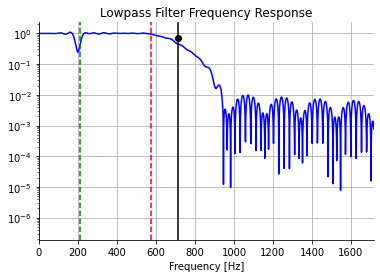

In [ ]:
from scipy.signal import firls
numtaps=495
#bands=(referenceFrequency*0.5 , referenceFrequency*0.75 , referenceFrequency*1 , referenceFrequency*1.25 , referenceFrequency*1.5 , referenceFrequency* 1.75 )
#desired = (1,1,1,0.632, 0, 0)
bands=[ 0, 30,     60, 90,       120,150,     180,GFP_charfreq,    240, 270,        300, 330, 360, 390, 420,      450, 480, 510, 540, 570,       600, 630, 660, 690, 720,     750, 780, 810,840,870,   900,930,960,990,1020,1050,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2200,2400,2600,2800,3000,3200,3400, fs/2   ]
desired=[1,1    ,    1,1      ,    1,  1,       1, 0 ,              1 ,   1,          1,  1,  1 , 1   ,1,              1,1,1,1,1,                  1, 0.96, 0.84, 0.72, 0.6,    0.4,  0.2, 0.05, 0, 0,   0, 0,  0,   0, 0    ,0    ,0   ,0   ,0  ,0   ,0   ,0    ,0  ,0    ,0   ,0,0     ,0,   0,   0,   0,  0,   0,    0]
bands=np.linspace(0, fs/2, 430)
desired_comps = (np.linspace(1,1,13), np.array([0.632,0,0.632]), np.linspace(1,1,24), np.linspace(0.98, 0.795, 9)**2, np.linspace(0.72,0,20)**2, np.linspace(0,0,430-(14+1+25+9+20)))
desired = np.concatenate(desired_comps)
coefs_ls_RFP = firls(numtaps=numtaps, bands=bands, desired=desired, weight=None, nyq=None, fs=fs)

print(len(coefs_ls_RFP))

w, h = freqz(coefs_ls_RFP, worN=8000)
plt.subplot(1, 1, 1)
plt.plot(0.5*samplingRate*w/np.pi, np.abs(h), 'b')
plt.plot(cutoffFrequency, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoffFrequency, color='k')
plt.axvline(208.616, color='g', linestyle='--')
plt.axvline(572.205, color='r', linestyle='--')
plt.xlim(0, 3*referenceFrequency)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.semilogy()

plt.legend()

plt.show()



numtaps=495
#bands=(referenceFrequency*0.5 , referenceFrequency*0.75 , referenceFrequency*1 , referenceFrequency*1.25 , referenceFrequency*1.5 , referenceFrequency* 1.75 )
#desired = (1,1,1,0.632, 0, 0)

coefs_ls_GFP = firls(numtaps=numtaps, bands=bands, desired=desired, weight=None, nyq=None, fs=fs)

print(coefs_ls_GFP)

w, h = freqz(coefs_ls_GFP, worN=8000)
plt.subplot(1, 1, 1)
plt.plot(0.5*samplingRate*w/np.pi, np.abs(h), 'b')
plt.plot(cutoffFrequency, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoffFrequency, color='k')
plt.axvline(208.616, color='g', linestyle='--')
plt.axvline(572.205, color='r', linestyle='--')
plt.xlim(0, 3*referenceFrequency)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.semilogy()

plt.legend()

plt.show()


In [ ]:
len(coefs_ls)

495

In [ ]:
# Python replication of Doric MATLAB code:
from scipy.signal import filtfilt, firwin, kaiserord
from scipy.interpolate import CubicSpline
def demodulateSignalAtFrequency(time, data, referenceFrequency):
    """
    This function is meant to replicate a dual lock-in detector.

    Parameters
    ----------
    time : 1-D numpy array 
    (unit is seconds)
    data : 1-D numpy array 
    (unit is Volts)
    referenceFrequency : scalar (int or float) 
    (unit is Hz)

    Returns
    -------
    demodulatedSignal : dictionary with keys 'magnitude','phase','time','data', and 'referenceFrequency'

    """
    fs=1/np.mean(np.diff(time))
    signal = dict()
    signal['time'] = time
    signal['data'] = data 
    signal['referenceFrequency'] = referenceFrequency
    signal['ref_period'] = 1/referenceFrequency
    
    resampledSignal = calculateEquidistantSignal(signal)

    #resampledSignal = eliminateDCoffset()
    
    signalComponents = calculateInPhaseAndQuadratureComponents(resampledSignal, referenceFrequency) # returns a dictionary
    
    cutoffFrequency = referenceFrequency*1.25 # Does this need to change?
    filteredSignalComponents = applyLowPassFilterAtCutoffFrequency(signalComponents, cutoffFrequency, referenceFrequency) # returns a dictionary
    
    demodulatedSignal = dict()
    demodulatedSignal['magnitude'] = np.linalg.norm(np.array([filteredSignalComponents['inPhase'], filteredSignalComponents['quadrature']]), axis=0)
    demodulatedSignal['phase'] = np.arctan2(filteredSignalComponents['quadrature'], filteredSignalComponents['inPhase'])
    
    demodulatedSignal['time'] = filteredSignalComponents['time']
    demodulatedSignal['data'] = resampledSignal['data']
    demodulatedSignal['referenceFrequency'] = referenceFrequency
      
    
    plt.plot(time, np.sin(2*np.pi * referenceFrequency * time), label='ref sin', linestyle='--')
    plt.plot(time, np.cos(2*np.pi * referenceFrequency * time), label='ref cos', linestyle='--')
    plt.plot(time, resampledSignal['data'], label='raw data')
    plt.plot(time, filteredSignalComponents['inPhase'], label='inPhase',lw=1)
    plt.plot(time, filteredSignalComponents['quadrature'], label='quadrature', lw=1)
    plt.plot(time, np.linalg.norm(np.array([filteredSignalComponents['quadrature'],filteredSignalComponents['inPhase']]),axis=0), label='extracted', lw=1, linestyle='--')
    plt.legend()
    xlimit = (time[0]+5, time[0]+5.02)
    plt.xlim(*xlimit)
    plt.show()
    
    return(demodulatedSignal) 

def calculateEquidistantSignal(signal): 
    """
    
    Parameters
    ----------
    signal : dictionary with keys 'time' and 'data' that contain 1-D numpy arrays

    Returns
    -------
    resampledSignal : dictionary with keys 'time' and 'data' that contain 1-D numpy arrays
    
    """
    rawTime = signal['time']  
    dataCount = len(rawTime)
    firstTime = rawTime[0]
    lastTime = rawTime[dataCount-1]

    equidistantTime = np.linspace(firstTime, lastTime, dataCount)
    rawData = signal['data']
    cubic_interpolator = CubicSpline(rawTime, rawData) #Uses not-a-knot boundary condition by default (scipy.interpolate.CubicSpline)
    resampledData = cubic_interpolator(equidistantTime)
    
    resampledSignal=dict()
    resampledSignal['time'] = equidistantTime
    resampledSignal['data'] = resampledData

    return(resampledSignal)
"""
def eliminateDCoffset(resampledSignal, samplingRate, cutoffFrequency, averaging_time=0.05):
    nyquist_freq = samplingRate/2
    width = (cutoffFrequency * 0.5)/nyquist_freq #width between high freq end of passband and low freq end of stopband.
    # The desired attenuation in the stop band, in dB.
    if referenceFrequency > 500:
      ripple_db=40
    else: ripple_db=20 ################################################################################## I may change this later to be more strict (to 60dB or higher)
    # Compute the order and Kaiser parameter for the FIR filter.
    N, beta = kaiserord(ripple_db, width)
    print('filter window length = ',N)
    resampledSignal['ref_period'] = np.floor(averaging_time , resampledSignal['ref_period'])
    resampledSignal['data'] = resampledSignal['data'] - np.ones() resampledSignal['data']
"""
def calculateInPhaseAndQuadratureComponents(resampledSignal, referenceFrequency):
    """
    
    Parameters
    ----------
    resampledSignal : dictionary with keys 'time' and 'data' containing 1-D numpy arrays
    referenceFrequency :  scalar (int or float) (unit is Hz)

    Returns
    -------
    signalComponents : dictionary with keys 'time', 'inPhase', and 'quadrature'
    
    """
    referenceSignals = createReferenceSineAndCosAtFrequency(resampledSignal['time'], referenceFrequency) #returns dictionary with 'sin' and 'cos' keys
    signalComponents=dict()
    signalComponents['time'] = resampledSignal['time']
    signalComponents['inPhase'] = resampledSignal['data'] * referenceSignals['sin']
    signalComponents['quadrature'] = resampledSignal['data'] * referenceSignals['cos'] 

    return(signalComponents)


def createReferenceSineAndCosAtFrequency(time, frequency):
    """

    Parameters
    ----------
    time :  1-D numpy array 
    (unit is seconds)
    frequency : scalar (float or int)
    (unit is Hz)

    Returns
    -------
    referenceSignals : dictionary with keys 'sin' and 'cos'

    """
    referenceSignals=dict()
    referenceSignals['sin'] = np.sin(2*np.pi * frequency * time)
    referenceSignals['cos'] = np.cos(2*np.pi * frequency * time)
    
    return(referenceSignals)

def applyLowPassFilterAtCutoffFrequency(signalComponents, cutoffFrequency, referenceFrequency):
    """

    Parameters
    ----------
    signalComponents : dictionary with keys 'time', 'inPhase', and 'quadrature'
        Output of calculateInPhaseAndQuadratureComponents(resampledSignal, referenceFrequency)
    cutoffFrequency : scalar (float or int)

    Returns
    -------
    filteredComponents

    """
    dt = signalComponents['time'][1] - signalComponents['time'][0]
    samplingRate = 1/dt
    filterTransferCoefficients = getLowPassFilterCoeffForCutoffFrequencyAndSamplingRate(cutoffFrequency, samplingRate, referenceFrequency)
    
    filteredComponents=dict()
    filteredComponents['time'] = signalComponents['time']
    # Use lfilter to filter x with the FIR filter.

    filteredComponents['inPhase'] = filtfilt(filterTransferCoefficients['b'], filterTransferCoefficients['a'], signalComponents['inPhase'])
    filteredComponents['quadrature'] = filtfilt(filterTransferCoefficients['b'], filterTransferCoefficients['a'], signalComponents['quadrature'])
    # Plot the frequency response.

    
    w, h = freqz(filterTransferCoefficients['b'], filterTransferCoefficients['a'], worN=8000)
    plt.subplot(1, 1, 1)
    plt.plot(0.5*samplingRate*w/np.pi, np.abs(h), 'b')
    plt.plot(cutoffFrequency, 0.5*np.sqrt(2), 'ko')
    plt.axvline(cutoffFrequency, color='k')
    plt.axvline(208.616, color='g', linestyle='--')
    plt.axvline(572.205, color='r', linestyle='--')
    plt.xlim(0, 0.5*samplingRate)
    plt.title("Lowpass Filter Frequency Response")
    plt.xlabel('Frequency [Hz]')
    plt.grid()

    plt.legend()

    plt.show()
    
    
    
    return(filteredComponents)


def getLowPassFilterCoeffForCutoffFrequencyAndSamplingRate(cutoffFrequency, samplingRate, referenceFrequency):
    """

    Parameters
    ----------
    cutoffFrequency : scalar (float or int)
        DESCRIPTION.
    samplingRate : scalar (float or int)
        DESCRIPTION.

    Returns
    -------
    filterTransferCoefficients : dictionary with keys 'b' and 'a'

    """
    #bandAmplitudes = np.array([1, 0]) # These 3 variables are represented in the variables below.
    #maxAllowedDeviations = np.array([0.005, 0.001])
    #bandEdges = np.array([cutoffFrequency, 1.5*cutoffFrequency]) #passband from 0Hz to cutoffFrequency. Stopband above cutoffFrequency*1.5
    
    #Python code scipy.signal.kaiserord expresses width and ripple in terms of Nyquist frequency (fs/2)
    nyquist_freq = samplingRate/2
    width = (cutoffFrequency * 0.5)/nyquist_freq #width between high freq end of passband and low freq end of stopband.
    # The desired attenuation in the stop band, in dB.
    if referenceFrequency > 500:
      ripple_db=40
    else: ripple_db=20 ################################################################################## I may change this later to be more strict (to 60dB or higher)
    # Compute the order and Kaiser parameter for the FIR filter.
    N, beta = kaiserord(ripple_db, width)
    print('filter window length = ',N)
    # Use firwin with a Kaiser window to create a lowpass FIR filter.
    filterTransferCoefficients=dict()
    N=430
    filterTransferCoefficients['b'] = firwin(N, (cutoffFrequency)/nyquist_freq, window=('kaiser', beta),pass_zero=False)
    filterTransferCoefficients['a'] = 1
    
    return(filterTransferCoefficients)
    
def bellanger_estimate(deltap, deltas, width, fs):
    n = (-2/3)*np.log10(10*deltap*deltas)*fs/width
    n = int(np.ceil(n))
    return n
# Frequency values in Hz
#fs = fs
#cutoff = 250
#width = 50
# Desired pass band ripple and stop band attenuation
#deltap = 0.00001
#deltas = 0.0001
#numtaps = bellanger_estimate(deltap, deltas,
#                             width, fs)
#print(numtaps)
#numtaps |= 1    
#print(numtaps)

#coefs_ = scipy.signal.firls(numtaps, (150,200,250,300,350,400), (1,1,0.7, 0.3,0.1,0), fs=fs  )


 # n, w, beta, ftype = kaiserord(bandEdges, bandAmplitudes, maxAllowedDeviations, samplingRate); #for FIR filter
 # print('FILTER TYPE IS: '+ftype) #This is added for my own benefit
 # filterTransferCoefficients.b = fir1(n, w, ftype, kaiser(n+1,beta), 'noscale');
 # filterTransferCoefficients.a = 1; % If you use an all-zero (FIR) filter, enter 1 for filterTransferCoeff a


In [ ]:

def parser(record):
    '''
    This is a parser function. It defines the template for
    interpreting the examples you're feeding in. Basically, 
    this function defines what the labels and data look like
    for your labeled data. 
    '''
    # the 'features' here include your normal data feats along
    # with the label for that data
    features={
      'feats': tf.io.FixedLenFeature([], tf.string),
      'label':tf.io.FixedLenSequenceFeature([], tf.string, allow_missing=True) # Extracts the array I fed in. Columns are: ['t','G_Raw','Green_autodemod','R_Raw','Red_autodemod','Events']
    }
    parsed = tf.io.parse_example(record, features)
    # some conversion and casting to get from bytes to floats and ints
    feats= tf.convert_to_tensor(tf.io.decode_raw(parsed['feats'], tf.float64))
    label= tf.cast(parsed['label'], tf.string)
  #[tf.float64, tf.float64, tf.float64, tf.float64, tf.float64, tf.bool]
    # since you can have multiple kinds of feats, you return a dictionary for feats
    # but only an int for the label
    return feats, label

TF_Doric_basepath = '/content/drive/My Drive/Doric_Data/TFRECORDS/'
TF_input_filelist = glob(os.path.join(TF_Doric_basepath)+'*mar7*')

dataset = tf.data.TFRecordDataset(filenames = TF_input_filelist).map(parser).batch(2)  
    # This batch argument (100ms of data) should be changed for June and December files to match a different sampling rate.
  
print('SOMETHING WORKED!')

raw_tensor, raw_labels = next(iter(dataset))
print(raw_tensor.numpy())
print(raw_labels.numpy())
#parsed = tf.train.Example.FromString(raw_example.numpy())
print('STOP')
#Doric_columns = ['t','G_Raw','Green','R_Raw','Red','Events']

KeyboardInterrupt: ignored

In [ ]:
!unzip '/content/drive/My Drive/Doric_Data/June21/June21.zip'

Archive:  /content/drive/My Drive/Doric_Data/June21/June21.zip
  inflating: June21/DC_285306_June21_0.csv  
  inflating: June21/DiscLTM_walter_285295_June21_2020.csv  
  inflating: June21/DiscLTM_walter_285298_June21_2020.csv  
  inflating: June21/DiscLTM_walter_285300_June21_2020.csv  
  inflating: June21/DiscLTM_walter_285305_June21_2020.csv  
  inflating: June21/DiscLTM_walter_285306_June21_2020.csv  
  inflating: June21/fingertip_June21_0.csv  
  inflating: June21/fingertip_June21_1.csv  
  inflating: June21/fingertip_June21_2.csv  
  inflating: June21/interleaved_285306_June21_1.csv  
  inflating: June21/post_walter_285295_June21_1.csv  
  inflating: June21/post_walter_285298_June21_1.csv  
  inflating: June21/post_walter_285300_June21_1.csv  
  inflating: June21/post_walter_285305_June21_1.csv  
  inflating: June21/pre-test_0.csv   


In [ ]:
#Figure 2?

testmode=True #Boost debugging ability, plotting, and allow chunking

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from scipy.signal import kaiserord, kaiser, firwin, filtfilt, freqz
Doric_csvlist = glob('/content/drive/My Drive/Doric_Data/mar7/LTMUUS_*_*_*_*.csv')
#Doric_csvlist = glob('/content/June21/DiscLTM_*_*_*_*.csv')
print(len(Doric_csvlist))
NGRFP_betaGRFP = []

if testmode==True: iterator = range(1) # Use this iterator for file batches.  
else: iterator = range(len(Doric_csvlist)) # Use this iterator when testing or debugging.      

for i in iterator:                         
  csvfile=Doric_csvlist[i]
  ID = csvfile.split('_')[-3]
  MonthDay = csvfile.split('_')[-2]
  IDENTIFIER = str(ID)+'_'+str(MonthDay)

  if testmode==True:
    dDoric = pd.read_csv(csvfile,skiprows=1, usecols=[0,1,2,3,4,5], chunksize=100000)
    dDoric = next(iter(dDoric_large))
  else:
    dDoric = pd.read_csv(csvfile,skiprows=1, usecols=[0,1,2,3,4,5]) # No chunking
  count1 = len(dDoric)
  print(dDoric.info())
  print(dDoric.head())
  print(dDoric.tail())
  dDoric= dDoric.dropna()
  print('{} NULL VALUES DROPPED'.format(count1 - len(dDoric)))


  dDoric = dDoric[['Time(s)', 'AIn-1 - Raw', 'AIn-2 - Raw', 'DI/O-2', 'AIn-1 - Dem (AOut-1)', 'AIn-2 - Dem (AOut-2)']]
  dDoric.columns = ['t','G_Raw','R_Raw','Events','Green_doric_demod','Red_doric_demod']


  #dDoric['backup_R_Raw'] = dDoric['R_Raw'].copy()

  t = dDoric['t'].values
  GFP_Photodetector = dDoric['G_Raw'].values
  RFP_Photodetector = dDoric['R_Raw'].values

  

  GFP_demodulated = demodulateSignalAtFrequency(t, GFP_Photodetector, GFP_charfreq)
  RFP_demodulated = demodulateSignalAtFrequency(t, RFP_Photodetector, RFP_charfreq)

  GFP_magnitude = GFP_demodulated['magnitude']
  RFP_magnitude = RFP_demodulated['magnitude']

  # Python replication:
  #def demodulateSignalAtFrequency(time, data, referenceFrequency):
    """
    This function is meant to replicate a dual lock-in detector.

    Parameters
    ----------
    time : 1-D numpy array 
    (unit is seconds)
    data : 1-D numpy array 
    (unit is Volts)
    referenceFrequency : scalar (int or float) 
    (unit is Hz)

    Returns
    -------
    demodulatedSignal : dictionary with keys 'magnitude','phase','time','data', and 'referenceFrequency'

    """


  #resampled_GFP = calculateEquidistantSignal(GFP_Signal)
  #resampled_RFP = calculateEquidistantSignal(RFP_Signal)


    """
    
    Parameters
    ----------
    signal : dictionary with keys 'time' and 'data' that contain 1-D numpy arrays

    Returns
    -------
    resampledSignal : dictionary with keys 'time' and 'data' that contain 1-D numpy arrays
    
    """


  fs = 1/np.mean(np.diff(dDoric.t.values))
  print('fs: '+str(fs))
  GFP_charfreq = 208.616 # (Hz)
  RFP_charfreq = 572.205 # (Hz)
  cutofffreq_GFP = GFP_charfreq * 1.3
  cutofffreq_RFP = RFP_charfreq * 1.15
  #Python code scipy.signal.kaiserord expresses width and ripple in terms of Nyquist frequency (fs/2)
  nyquist_freq = fs/2
  width_GFP = (cutofffreq_GFP * 0.04)/nyquist_freq #width between high freq end of passband and low freq end of stopband.
  width_RFP = (cutofffreq_RFP * 0.02)/nyquist_freq
  ripple_db=30
  # Compute the order and Kaiser parameter for the FIR filter.
  N_GFP, beta_GFP = kaiserord(ripple_db, width_GFP)
  N_RFP, beta_RFP = kaiserord(ripple_db, width_RFP)

  print(N_GFP, beta_GFP)
  print(N_RFP, beta_RFP)
  NGRFP_betaGRFP.append((N_GFP, N_RFP, beta_GFP, beta_RFP))

  b_k208 = firwin(N_GFP, (cutofffreq_GFP)/nyquist_freq, window=('kaiser', beta_GFP))
  b_k572 = firwin(N_RFP, (cutofffreq_RFP)/nyquist_freq, window=('kaiser', beta_RFP))
  a_k208_k572 = 1

  #kaiser_208 = kaiser(N_GFP, beta_GFP)
  #kaiser_572 = kaiser(N_RFP, beta_RFP)



  R_Raw = dDoric['R_Raw'].values

  # Required input defintions are as follows;
  # time:   Time between samples
  # band:   The bandwidth around the centerline freqency that you wish to filter
  # freq:   The centerline frequency to be filtered
  # ripple: The maximum passband ripple that is allowed in db
  # order:  The filter order.  For FIR notch filters this is best set to 2 or 3,
  #         IIR filters are best suited for high values of order.  This algorithm
  #         is hard coded to FIR filters
  # filter_type: 'butter', 'bessel', 'cheby1', 'cheby2', 'ellip'
  # data:         the data to be filtered
  def Implement_Notch_Filter(time, band, freq, ripple, order, filter_type, data):
      from scipy.signal import iirfilter, lfilter
      fs   = 1/time
      nyq  = fs/2.0
      low  = freq - band/2.0
      high = freq + band/2.0
      low  = low/nyq
      high = high/nyq
      b, a = iirfilter(order, [low, high], rp=ripple, btype='bandstop',
                      analog=False, ftype=filter_type)
      filtered_data = lfilter(b, a, data)
      return filtered_data, (b,a) #Return b and a so they can be plotted.

  #Transform_R, (b_iir, a_iir) = Implement_Notch_Filter(np.mean(np.diff(t)), band=10, freq=208.616, ripple=0.01, order=10, filter_type='butter', data=R_Raw)

  from scipy.signal import iirnotch
  from scipy.signal import lfilter
  #fs  # Sample frequency (Hz)
  f0 = 208.616  # Frequency to be removed from signal (Hz)
  Q = 6  # Quality factor
  # Design notch filter
  b, a = iirnotch(f0, Q, fs)

  # Frequency response
  freq, h = freqz(b, a, fs=fs)
  # Plot
  #fig, ax = plt.subplots(2, 1, figsize=(8, 6))
  #ax[0].plot(freq, 20*np.log10(abs(h)), color='blue')
  #ax[0].set_title("Frequency Response")
  #ax[0].set_ylabel("Amplitude (dB)", color='blue')
  #ax[0].set_xlim([0, 500])
  #ax[0].set_ylim([-25, 10])
  #ax[0].grid()
  #ax[1].plot(freq, np.unwrap(np.angle(h))*180/np.pi, color='green')
  #ax[1].set_ylabel("Angle (degrees)", color='green')
  #ax[1].set_xlabel("Frequency (Hz)")
  #ax[1].set_xlim([0, 500])
  #ax[1].set_yticks([-90, -60, -30, 0, 30, 60, 90])
  #ax[1].set_ylim([-90, 90])
  #ax[1].grid()
  #plt.show()

  #fig4, (ax_pre, ax_post) = plt.subplots(2,2, constrained_layout=True)
  #ax_pre[0].plot(t[s:e], R_Raw[s:e], color=colorscheme[1])
  #ax_pre[1].plot(np.linspace(0,fs/2,int(len(np.fft.fft(R_Raw[s:e]))/2)),abs(np.fft.fft(R_Raw[s:e]))[:int(len(np.fft.fft(R_Raw[s:e]))/2)], color=colorscheme[1])
  R_notched = lfilter(b, a, R_Raw)
  #ax_post[0].plot(t[s:e], R_notched[s:e], color=colorscheme[1])
  #ax_post[1].plot(np.linspace(0,fs/2,int(len(np.fft.fft(R_notched))/2)),abs(np.fft.fft(R_notched))[:int(len(np.fft.fft(R_notched))/2)], color=colorscheme[1])
  #plt.show()
  #print(R_notched)
  #print(len(R_Raw[s:e]))
  #print(len(np.fft.fft(R_Raw[s:e])))
  #print(len(np.linspace(0,fs,int(len(np.fft.fft(R_Raw[s:e]))))))
  #ax_post[0].plot(t[s:e], R_notched, color=colorscheme[1])
  #ax_pre[1].set_xlim(150,1000)
  #ax_pre[1].hlines(0, *ax_pre[1].get_xlim(), linestyle='dotted', lw=1.5)
  #ax_post[1].set_xlim(150,1000)
  #ax_post[1].hlines(0, *ax_post[1].get_xlim(), linestyle='dotted', lw=1.5)


  dDoric['R_Raw'] = R_notched



  dDoric['G_Sin208'] = (dDoric['G_Raw']-dDoric['G_Raw'].rolling(N_GFP).mean()) * np.sin(2*np.pi*GFP_charfreq*dDoric['t'])
  dDoric['G_Cos208'] = (dDoric['G_Raw']-dDoric['G_Raw'].rolling(N_GFP).mean()) * np.cos(2*np.pi*GFP_charfreq*dDoric['t'])
  dDoric['G_Sin572'] = (dDoric['G_Raw']-dDoric['G_Raw'].rolling(N_RFP).mean()) * np.sin(2*np.pi*RFP_charfreq*dDoric['t'])
  dDoric['G_Cos572'] = (dDoric['G_Raw']-dDoric['G_Raw'].rolling(N_RFP).mean()) * np.cos(2*np.pi*RFP_charfreq*dDoric['t'])
  dDoric['R_Sin208'] = (dDoric['R_Raw']-dDoric['R_Raw'].rolling(N_GFP).mean()) * np.sin(2*np.pi*GFP_charfreq*dDoric['t'])
  dDoric['R_Cos208'] = (dDoric['R_Raw']-dDoric['R_Raw'].rolling(N_GFP).mean()) * np.cos(2*np.pi*GFP_charfreq*dDoric['t'])
  dDoric['R_Sin572'] = (dDoric['R_Raw']-dDoric['R_Raw'].rolling(N_RFP).mean()) * np.sin(2*np.pi*RFP_charfreq*dDoric['t'])
  dDoric['R_Cos572'] = (dDoric['R_Raw']-dDoric['R_Raw'].rolling(N_RFP).mean()) * np.cos(2*np.pi*RFP_charfreq*dDoric['t'])
  dDoric.head()

  #kaiskais_208 = kaiser_208 #* np.flip(kaiser_208)
  #kaiskais_572 = kaiser_572 #* np.flip(kaiser_572)
  #dLPF_208 = pd.DataFrame(np.zeros_like(dDoric.iloc[:,:4].values))
  #dLPF_572 = pd.DataFrame(np.zeros_like(dDoric.iloc[:,:4].values))
  print(len(dDoric['G_Sin208']))
  print(len(dDoric['G_Sin572']))

  LPF_G_Sin208 = filtfilt(b_k208, a_k208_k572, np.array(dDoric['G_Sin208']))
  LPF_G_Cos208 = filtfilt(b_k208, a_k208_k572, np.array(dDoric['G_Sin208'])) 
  LPF_R_Sin208 = filtfilt(b_k208, a_k208_k572, np.array(dDoric['R_Sin208'])) 
  LPF_R_Cos208 = filtfilt(b_k208, a_k208_k572, np.array(dDoric['R_Sin208'])) 

  LPF_G_Sin572 = filtfilt(b_k208, a_k208_k572, np.array(dDoric['G_Sin572'])) 
  LPF_G_Cos572 = filtfilt(b_k208, a_k208_k572, np.array(dDoric['G_Sin572'])) 
  LPF_R_Sin572 = filtfilt(b_k208, a_k208_k572, np.array(dDoric['R_Sin572'])) 
  LPF_R_Cos572 = filtfilt(b_k208, a_k208_k572, np.array(dDoric['R_Sin572'])) 

  #LPF_G_Sin208 = np.convolve(kaiskais_208/np.sum(kaiskais_208), np.array(dDoric['G_Sin208']), 'same')
  #LPF_G_Cos208 = np.convolve(kaiskais_208/np.sum(kaiskais_208), np.array(dDoric['G_Cos208']), 'same')
  #LPF_R_Sin208 = np.convolve(kaiskais_208/np.sum(kaiskais_208), np.array(dDoric['R_Sin208']), 'same')
  #LPF_R_Cos208 = np.convolve(kaiskais_208/np.sum(kaiskais_208), np.array(dDoric['R_Cos208']), 'same')

  #LPF_G_Sin572 = np.convolve(kaiskais_572/np.sum(kaiskais_572), np.array(dDoric['G_Sin572']), 'same')
  #LPF_G_Cos572 = np.convolve(kaiskais_572/np.sum(kaiskais_572), np.array(dDoric['G_Cos572']), 'same')
  #LPF_R_Sin572 = np.convolve(kaiskais_572/np.sum(kaiskais_572), np.array(dDoric['R_Sin572']), 'same')
  #LPF_R_Cos572 = np.convolve(kaiskais_572/np.sum(kaiskais_572), np.array(dDoric['R_Cos572']), 'same')
  print(len(LPF_G_Sin208))
  print(len(LPF_G_Sin572))
  for printtarget in [LPF_G_Sin208, LPF_G_Cos208, LPF_R_Sin208, LPF_R_Cos208, LPF_G_Sin572, LPF_G_Cos572, LPF_R_Sin572, LPF_R_Cos572]:
    print(printtarget[:4])

  G208_polar = np.array([np.linalg.norm([LPF_G_Sin208, LPF_G_Cos208], axis=0), np.arctan2(LPF_G_Cos208,LPF_G_Sin208)], dtype=complex)
  G572_polar = np.array([np.linalg.norm([LPF_G_Sin572, LPF_G_Cos572], axis=0), np.arctan2(LPF_G_Cos572,LPF_G_Sin572)], dtype=complex)
  R208_polar = np.array([np.linalg.norm([LPF_R_Sin208, LPF_R_Cos208], axis=0), np.arctan2(LPF_R_Cos208,LPF_R_Sin208)], dtype=complex)
  R572_polar = np.array([np.linalg.norm([LPF_R_Sin572, LPF_R_Cos572], axis=0), np.arctan2(LPF_R_Cos572,LPF_R_Sin572)], dtype=complex)

  print(G208_polar)

  t = dDoric.t.values
  Events = dDoric.Events.values
  G_Raw = dDoric.G_Raw.values
  R_Raw = dDoric.R_Raw.values
  #del dDoric

  G_analytic = np.linalg.norm([LPF_G_Sin208, LPF_G_Cos208], axis=0) * abs(np.e**(1j*np.arctan2(LPF_G_Cos208,LPF_G_Sin208)))
  G_amp = np.linalg.norm([LPF_G_Sin208, LPF_G_Cos208], axis=0)

  R_analytic = np.linalg.norm([LPF_R_Sin572, LPF_R_Cos572], axis=0) * abs(np.e**(1j*np.arctan2(LPF_R_Cos572, LPF_R_Sin572)))
  R_amp = np.linalg.norm([LPF_R_Sin572, LPF_R_Cos572], axis=0)

"""
  df = dDoric[['t','Events','Green_doric_demod','Red_doric_demod']].copy()
  print(df.head())
  del dDoric
  print(df.info())
  df['G_analytic'] = G_analytic
  df['G_amp'] = G_amp
  df['R_analytic'] = R_analytic
  df['R_amp'] = R_amp
  del R_Raw
  del G_analytic
  del G_amp
  del R_analytic
  del R_amp
  
  df.head()

  df['deltatimeindex'] = pd.to_timedelta(t, unit='s', errors='ignore')
  df.index=df['deltatimeindex']
  print(df.info())

  df = df.resample('5ms').mean()
  df = df.dropna()
  #df['Events'] = df['Events'].astype('bool')
  df['FILE_ID'] = IDENTIFIER
  print(df.info())

  file_save_csv_path = '/content/drive/My Drive/Doric_Data/resampled_Aug8/resampled_'+csvfile.split('/')[-1]
  print(file_save_csv_path)
  df.to_csv(file_save_csv_path)

  len(df)

print('N_GFP, N_RFP, beta_GFP, beta_RFP: ',NGRFP_betaGRFP)
"""

10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940961 entries, 0 to 940960
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Time(s)               940961 non-null  float64
 1   AIn-1 - Dem (AOut-1)  940961 non-null  float64
 2   AIn-1 - Raw           940961 non-null  float64
 3   AIn-2 - Dem (AOut-2)  940961 non-null  float64
 4   AIn-2 - Raw           940961 non-null  float64
 5   DI/O-2                940961 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 43.1 MB
None
    Time(s)  AIn-1 - Dem (AOut-1)  ...  AIn-2 - Raw  DI/O-2
0  0.083016              0.056139  ...     0.685598       0
1  0.085067              0.056154  ...     0.577105       0
2  0.087118              0.056123  ...     0.651112       0
3  0.089170              0.056145  ...     0.846278       0
4  0.091220              0.056101  ...     0.743889       0

[5 rows x 6 columns]
           Time(s)  AIn-1 - Dem (

ValueError: ignored

In [ ]:
#Figure 2?

testmode=False #Boost debugging ability, plotting, and allow chunking

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from scipy.signal import kaiserord, kaiser, firwin, filtfilt, freqz
Doric_csvlist = glob('/content/drive/My Drive/Doric_Data/June20/DiscPTC_*_*_*_*.csv')
#Doric_csvlist = glob('/content/June21/DiscLTM_*_*_*_*.csv')
print(len(Doric_csvlist))
NGRFP_betaGRFP = []

if testmode==True: iterator = range(1) # Use this iterator for file batches.  
else: iterator = range(len(Doric_csvlist)) # Use this iterator when testing or debugging.      

for i in iterator:                         
  csvfile=Doric_csvlist[i]
  ID = csvfile.split('_')[-3]
  MonthDay = csvfile.split('_')[-2]
  IDENTIFIER = str(ID)+'_'+str(MonthDay)

  if testmode==True:
    dDoric = pd.read_csv(csvfile,skiprows=1, usecols=[0,1,2,3,4,5], chunksize=100000)
    dDoric = next(iter(dDoric_large))
  else:
    dDoric = pd.read_csv(csvfile,skiprows=1, usecols=[0,1,2,3,4,5]) # No chunking
  count1 = len(dDoric)
  print(dDoric.info())
  print(dDoric.head())
  print(dDoric.tail())
  dDoric= dDoric.dropna()
  print('{} NULL VALUES DROPPED'.format(count1 - len(dDoric)))


  dDoric = dDoric[['Time(s)', 'AIn-1 - Raw', 'AIn-2 - Raw', 'DI/O-2', 'AIn-1 - Dem (AOut-1)', 'AIn-2 - Dem (AOut-2)']]
  dDoric.columns = ['t','G_Raw','R_Raw','Events','Green_doric_demod','Red_doric_demod']


  #dDoric['backup_R_Raw'] = dDoric['R_Raw'].copy()

  t = dDoric['t'].values
  GFP_Photodetector = dDoric['G_Raw'].values
  RFP_Photodetector = dDoric['R_Raw'].values

  print(len(t))
  equidistant_t = np.linspace(t[0], t[-1], len(t),endpoint=False)
  print(len(equidistant_t))

5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4936497 entries, 0 to 4936496
Data columns (total 6 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Time(s)               float64
 1   AIn-1 - Dem (AOut-1)  float64
 2   AIn-1 - Raw           float64
 3   AIn-2 - Dem (AOut-2)  float64
 4   AIn-2 - Raw           float64
 5   DI/O-2                float64
dtypes: float64(6)
memory usage: 226.0 MB
None
    Time(s)  AIn-1 - Dem (AOut-1)  ...  AIn-2 - Raw  DI/O-2
0  0.082155              0.021790  ...     0.460372     0.0
1  0.082483              0.021791  ...     0.360347     0.0
2  0.082811              0.021792  ...     0.212561     0.0
3  0.083139              0.021793  ...     0.215918     0.0
4  0.083467              0.021794  ...     0.369274     0.0

[5 rows x 6 columns]
            Time(s)  AIn-1 - Dem (AOut-1)  ...  AIn-2 - Raw  DI/O-2
4936492  1619.88158              0.020850  ...     0.232017     0.0
4936493  1619.88191              0.020849

In [ ]:
print(csvfile)

/content/drive/My Drive/Doric_Data/June20/DiscPTC_walter_285298_June20_2020.csv


num_windows_GFP 699459
num_windows_RFP 2448102
GFP_window_bounds [[0, 292], [7, 299], [14, 306]]
RFP_window_bounds [[0, 303], [2, 305], [4, 307]]
continuous averaging 14.608631030167905 sec at a time for GFP
continuous averaging 5.326053024684349 sec at a time for RFP
continuous jumping 7.304315515083952 sec at a time for GFP
continuous jumping 2.6630265123421744 sec at a time for RFP
total periods GFP:  335178.9082692663  with period length of  0.004793496184377037 sec and UNKOWN PHASE SHIFT (for now)
total periods RFP:  919349.6529806702  with period length of  0.00174762541396877 sec and UNKOWN PHASE SHIFT (for now)
10.956473272625928 3.9945397685132615
(2, 200)
(2, 200)
(2, 200)
(2, 200)


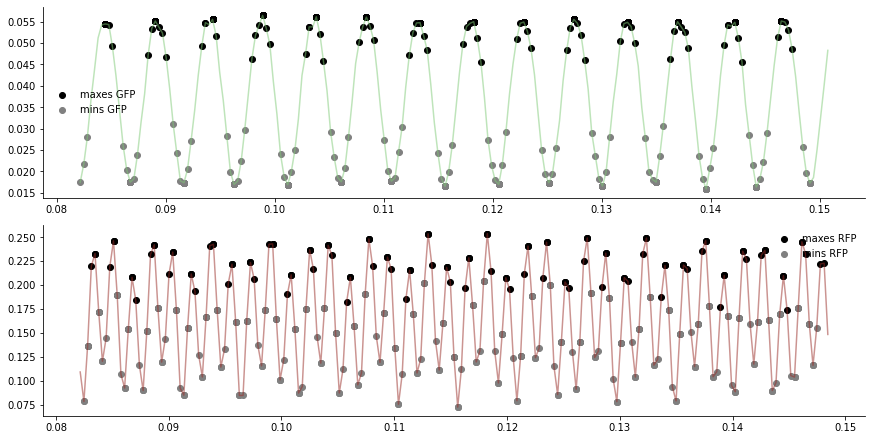

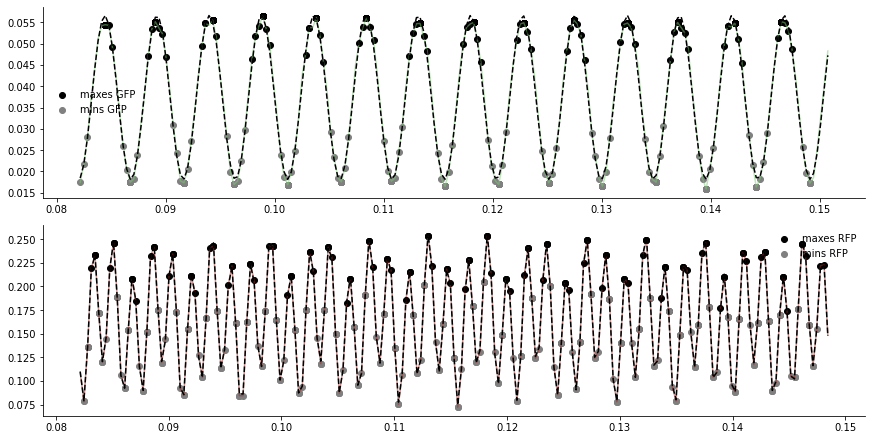

In [ ]:
from scipy.optimize import curve_fit, least_squares

fs = 1/np.mean(np.diff(t))
np.set_printoptions(precision=4, floatmode='fixed')
#interpobj_GFP = CubicSpline(t, GFP_Photodetector)
#interpobj_RFP = CubicSpline(t, RFP_Photodetector)
#GFP = interpobj_GFP(equidistant_t)
#RFP = interpobj_RFP(equidistant_t)equidistant_t
points_per_GFP_per = fs/GFP_charfreq
points_per_RFP_per = fs/RFP_charfreq
avg_GFP = int(points_per_GFP_per*20)
avg_RFP = int(points_per_RFP_per*57)
jump_GFP = int(points_per_GFP_per/2)
jump_RFP = int(points_per_RFP_per/2)
num_windows_GFP = int(np.floor((len(GFP_Photodetector)-avg_GFP)/jump_GFP))
GFP_window_bounds = [[i*jump_GFP, i*jump_GFP + avg_GFP] for i in range(num_windows_GFP)]
num_windows_RFP = int(np.floor((len(RFP_Photodetector)-avg_RFP)/jump_RFP))
RFP_window_bounds = [[i*jump_RFP, i*jump_RFP + avg_RFP] for i in range(num_windows_RFP)]
print('num_windows_GFP',num_windows_GFP)
print('num_windows_RFP',num_windows_RFP)
print('GFP_window_bounds',GFP_window_bounds[:3])
print('RFP_window_bounds',RFP_window_bounds[:3])

continuous_avg_GFP = points_per_GFP_per*20
continuous_avg_RFP = points_per_RFP_per*57
continuous_jump_GFP = points_per_GFP_per/2
continuous_jump_RFP = points_per_RFP_per/2
total_time = equidistant_t[-1] - equidistant_t[0]
time_per_GFP_per = 1/GFP_charfreq
time_per_RFP_per = 1/RFP_charfreq
total_periods_GFP = total_time / time_per_GFP_per
total_periods_RFP = total_time / time_per_RFP_per
print('continuous averaging '+str(points_per_GFP_per)+' sec at a time for GFP')
print('continuous averaging '+str(points_per_RFP_per)+' sec at a time for RFP')
print('continuous jumping '+str(points_per_GFP_per/2)+' sec at a time for GFP')
print('continuous jumping '+str(points_per_RFP_per/2)+' sec at a time for RFP')
print('total periods GFP: ',total_periods_GFP, ' with period length of ', time_per_GFP_per, 'sec and UNKOWN PHASE SHIFT (for now)')
print('total periods RFP: ',total_periods_RFP, ' with period length of ', time_per_RFP_per, 'sec and UNKOWN PHASE SHIFT (for now)')

print(points_per_GFP_per*0.75, points_per_RFP_per*0.75)

GFP_find_maxes_mins_window = int(points_per_GFP_per*0.75)
RFP_find_maxes_mins_window = int(points_per_RFP_per*0.75)

#Discrete iterations:
GFP_maxes=[]
GFP_mins=[]
RFP_maxes=[]
RFP_mins=[]
for shift in range(200):
  GFP_wind = GFP_Photodetector[ shift : shift + GFP_find_maxes_mins_window ]
  GFP_maxes.append((np.argmax(GFP_wind)+shift, np.max(GFP_wind)))
  GFP_mins.append((np.argmin(GFP_wind)+shift, np.min(GFP_wind)))
  RFP_wind = RFP_Photodetector[ shift : shift + RFP_find_maxes_mins_window ]
  RFP_maxes.append((np.argmax(RFP_wind)+shift, np.max(RFP_wind)))
  RFP_mins.append((np.argmin(RFP_wind)+shift, np.min(RFP_wind)))
GFP_mxs =  np.array( GFP_maxes ).T
GFP_mns =  np.array( GFP_mins ).T
RFP_mxs =  np.array( RFP_maxes ).T
RFP_mns =  np.array( RFP_mins ).T
for r in [GFP_mxs,GFP_mns,RFP_mxs,RFP_mns]:
  print(r.shape)
fig, (axG, axR) = plt.subplots(2,1,constrained_layout=True)
axG.scatter( t[GFP_mxs[0,:].astype(int)], GFP_mxs[1,:] , color='k', label='maxes GFP')
axG.scatter( t[GFP_mns[0,:].astype(int)], GFP_mns[1,:] , color='gray', label='mins GFP')
axG.plot( t[:200+GFP_find_maxes_mins_window], GFP_Photodetector[:200+GFP_find_maxes_mins_window], color=colorscheme[0], alpha=0.5 )
axR.scatter( t[RFP_mxs[0,:].astype(int)], RFP_mxs[1,:] , color='k', label='maxes RFP')
axR.scatter( t[RFP_mns[0,:].astype(int)], RFP_mns[1,:] , color='gray', label='mins RFP')
axR.plot( t[:200+RFP_find_maxes_mins_window], RFP_Photodetector[:200+RFP_find_maxes_mins_window], color=colorscheme[1], alpha=0.5 )
axG.legend()
axR.legend()
plt.show()

from functools import partial
                              #[shift, DCoffset, scale]
def fit_sin_shift_DCoffset_scale(SIN_PARAMS, real_data, real_time, charfreq): # SIN PARAMS here are a vector of [shift, DCoffset, scale]
  return( real_data - SIN_PARAMS[2] * ( np.sin( 2 * np.pi * charfreq * real_time + SIN_PARAMS[0]) + SIN_PARAMS[1] ) )
def fit_two_composite_sinusoids(SIN_PARAMS, real_data, real_time, GFP_charfreq, RFP_charfreq): # SIN PARAMS here are a vector of [shift572, DCoffset572, scale572, shift208, DCoffset208, scale208]
  return(  real_data - (SIN_PARAMS[2] * ( np.sin( 2 * np.pi * RFP_charfreq * real_time + SIN_PARAMS[0]) + SIN_PARAMS[1] )     + SIN_PARAMS[5] * ( np.sin( 2 * np.pi * GFP_charfreq * real_time + SIN_PARAMS[3]) + SIN_PARAMS[4] )   )  )

fit_sin_GFP = partial(fit_sin_shift_DCoffset_scale, real_data=GFP_Photodetector[:200+GFP_find_maxes_mins_window], real_time=t[:200+GFP_find_maxes_mins_window], charfreq=GFP_charfreq)
fit_sin_RFP = partial(fit_sin_shift_DCoffset_scale, real_data=RFP_Photodetector[:200+RFP_find_maxes_mins_window], real_time=t[:200+RFP_find_maxes_mins_window], charfreq=RFP_charfreq)
fit_two_sins = partial( fit_two_composite_sinusoids, real_data=RFP_Photodetector[:200+RFP_find_maxes_mins_window], real_time=t[:200+RFP_find_maxes_mins_window], GFP_charfreq=GFP_charfreq, RFP_charfreq=RFP_charfreq )


def generate_RFP_Ref(shift_DCoffset_scale_RFP, charfreq=RFP_charfreq ): 
  RFP_Ref = shift_DCoffset_scale_RFP[2] * ( np.sin( 2 * np.pi * charfreq * t[:200+RFP_find_maxes_mins_window] + shift_DCoffset_scale_RFP[0]) + shift_DCoffset_scale_RFP[1] ) 
  return(RFP_Ref)
def generate_RFP_composite_Ref(shift_DCoffset_scale_RFP): # This must have 6 terms for two sin waves :  #[shift572, DCoffset572, scale572, shift208, DCoffset208, scale208]
  RFP_composite_Ref = shift_DCoffset_scale_RFP[2] * ( np.sin( 2 * np.pi * RFP_charfreq * t[:200+RFP_find_maxes_mins_window] + shift_DCoffset_scale_RFP[0]) + shift_DCoffset_scale_RFP[1] ) +  shift_DCoffset_scale_RFP[5] * ( np.sin( 2 * np.pi * GFP_charfreq * t[:200+RFP_find_maxes_mins_window] + shift_DCoffset_scale_RFP[3]) + shift_DCoffset_scale_RFP[4] )
  return(RFP_composite_Ref)
def generate_GFP_Ref(shift_DCoffset_scale_GFP):
  GFP_Ref = shift_DCoffset_scale_GFP[2] * ( np.sin( 2 * np.pi * GFP_charfreq * t[:200+GFP_find_maxes_mins_window] + shift_DCoffset_scale_GFP[0]) + shift_DCoffset_scale_GFP[1] )  #np.sin(2*np.pi*GFP_charfreq*t[:200+GFP_find_maxes_mins_window])
  return(GFP_Ref)

# t[:200+GFP_find_maxes_mins_window]
# t[:200+RFP_find_maxes_mins_window]
# GFP_Photodetector[:200+GFP_find_maxes_mins_window]

def measure_with_LSQ(time_vector, GFP_data, RFP_data, window_width, overlap): #Proposed window_width = 215, overlap=int(window_width/2)
  print(len(GFP_data) == len(RFP_data))
  num_windows_GFP = int(np.floor((len(GFP_data)-window_width)/overlap))
  GFP_window_bounds = [[i*overlap, i*overlap + window_width] for i in range(num_windows_GFP)]
  num_windows_RFP = int(np.floor((len(RFP_data)-window_width)/overlap))
  RFP_window_bounds = [[i*overlap, i*overlap + window_width] for i in range(num_windows_RFP)]
  print(num_windows_GFP, GFP_window_bounds)
  print(num_windows_RFP, RFP_window_bounds)
  GFP_idx_shift_DCoffset_scale_list = []
  RFP_idx_shift_DCoffset_scale_list = []
  RFP208_idx_shift_DCoffset_scale_list = []
  for count, window in tqdm(enumerate(GFP_window_bounds)):
    fit_GFP = partial(fit_sin_shift_DCoffset_scale, real_data=GFP_data[window[0]:window[1]], real_time=time_vector, charfreq=GFR_charfreq )
    fit_RFP = partial(fit_two_composite_sinusoids,  real_data=RFP_data[window[0]:window[1]], real_time=time_vector, GFP_charfreq=GFR_charfreq , RFP_charfreq=RFP_charfreq)
    shift_DCoffset_scale_GFP = least_squares( fit_sin_GFP, [0, 0.3, 0.2] )['x']
    shift_DCoffset_scale_RFP = least_squares( fit_two_sins, [0, 0.6, 0.5,   0, 0.3, 0.2 ] )['x']
    GFP_idx_shift_DCoffset_scale_list.append([count, shift_DCoffset_scale_GFP[0], shift_DCoffset_scale_GFP[1], shift_DCoffset_scale_GFP[2]])
    RFP_idx_shift_DCoffset_scale_list.append([count, shift_DCoffset_scale_RFP[0], shift_DCoffset_scale_RFP[1], shift_DCoffset_scale_RFP[2]])
    RFP208_idx_shift_DCoffset_scale_list.append([count, shift_DCoffset_scale_RFP[3], shift_DCoffset_scale_RFP[4], shift_DCoffset_scale_RFP[5]])
  return(GFP_idx_shift_DCoffset_scale_list, RFP_idx_shift_DCoffset_scale_list, RFP208_idx_shift_DCoffset_scale_list)



fit_sin_shift_GFP = lambda shift, DCoffset, scale:  GFP_Photodetector[:200+GFP_find_maxes_mins_window] - scale*(np.sin(2*np.pi*GFP_charfreq*t[:200+GFP_find_maxes_mins_window] + shift) + DCoffset )
fit_sin_shift_RFP = lambda shift, DCoffset, scale:  RFP_Photodetector[:200+RFP_find_maxes_mins_window] - scale*(np.sin(2*np.pi*RFP_charfreq*t[:200+RFP_find_maxes_mins_window] + shift) + DCoffset )
#iterate reference signals over shift
shift_DCoffset_scale_GFP = least_squares( fit_sin_GFP, [0, 0.3, 0.2] )['x'] ####### attribute 'x' only collects parameters and not metadata ########################################################################### LSQ
#print(shift_GFP)

GFP_Ref = generate_GFP_Ref(shift_DCoffset_scale_GFP)

shift_DCoffset_scale_RFP = least_squares( fit_two_sins, [0, 0.6, 0.5,   0, 0.3, 0.2 ] )['x'] ####### attribute 'x' only collects parameters and not metadata ########################################################################### LSQ
#print(shift_RFP)

RFP_Ref = generate_RFP_composite_Ref(shift_DCoffset_scale_RFP)
 #np.sin(2*np.pi*RFP_charfreq*t[:200+RFP_find_maxes_mins_window])

fig, (axG, axR) = plt.subplots(2,1,constrained_layout=True)
axG.scatter( t[GFP_mxs[0,:].astype(int)], GFP_mxs[1,:] , color='k', label='maxes GFP')
axG.scatter( t[GFP_mns[0,:].astype(int)], GFP_mns[1,:] , color='gray', label='mins GFP')
axG.plot( t[:200+GFP_find_maxes_mins_window], GFP_Photodetector[:200+GFP_find_maxes_mins_window], color=colorscheme[0], alpha=0.5 )
axG.plot( t[:200+GFP_find_maxes_mins_window], GFP_Ref[:200+GFP_find_maxes_mins_window], color='k', linestyle='--')

axR.scatter( t[RFP_mxs[0,:].astype(int)], RFP_mxs[1,:] , color='k', label='maxes RFP')
axR.scatter( t[RFP_mns[0,:].astype(int)], RFP_mns[1,:] , color='gray', label='mins RFP')
axR.plot( t[:200+RFP_find_maxes_mins_window], RFP_Photodetector[:200+RFP_find_maxes_mins_window], color=colorscheme[1], alpha=0.5 )
axR.plot( t[:200+RFP_find_maxes_mins_window], RFP_Ref[:200+RFP_find_maxes_mins_window], color='k', linestyle='--')
axG.legend()
axR.legend()
plt.show()

#GFP_window_edges = [ (0+i, avg_GFP+i)  for  i  in range(0, int(-avg_GFP+np.floor(len(GFP)/(jump_GFP))), jump_GFP) ]
#print(len(GFP_window_edges))
#RFP_window_edges = [ (0+i, avg_RFP+i)  for  i  in range(0, int(-avg_RFP+np.floor(len(RFP)/(jump_RFP))), jump_RFP) ]
#print(len(RFP_window_edges))
#"""
#for fs/GFP_charfreq:
#  GFP5 = np.convolve( np.percentile(GFP, 5) ,  , mode='same' )
#  GFP50 = np.percentile(GFP, 50)
#  GFP95 = np.percentile(GFP, 95)
 # RFP5 = np.percentile(RFP, 5)
 # RFP95 = np.percentile(RFP, 95)
  #RFP20 = np.percentile(RFP, 20)
 # RFP50 = np.percentile(RFP, 50)
#"""
#[shift572, DCoffset572, scale572, shift208, DCoffset208, scale208]

In [ ]:
Doric_csvlist = glob('/content/drive/My Drive/Doric_Data/June20/DiscPTC_*_*_*_*.csv')
#Doric_csvlist = glob('/content/June21/DiscLTM_*_*_*_*.csv')
print(len(Doric_csvlist))
NGRFP_betaGRFP = []
testmode=True
#if testmode==True: iterator = range(1) # Use this iterator for file batches.  
#else: iterator = range(len(Doric_csvlist)) # Use this iterator when testing or debugging.      

#for i in iterator:                         
csvfile=Doric_csvlist[2]
ID = csvfile.split('_')[-3]
MonthDay = csvfile.split('_')[-2]
IDENTIFIER = str(ID)+'_'+str(MonthDay)

if testmode==True:
  dDoric = pd.read_csv(csvfile,skiprows=1, usecols=[0,1,2,3,4,5], chunksize=500000)
  dDoric = next(iter(dDoric_large))
else:
  dDoric = pd.read_csv(csvfile,skiprows=1, usecols=[0,1,2,3,4,5]) # No chunking
count1 = len(dDoric)
print(dDoric.info())
print(dDoric.head())
print(dDoric.tail())
dDoric= dDoric.dropna()
print('{} NULL VALUES DROPPED'.format(count1 - len(dDoric)))


dDoric = dDoric[['Time(s)', 'AIn-1 - Raw', 'AIn-2 - Raw', 'DI/O-2', 'AIn-1 - Dem (AOut-1)', 'AIn-2 - Dem (AOut-2)']]
dDoric.columns = ['t','G_Raw','R_Raw','Events','Green_doric_demod','Red_doric_demod']


#dDoric['backup_R_Raw'] = dDoric['R_Raw'].copy()

t = dDoric['t'].values
GFP_Photodetector = dDoric['G_Raw'].values
RFP_Photodetector = dDoric['R_Raw'].values

import time
from tqdm import tqdm
zebra1=time.time()
def measure_with_LSQ(time_vector, GFP_data, RFP_data, window_width, overlap): #Proposed window_width = 215, overlap=int(window_width/2)
  print(len(GFP_data) == len(RFP_data))
  num_windows_GFP = int(np.floor((len(GFP_data)-window_width)/overlap))
  GFP_window_bounds = [[i*overlap, i*overlap + window_width] for i in range(num_windows_GFP)]
  num_windows_RFP = int(np.floor((len(RFP_data)-window_width)/overlap))
  RFP_window_bounds = [[i*overlap, i*overlap + window_width] for i in range(num_windows_RFP)]
  print(num_windows_GFP, GFP_window_bounds)
  print(num_windows_RFP, RFP_window_bounds)
  GFP_idx_shift_DCoffset_scale_list = []
  RFP_idx_shift_DCoffset_scale_list = []
  RFP208_idx_shift_DCoffset_scale_list = []
  for count, window in tqdm(enumerate(GFP_window_bounds)):
    fit_GFP = partial(fit_sin_shift_DCoffset_scale, real_data=GFP_data[window[0]:window[1]], real_time=time_vector[window[0]:window[1]], charfreq=GFP_charfreq )
    fit_RFP = partial(fit_two_composite_sinusoids,  real_data=RFP_data[window[0]:window[1]], real_time=time_vector[window[0]:window[1]], GFP_charfreq=GFP_charfreq , RFP_charfreq=RFP_charfreq)
    shift_DCoffset_scale_GFP = least_squares( fit_GFP, [0, 0.3, 0.2] )['x']
    shift_DCoffset_scale_RFP = least_squares( fit_RFP, [0, 0.6, 0.5,   0, 0.3, 0.2 ] )['x']

    GFP_idx_shift_DCoffset_scale_list.append([count,window[0],window[1], shift_DCoffset_scale_GFP[0], shift_DCoffset_scale_GFP[1], shift_DCoffset_scale_GFP[2]])
    RFP_idx_shift_DCoffset_scale_list.append([count,window[0],window[1], shift_DCoffset_scale_RFP[0], shift_DCoffset_scale_RFP[1], shift_DCoffset_scale_RFP[2]])
    RFP208_idx_shift_DCoffset_scale_list.append([count,window[0],window[1], shift_DCoffset_scale_RFP[3], shift_DCoffset_scale_RFP[4], shift_DCoffset_scale_RFP[5]])
  return(GFP_idx_shift_DCoffset_scale_list, RFP_idx_shift_DCoffset_scale_list, RFP208_idx_shift_DCoffset_scale_list)

GFPlistA, RFPlistB, RFP208listC = measure_with_LSQ(time_vector=t, GFP_data=GFP_Photodetector, RFP_data=RFP_Photodetector, window_width=215, overlap=int(215/2))
GFPAdf = pd.DataFrame(GFPlistA)
RFPBdf = pd.DataFrame(RFPlistB)
RFP208Cdf = pd.DataFrame(RFP208listC)

fig, axes = plt.subplots(3,2,constrained_layout=True)
axes[0,1].plot(t[np.array((GFPAdf.iloc[:,1]+GFPAdf.iloc[:,2])/2).astype(int)], abs(GFPAdf.iloc[:,5]), color=colorscheme[0], label='GFP_LSQ')
axes[1,1].plot(t[np.array((RFPBdf.iloc[:,1]+RFPBdf.iloc[:,2])/2).astype(int)], abs(RFPBdf.iloc[:,5]), color=colorscheme[1], label='RFP_LSQ')
axes[2,1].plot(t[np.array((RFP208Cdf.iloc[:,1]+RFP208Cdf.iloc[:,2])/2).astype(int)], abs(RFP208Cdf.iloc[:,5]), color=colorscheme[2], label='RFP208_LSQ')
axes[0,0].plot( dDoric['t'],dDoric['Green_doric_demod'], color='g', label='GFP_doric_demod')
axes[1,0].plot( dDoric['t'],dDoric['Red_doric_demod'], color='r', label='GFP_doric_demod')
axes[0,1].legend()
axes[1,1].legend()
axes[2,1].legend()
axes[0,0].legend()
axes[1,0].legend()

plt.show()

print('Time elapsed: {} sec '.format(time.time()-zebra1))



5


NameError: ignored

In [ ]:
# Windowed time lagged cross correlation
seconds = 5
fps = 30
no_splits = 20
samples_per_split = df.shape[0]/no_splits
rss=[]
for t in range(0, no_splits):
    d1 = abs(RFPBdf.iloc[:,5]).loc[(t)*samples_per_split:(t+1)*samples_per_split]
    d2 = abs(RFPBdf.iloc[:,4]).loc[(t)*samples_per_split:(t+1)*samples_per_split]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
    rss.append(rs)
rss = pd.DataFrame(rss)
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Window epochs')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

# Rolling window time lagged cross correlation
seconds = 5
fps = 30
window_size = 300 #samples
t_start = 0
t_end = t_start + window_size
step_size = 30
rss=[]
while t_end < 5400:
    d1 = abs(RFPBdf.iloc[:,5]).iloc[t_start:t_end]
    d2 = abs(RFPBdf.iloc[:,4]).iloc[t_start:t_end]
    rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
    rss.append(rs)
    t_start = t_start + step_size
    t_end = t_end + step_size
rss = pd.DataFrame(rss)

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Epochs')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

NameError: ignored

In [ ]:
from scipy.signal import correlate
fig, axes = plt.subplots(3,2,constrained_layout=True)
axes[0,1].plot(t[np.array((GFPAdf.iloc[:,1]+GFPAdf.iloc[:,2])/2).astype(int)], abs(GFPAdf.iloc[:,5]), color=colorscheme[0], label='GFP_LSQ')
axes[1,1].plot(t[np.array((RFPBdf.iloc[:,1]+RFPBdf.iloc[:,2])/2).astype(int)], abs(RFPBdf.iloc[:,5]), color=colorscheme[1], label='RFP_LSQ')
axes[2,1].plot(t[np.array((RFP208Cdf.iloc[:,1]+RFP208Cdf.iloc[:,2])/2).astype(int)], abs(RFP208Cdf.iloc[:,5]), color=colorscheme[2], label='RFP208_LSQ')
axes[0,0].plot( dDoric['t'],dDoric['Green_doric_demod'], color='g', label='GFP_doric_demod')
axes[1,0].plot( dDoric['t'],dDoric['Red_doric_demod'], color='r', label='GFP_doric_demod')
axes[0,1].legend(loc='upper right')
axes[1,1].legend(loc='upper right')
axes[2,1].legend(loc='upper right')
axes[0,0].legend(loc='upper right')
axes[1,0].legend(loc='upper right')
axes[2,0].plot(dDoric['t'], correlate(dDoric.Green_doric_demod,dDoric.Red_doric_demod, mode='same',method='direct'))

Pandas computed Pearson r: 0.8507461109605857
Scipy computed Pearson r: 0.8507461109606078 and p-value: 0.0


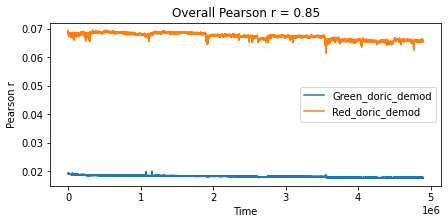

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
df = dDoric[['Green_doric_demod','Red_doric_demod']]
overall_pearson_r = df.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(df.dropna()['Green_doric_demod'], df.dropna()['Red_doric_demod'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(7,3))
df.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");


Text(0.5, 0.98, 'GFP and RFP data and rolling window correlation')

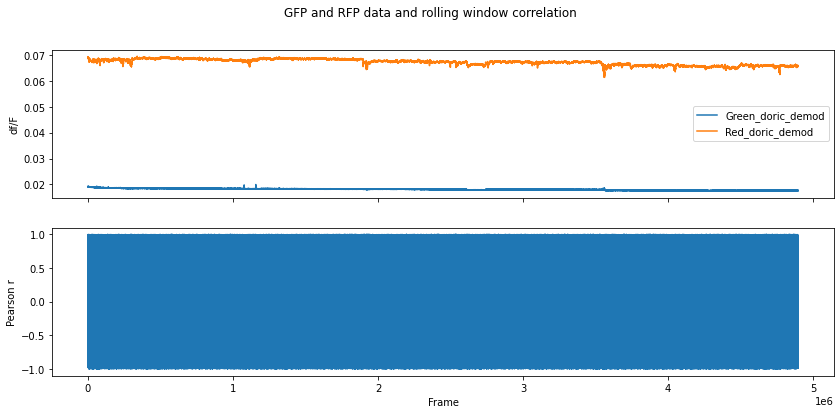

In [ ]:
# Set window size to compute moving window synchrony.
r_window_size = 120
# Interpolate missing data.
df_interpolated = df.interpolate()
# Compute rolling window synchrony
rolling_r = df_interpolated['Green_doric_demod'].rolling(window=r_window_size, center=True).corr(df_interpolated['Red_doric_demod'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
df.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='time',ylabel='df/F')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("GFP and RFP data and rolling window correlation")



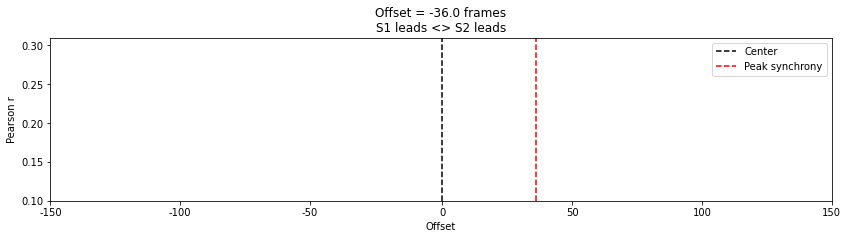

In [ ]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = df_interpolated['Green_doric_demod']
d2 = df_interpolated['Red_doric_demod']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

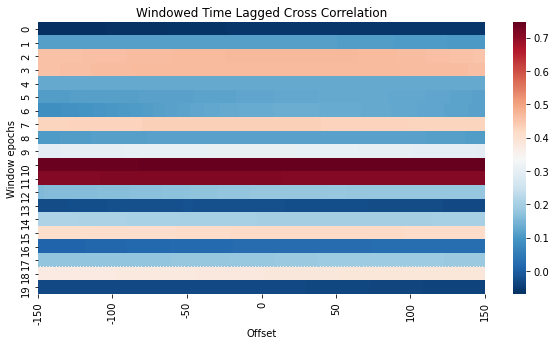

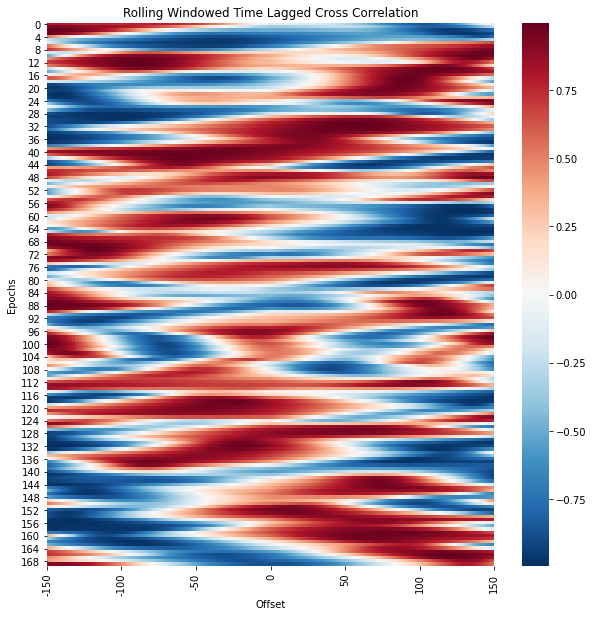

In [ ]:
# Windowed time lagged cross correlation
seconds = 5
fps = 30
no_splits = 20
samples_per_split = df.shape[0]/no_splits
rss=[]
for t in range(0, no_splits):
    d1 = df_interpolated['Green_doric_demod'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    d2 = df_interpolated['Red_doric_demod'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
    rss.append(rs)
rss = pd.DataFrame(rss)
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Window epochs')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

# Rolling window time lagged cross correlation
seconds = 5
fps = 30
window_size = 300 #samples
t_start = 0
t_end = t_start + window_size
step_size = 30
rss=[]
while t_end < 5400:
    d1 = df_interpolated['Green_doric_demod'].iloc[t_start:t_end]
    d2 = df_interpolated['Red_doric_demod'].iloc[t_start:t_end]
    rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
    rss.append(rs)
    t_start = t_start + step_size
    t_end = t_end + step_size
rss = pd.DataFrame(rss)

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Epochs')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

In [ ]:
csvfile

'/content/drive/My Drive/Doric_Data/June20/DiscPTC_walter_285298_June20_2020.csv'

second plot
third plot
second plot
third plot


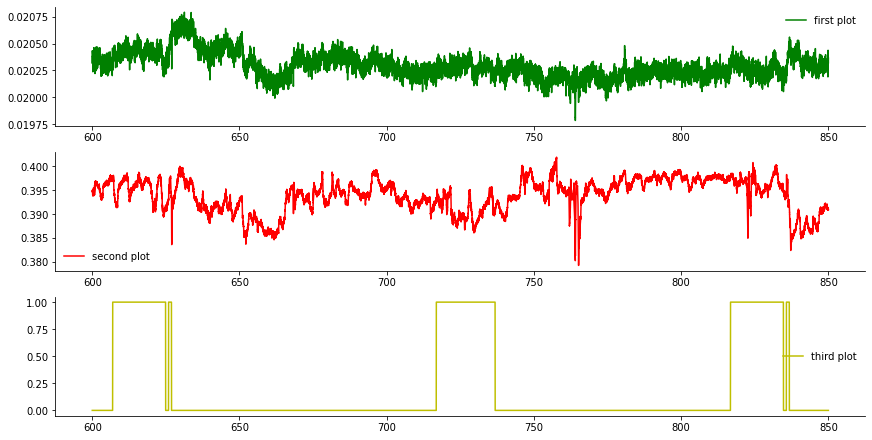

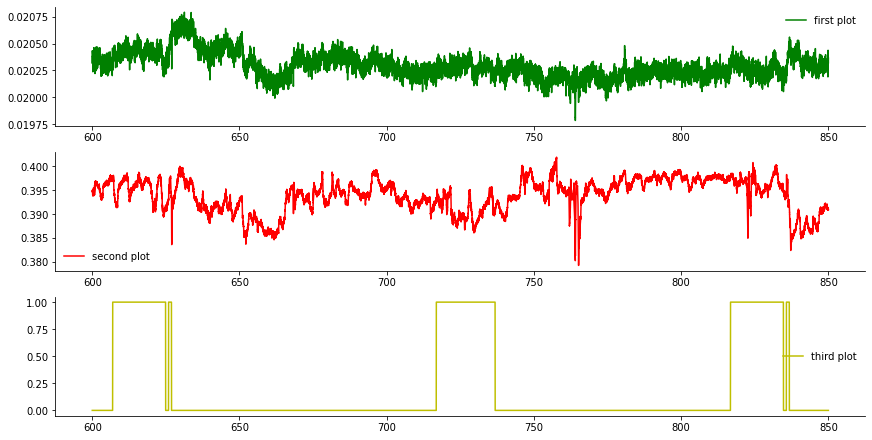

In [ ]:
def plot_feature(df, axs=None, xlim=None, color='b'):
    """ Takes a pandas DataFrame and plots it over specified time window (or whole time by default) """
    if type(df)==pd.core.series.Series:
        df = pd.DataFrame(df)
    if xlim==None:
        xlim=(df.index.min(), df.index.max())
    if type(axs)==np.ndarray:
        for ii in range(len(axs)):
            axs[ii].plot(df.t, df.loc[xlim[0]:xlim[1],df.columns[ii+1]].values, label=df.columns[ii+1], color=color[ii])
            axs[ii].legend()
            #print('checkpoint plot_feature')
    #elif axs==None:
    #    df.plot(color=color, title=df.columns[0])
    else:
        df.plot(color=color, title=df.columns[0])
    return axs


def plot_vectors(t, X, axs=[], xlim=[], ylim=[], color=[], label=[]): #t is 1-dimensional vector of N time points. X is a K x N matrix of N time points of K variables. axs, xlim, and colorlist if given as lists will be assigned to X.
    """ Takes a pandas DataFrame and plots it over specified time window (or whole time by default) """
    
    if len(color)==0: color=colorscheme   
    if type(axs)==np.ndarray:
        for ii in range(len(axs)):
            if len(xlim)==0: 
              xlim=(np.argmin(t), np.argmax(t))
              print('auto set xlim to '+str(xlim))
            try:
              print(label[ii])
            except:
              label = ['first plot','second plot','third plot','fourth plot','fifth plot',   'sixth plot','seventh plot','eighth plot','ninth plot', 'tenth plot']
            axs[ii].plot(t[xlim[0]:xlim[1]], X[ii,xlim[0]:xlim[1]], label=label[ii], color=color[ii])
            axs[ii].legend()
            #print('checkpoint plot_feature')
    #elif axs==None:
    #    df.plot(color=color, title=df.columns[0])
    else:
      for i in range(X.shape[0]):
        plt.plot(t, X[i])
        
    return axs

fig, axes = plt.subplots(3,1,constrained_layout=True)
axes = plot_vectors(dDoric.t.values ,  dDoric[['Green_doric_demod','Red_doric_demod','Events']].values.T , xlim=(np.argmin(abs(dDoric.t.values-600)),np.argmin(abs(dDoric.t.values-850) )), axs=axes, color=['g','r','y'])


fig, axes = plt.subplots(3,1,constrained_layout=True)
axes = plot_vectors(dDoric.t.values ,  dDoric[['Green_doric_demod','Red_doric_demod','Events']].values.T , xlim=(np.argmin(abs(dDoric.t.values-600)),np.argmin(abs(dDoric.t.values-850) )), axs=axes, color=['g','r','y'])



#axes[0,1].plot(t[np.array((GFPAdf.iloc[:,1]+GFPAdf.iloc[:,2])/2).astype(int)], GFPAdf.iloc[:,5], color=colorscheme[0], label='GFP_LSQ')
#axes[1,1].plot(t[np.array((RFPBdf.iloc[:,1]+RFPBdf.iloc[:,2])/2).astype(int)], RFPBdf.iloc[:,5], color=colorscheme[1], label='RFP_LSQ')
#axes[2,1].plot(t[np.array((RFP208Cdf.iloc[:,1]+RFP208Cdf.iloc[:,2])/2).astype(int)], RFP208Cdf.iloc[:,5], color=colorscheme[2], label='RFP208_LSQ')
#axes[0,0].plot( dDoric['t'],dDoric['Green_doric_demod'], color='g', label='GFP_doric_demod')
#axes[1,0].plot( dDoric['t'],dDoric['Red_doric_demod'], color='r', label='GFP_doric_demod')
#axes.legend()
#axes[1,1].legend()
#axes[2,1].legend()
#axes[0,0].legend()
#axes[1,0].legend()

plt.show()

In [ ]:
dDoric[['Green_doric_demod','Red_doric_demod']].values.shape

(317601, 2)

In [ ]:
print(len(GFPAdf))
print(len(RFPBdf))
print(len(RFP208Cdf))
dDoric['DeltaTimeIndex'] = pd.to_timedelta(dDoric['t'], 'S')
dDoric.index = dDoric['DeltaTimeIndex']
dDoric = dDoric.resample('5ms').mean()
print(dDoric.info())
#print(dDoric.info())
#display(dDoric.head())

180917
180917
180917
<class 'pandas.core.frame.DataFrame'>
TimedeltaIndex: 317602 entries, 00:00:00.082032 to 00:26:28.087032
Freq: 5L
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   t                  317601 non-null  float64
 1   G_Raw              317601 non-null  float64
 2   R_Raw              317601 non-null  float64
 3   Events             317601 non-null  float64
 4   Green_doric_demod  317601 non-null  float64
 5   Red_doric_demod    317601 non-null  float64
dtypes: float64(6)
memory usage: 17.0 MB
None


45685
45685
45685
(45685,)
YES


(45685, 2)

auto set xlim to (0, 45684)
DCoffset
scale


(45685, 2)

auto set xlim to (0, 45684)
DCoffset
scale


(45685, 2)

auto set xlim to (0, 45684)
DCoffset
scale


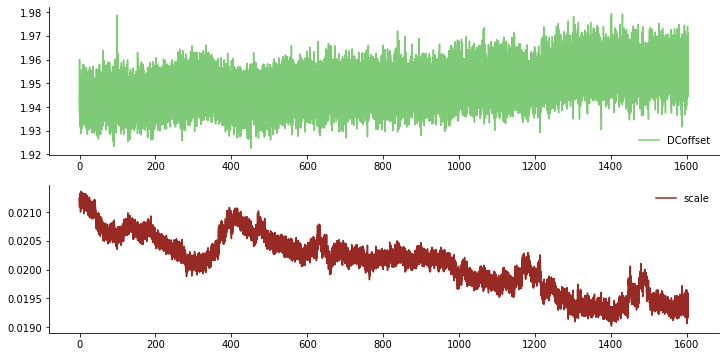

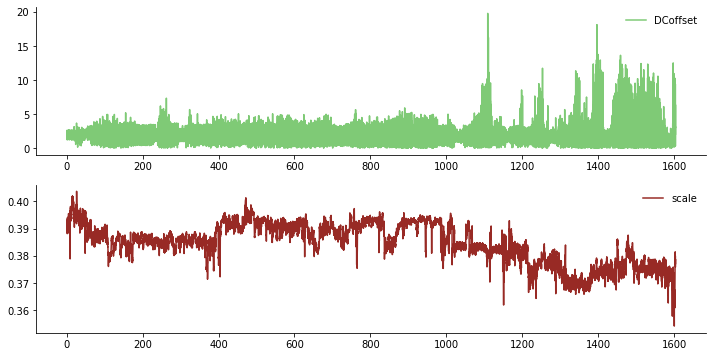

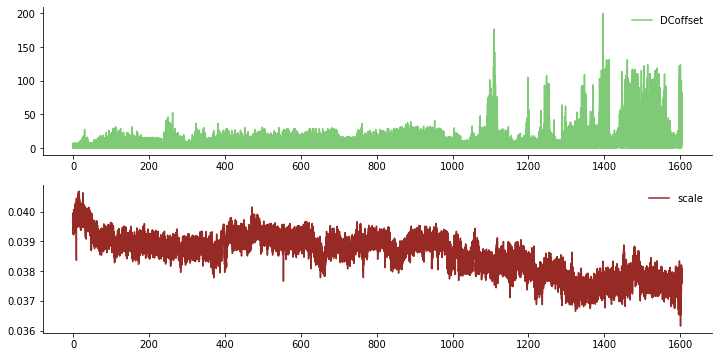

In [ ]:
gascolumns = ['window_num','start_idx','end_idx','shift','DCoffset','scale']
print(len(GFPAdf))
print(len(RFPBdf))
print(len(RFP208Cdf))
GFPAdf.columns = gascolumns
RFPBdf.columns = gascolumns
RFP208Cdf.columns = gascolumns
print(np.mean([GFPAdf.start_idx, GFPAdf.end_idx], axis=0).shape)
window_num_time = GFPAdf.iloc[:,0].values * 107/fs
GFPAdf['DCoffset']=abs(GFPAdf['DCoffset'])
GFPAdf['scale']=abs(GFPAdf['scale'])
RFPBdf['DCoffset']=abs(RFPBdf['DCoffset'])
RFPBdf['scale']=abs(RFPBdf['scale'])
RFP208Cdf['DCoffset']=abs(RFP208Cdf['DCoffset'])
RFP208Cdf['scale']=abs(RFP208Cdf['scale'])
if len(window_num_time) == len(GFPAdf):
  print('YES')
#display(GFPAdf.head())
#display(RFPBdf.head())
#display(RFP208Cdf.head())
for df in [GFPAdf[['DCoffset','scale']].values, RFPBdf[['DCoffset','scale']].values, RFP208Cdf[['DCoffset','scale']].values]:
  display(df.shape)
  fig, ax = plt.subplots(2,1)
  plot_vectors(window_num_time, df.T, axs=ax, label=['DCoffset','scale'])

In [ ]:
window_num_time.shape
#df[['DCoffset','scale']].values.T.shape
#GFPAdf.shape

(45685,)

In [ ]:
print(zebra1)


NameError: ignored

8it [00:00, 73.41it/s]

True
932 [[0, 215], [107, 322], [214, 429], [321, 536], [428, 643], [535, 750], [642, 857], [749, 964], [856, 1071], [963, 1178], [1070, 1285], [1177, 1392], [1284, 1499], [1391, 1606], [1498, 1713], [1605, 1820], [1712, 1927], [1819, 2034], [1926, 2141], [2033, 2248], [2140, 2355], [2247, 2462], [2354, 2569], [2461, 2676], [2568, 2783], [2675, 2890], [2782, 2997], [2889, 3104], [2996, 3211], [3103, 3318], [3210, 3425], [3317, 3532], [3424, 3639], [3531, 3746], [3638, 3853], [3745, 3960], [3852, 4067], [3959, 4174], [4066, 4281], [4173, 4388], [4280, 4495], [4387, 4602], [4494, 4709], [4601, 4816], [4708, 4923], [4815, 5030], [4922, 5137], [5029, 5244], [5136, 5351], [5243, 5458], [5350, 5565], [5457, 5672], [5564, 5779], [5671, 5886], [5778, 5993], [5885, 6100], [5992, 6207], [6099, 6314], [6206, 6421], [6313, 6528], [6420, 6635], [6527, 6742], [6634, 6849], [6741, 6956], [6848, 7063], [6955, 7170], [7062, 7277], [7169, 7384], [7276, 7491], [7383, 7598], [7490, 7705], [7597, 7812], [7

932it [00:13, 66.88it/s]


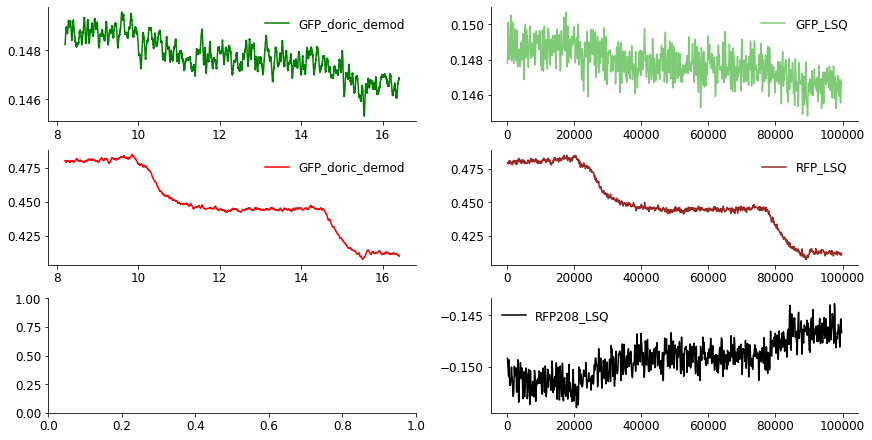

Time elapsed: 15.003869533538818 sec 


In [ ]:
import time
from tqdm import tqdm
zebra1=time.time()
def measure_with_LSQ(time_vector, GFP_data, RFP_data, window_width, overlap): #Proposed window_width = 215, overlap=int(window_width/2)
  print(len(GFP_data) == len(RFP_data))
  num_windows_GFP = int(np.floor((len(GFP_data)-window_width)/overlap))
  GFP_window_bounds = [[i*overlap, i*overlap + window_width] for i in range(num_windows_GFP)]
  num_windows_RFP = int(np.floor((len(RFP_data)-window_width)/overlap))
  RFP_window_bounds = [[i*overlap, i*overlap + window_width] for i in range(num_windows_RFP)]
  print(num_windows_GFP, GFP_window_bounds)
  print(num_windows_RFP, RFP_window_bounds)
  GFP_idx_shift_DCoffset_scale_list = []
  RFP_idx_shift_DCoffset_scale_list = []
  RFP208_idx_shift_DCoffset_scale_list = []
  for count, window in tqdm(enumerate(GFP_window_bounds)):
    fit_GFP = partial(fit_sin_shift_DCoffset_scale, real_data=GFP_data[window[0]:window[1]], real_time=time_vector[window[0]:window[1]], charfreq=GFP_charfreq )
    fit_RFP = partial(fit_two_composite_sinusoids,  real_data=RFP_data[window[0]:window[1]], real_time=time_vector[window[0]:window[1]], GFP_charfreq=GFP_charfreq , RFP_charfreq=RFP_charfreq)
    shift_DCoffset_scale_GFP = least_squares( fit_GFP, [0, 0.3, 0.2] )['x']
    shift_DCoffset_scale_RFP = least_squares( fit_RFP, [0, 0.6, 0.5,   0, 0.3, 0.2 ] )['x']

    GFP_idx_shift_DCoffset_scale_list.append([count,window[0],window[1], shift_DCoffset_scale_GFP[0], shift_DCoffset_scale_GFP[1], shift_DCoffset_scale_GFP[2]])
    RFP_idx_shift_DCoffset_scale_list.append([count,window[0],window[1], shift_DCoffset_scale_RFP[0], shift_DCoffset_scale_RFP[1], shift_DCoffset_scale_RFP[2]])
    RFP208_idx_shift_DCoffset_scale_list.append([count,window[0],window[1], shift_DCoffset_scale_RFP[3], shift_DCoffset_scale_RFP[4], shift_DCoffset_scale_RFP[5]])
  return(GFP_idx_shift_DCoffset_scale_list, RFP_idx_shift_DCoffset_scale_list, RFP208_idx_shift_DCoffset_scale_list)

GFPlistA, RFPlistB, RFP208listC = measure_with_LSQ(time_vector=t, GFP_data=GFP_Photodetector, RFP_data=RFP_Photodetector, window_width=215, overlap=int(215/2))
GFPAdf = pd.DataFrame(GFPlistA)
RFPBdf = pd.DataFrame(RFPlistB)
RFP208Cdf = pd.DataFrame(RFP208listC)

fig, axes = plt.subplots(3,2,constrained_layout=True)
axes[0,1].plot((t[int(GFPAdf.iloc[:,1]+GFPAdf.iloc[:,2])/2)], GFPAdf.iloc[:,5], color=colorscheme[0], label='GFP_LSQ')
axes[1,1].plot((t[int(RFPBdf.iloc[:,1]+RFPBdf.iloc[:,2])/2)], RFPBdf.iloc[:,5], color=colorscheme[1], label='RFP_LSQ')
axes[2,1].plot((t[int(RFP208Cdf.iloc[:,1]+RFP208Cdf.iloc[:,2])/2)], RFP208Cdf.iloc[:,5], color=colorscheme[2], label='RFP208_LSQ')
axes[0,0].plot( dDoric['t'],dDoric['Green_doric_demod'], color='g', label='GFP_doric_demod')
axes[1,0].plot( dDoric['t'],dDoric['Red_doric_demod'], color='r', label='GFP_doric_demod')
axes[0,1].legend()
axes[1,1].legend()
axes[2,1].legend()
axes[0,0].legend()
axes[1,0].legend()
fig.suptitle()
plt.show()

print('Time elapsed: {} sec '.format(time.time()-zebra1))

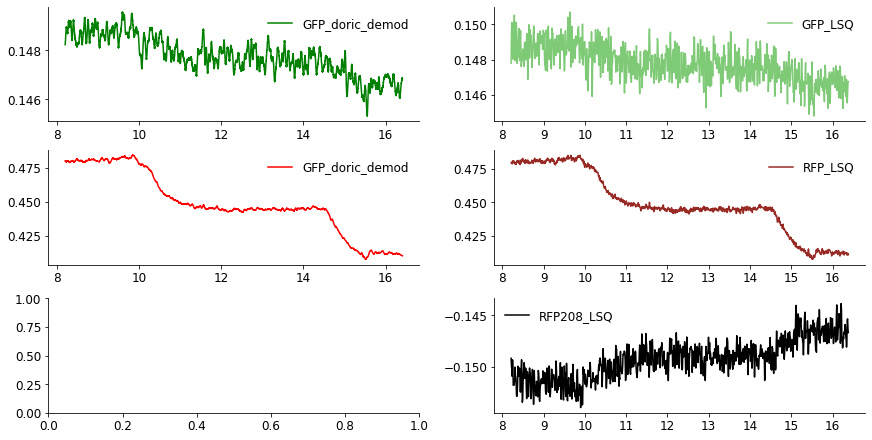

Time elapsed: 422.1349046230316 sec 


In [ ]:

fig, axes = plt.subplots(3,2,constrained_layout=True)
axes[0,1].plot(t[np.array((GFPAdf.iloc[:,1]+GFPAdf.iloc[:,2])/2).astype(int)], GFPAdf.iloc[:,5], color=colorscheme[0], label='GFP_LSQ')
axes[1,1].plot(t[np.array((RFPBdf.iloc[:,1]+RFPBdf.iloc[:,2])/2).astype(int)], RFPBdf.iloc[:,5], color=colorscheme[1], label='RFP_LSQ')
axes[2,1].plot(t[np.array((RFP208Cdf.iloc[:,1]+RFP208Cdf.iloc[:,2])/2).astype(int)], RFP208Cdf.iloc[:,5], color=colorscheme[2], label='RFP208_LSQ')
axes[0,0].plot( dDoric['t'],dDoric['Green_doric_demod'], color='g', label='GFP_doric_demod')
axes[1,0].plot( dDoric['t'],dDoric['Red_doric_demod'], color='r', label='GFP_doric_demod')
axes[0,1].legend()
axes[1,1].legend()
axes[2,1].legend()
axes[0,0].legend()
axes[1,0].legend()

plt.show()

print('Time elapsed: {} sec '.format(time.time()-zebra1))

In [ ]:
print(shift_DCoffset_scale_GFP)
print(shift_DCoffset_scale_RFP)

[2.9755 1.9356 0.1484]
[ 0.4679  1.3528  0.4795 -0.0743 -3.3703 -0.1492]


In [ ]:
print('Least Squares window width on GFP channel: ',GFP_find_maxes_mins_window +200, t[200+GFP_find_maxes_mins_window]-t[0])
print('Least Squares window width on RFP channel: ',RFP_find_maxes_mins_window +200, t[200+RFP_find_maxes_mins_window]-t[0])

Least Squares window width on GFP channel:  243 0.019934749999999113
Least Squares window width on RFP channel:  215 0.017637749999998675


In [ ]:
# Next step: get most out of RFP signal. 
# Try PSD (phase-sensitve detection)
# Try long-in amplification with truncated waveform for 285300 in June.
# If absolutely necessary, take a percentile spread approach.

def generate_RFP_Ref(shift_DCoffset_scale_RFP, charfreq=RFP_charfreq ): 
  RFP_Ref = shift_DCoffset_scale_RFP[2] * ( np.sin( 2 * np.pi * charfreq * t[:200+RFP_find_maxes_mins_window] + shift_DCoffset_scale_RFP[0]) + shift_DCoffset_scale_RFP[1] ) 
  return(RFP_Ref)
def generate_RFP_composite_Ref(shift_DCoffset_scale_RFP): # This must have 6 terms for two sin waves :  [shift572, DCoffset572, scale572, shift208, DCoffset208, scale208]
  RFP_composite_Ref = shift_DCoffset_scale_RFP[2] * ( np.sin( 2 * np.pi * RFP_charfreq * t[:200+RFP_find_maxes_mins_window] + shift_DCoffset_scale_RFP[0]) + shift_DCoffset_scale_RFP[1] ) +  shift_DCoffset_scale_RFP[5] * ( np.sin( 2 * np.pi * GFP_charfreq * t[:200+RFP_find_maxes_mins_window] + shift_DCoffset_scale_RFP[3]) + shift_DCoffset_scale_RFP[4] )
  return(RFP_composite_Ref)
def generate_GFP_Ref(shift_DCoffset_scale_GFP):
  GFP_Ref = shift_DCoffset_scale_GFP[2] * ( np.sin( 2 * np.pi * GFP_charfreq * t[:200+GFP_find_maxes_mins_window] + shift_DCoffset_scale_GFP[0]) + shift_DCoffset_scale_GFP[1] )  #np.sin(2*np.pi*GFP_charfreq*t[:200+GFP_find_maxes_mins_window])
  return(GFP_Ref)

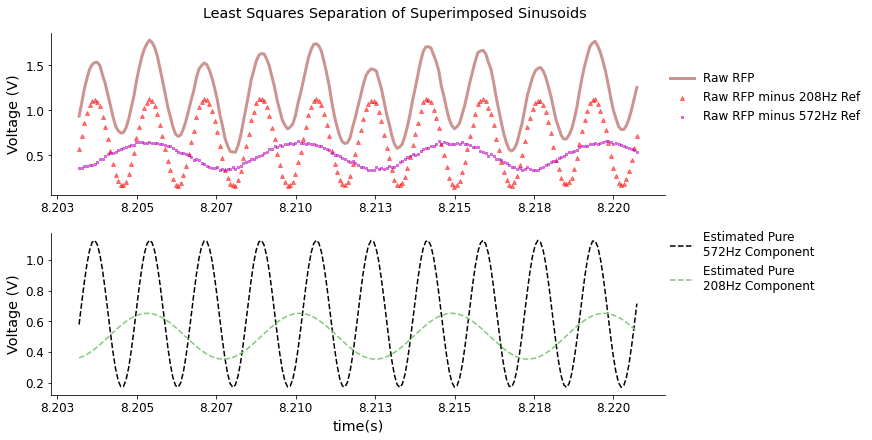

In [ ]:
############################# FIGURE 4.6 ############################################ FIGURE 4.6 ############################################ FIGURE 4.6 ############################################ FIGURE 4.6 ###############
############################# FIGURE 4.6 ############################################ FIGURE 4.6 ############################################ FIGURE 4.6 ############################################ FIGURE 4.6 ###############
############################# FIGURE 4.6 ############################################ FIGURE 4.6 ############################################ FIGURE 4.6 ############################################ FIGURE 4.6 ###############
############################# FIGURE 4.6 ############################################ FIGURE 4.6 ############################################ FIGURE 4.6 ############################################ FIGURE 4.6 ###############
############################# FIGURE 4.6 ############################################ FIGURE 4.6 ############################################ FIGURE 4.6 ############################################ FIGURE 4.6 ###############
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize']='large'
from matplotlib.ticker import FormatStrFormatter
locs = ['upper right', 'lower left', 'center left', 'lower center', 'center', 'right']
#get_ref208Hzfor_RFP = partial(fit_sin_shift_DCoffset_scale, real_data=RFP_Photodetector[:200+GFP_find_maxes_mins_window], real_time=t[:200+GFP_find_maxes_mins_window], charfreq=GFP_charfreq)
testRed_wave = generate_RFP_Ref(shift_DCoffset_scale_RFP[:3])

fig, (ax, ax2) = plt.subplots(2,1, constrained_layout=True)
ax.plot(t[:200+RFP_find_maxes_mins_window], RFP_Photodetector[:200+RFP_find_maxes_mins_window] , color=colorscheme[1], label='Raw RFP', alpha=0.5, lw=3)
ax.scatter(t[:200+RFP_find_maxes_mins_window], RFP_Photodetector[:200+RFP_find_maxes_mins_window] - generate_RFP_Ref(shift_DCoffset_scale_RFP[3:], charfreq=GFP_charfreq), color='r', label='Raw RFP minus 208Hz Ref', alpha=0.5, s=15, marker='^')
ax.scatter(t[:200+RFP_find_maxes_mins_window], RFP_Photodetector[:200+RFP_find_maxes_mins_window] - testRed_wave, color='m', label='Raw RFP minus 572Hz Ref', alpha=0.5, s=8, marker='s')
ax2.plot(t[:200+RFP_find_maxes_mins_window], testRed_wave, color='k', label='Estimated Pure\n572Hz Component', linestyle='--')
ax2.plot(t[:200+RFP_find_maxes_mins_window] ,generate_RFP_Ref(shift_DCoffset_scale_RFP[3:], charfreq=GFP_charfreq), color=colorscheme[0], alpha=1, label='Estimated Pure\n208Hz Component', linestyle='--')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
#plt.rcParams['axes.']
ax2.set_xlabel('time(s)')
ax.set_ylabel('Voltage (V)')
ax2.set_ylabel('Voltage (V)')
ax.set_ylabel('Voltage (V)')
ax.legend(loc='center left', bbox_to_anchor= (1.0, 0.6), ncol=1, borderaxespad=0, frameon=False)
#ax.legend(loc='upper right')
ax2.legend(loc='lower left', bbox_to_anchor= (1.0, 0.6), ncol=1, borderaxespad=0, frameon=False)
fig.suptitle('Least Squares Separation of Superimposed Sinusoids                  ')
plt.show()

In [ ]:
RFP_charfreq
# Build a phase-sensitive detector for each channel, then compare to Doric dual lock-in.
fig, (axG, axR) = plt.subplots(2,1,constrained_layout=True)
axG.scatter( t[GFP_mxs[0,:].astype(int)], GFP_mxs[1,:] , color='k', label='maxes GFP')
axG.scatter( t[GFP_mns[0,:].astype(int)], GFP_mns[1,:] , color='gray', label='mins GFP')
axG.plot( t[:200+GFP_find_maxes_mins_window], GFP_Photodetector[:200+GFP_find_maxes_mins_window], color=colorscheme[0], alpha=0.5 )
axG.plot( t[:200+GFP_find_maxes_mins_window], GFP_Ref[:200+GFP_find_maxes_mins_window], color='k', linestyle='--')

axR.scatter( t[RFP_mxs[0,:].astype(int)], RFP_mxs[1,:] , color='k', label='maxes RFP')
axR.scatter( t[RFP_mns[0,:].astype(int)], RFP_mns[1,:] , color='gray', label='mins RFP')
axR.plot( t[:200+RFP_find_maxes_mins_window], RFP_Photodetector[:200+RFP_find_maxes_mins_window], color=colorscheme[1], alpha=0.5 )
axR.plot( t[:200+RFP_find_maxes_mins_window], RFP_Ref[:200+RFP_find_maxes_mins_window], color='k', linestyle='--')
axG.legend()
axR.legend()
plt.show()

572.205

100000
100000
# y = np.sin(2*np.pi* charfreq + SHIFT) * SCALE + DC_OFFSET
GFP ch: shift DCoffset scale  [2.9755 1.9356 0.1484]
RFP ch: shift572 DCoffset572 scale572 ___ shift208 DCoffset208 scale208 [ 0.4679  1.3528  0.4795 -0.0743 -3.3703 -0.1492]


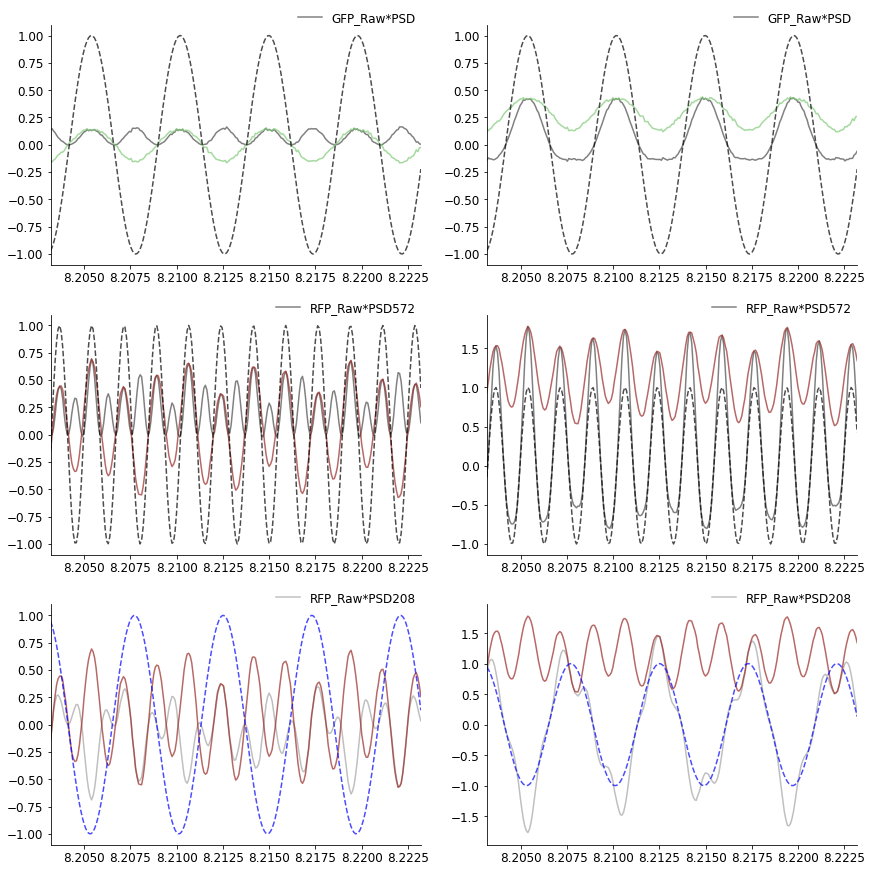

In [ ]:
#take RFP data
#multiply sin wave for ref
#order to try things in (parallel in subplot columns):
# (A)  subtracting RFP before multiplying sin wave (I think I have to)
# (B)  subtracting out the 208Hz signal before multiplying reference wave (probably a good idea, but it might be unncessary)
# (C)  using a naive reference signal (only phase shifted) versus using a signal trained on all three parameters (Perhaps this is a good place for AIC/BIC)
# (D)  Try different window lengths, just to make sure there's no phase shift over time (and if there is, see how often I have to update parameters)

#(A)
print(len(GFP_Photodetector))
print(len(RFP_Photodetector))
print('# y = np.sin(2*np.pi* charfreq + SHIFT) * SCALE + DC_OFFSET')
print('GFP ch: shift DCoffset scale ',shift_DCoffset_scale_GFP)
print('RFP ch: shift572 DCoffset572 scale572 ___ shift208 DCoffset208 scale208',shift_DCoffset_scale_RFP)

GFP_Ref_PSD = np.sin( 2*np.pi* GFP_charfreq *equidistant_t + shift_DCoffset_scale_GFP[0] ) 
RFP_Ref572_PSD = np.sin( 2*np.pi* RFP_charfreq *equidistant_t + shift_DCoffset_scale_RFP[0] ) 
RFP_Ref208_PSD = np.sin( 2*np.pi* GFP_charfreq *equidistant_t + shift_DCoffset_scale_RFP[3] ) 
#Lock-in model (Phase-sensitive detection - SRS Lock-In Amplifiers paper)
# Vsig == signal amplitude
# omega_r == signal frequency
# theta_sig == signal's phase
# The output of the PSD is the product of the reference sine wave with the raw data's sine wave
#interpobj_GFP = CubicSpline(t, GFP_Photodetector)
#interpobj_RFP = CubicSpline(t, RFP_Photodetector)
GFP_equidistant = interpobj_GFP(equidistant_t)
RFP_equidistant = interpobj_RFP(equidistant_t)
#equidistant_t
GFP_PSD       = GFP_Ref_PSD * (GFP_equidistant - np.mean(GFP_equidistant))
RFP_PSD       = RFP_Ref572_PSD * (RFP_equidistant- np.mean(RFP_equidistant))
RFP_PSD208    = RFP_Ref208_PSD * (RFP_equidistant- np.mean(RFP_equidistant))
GFP_PSD__     = GFP_Ref_PSD * GFP_equidistant
RFP_PSD__     = RFP_Ref572_PSD * RFP_equidistant
RFP_PSD208__  = RFP_Ref208_PSD * RFP_equidistant

bigfig, ((axis0GFP,axis1GFP),(axis0RFP, axis1RFP),(axis0RFP208, axis1RFP208)) = plt.subplots(3,2,constrained_layout=True, figsize=[12,12])
#(A) Test subtracting mean versus not
axis0GFP.plot(equidistant_t, GFP_PSD, color='gray', label='GFP_Raw*PSD') 
axis0GFP.plot(equidistant_t, GFP_equidistant- np.mean(GFP_equidistant), color=colorscheme[0], alpha=0.7) 
axis0GFP.plot(equidistant_t, GFP_Ref_PSD, color='k', linestyle='--', alpha=0.7) 
#axis0GFP.legend(loc='upper right')
axis0GFP.legend(loc='lower right', bbox_to_anchor= (1.0, 0.98), borderaxespad=0, frameon=False)
axis0RFP.plot(equidistant_t, RFP_PSD, color='gray', label='RFP_Raw*PSD572') 
axis0RFP.plot(equidistant_t, RFP_equidistant- np.mean(RFP_equidistant), color=colorscheme[1], alpha=0.7) 
axis0RFP.plot(equidistant_t, RFP_Ref572_PSD, color='k', linestyle='--', alpha=0.7) 
axis0RFP.legend(loc='lower right', bbox_to_anchor= (1.0, 0.98), borderaxespad=0, frameon=False)
axis0RFP208.plot(equidistant_t, RFP_PSD208, color='gray', alpha=0.5, label='RFP_Raw*PSD208')
axis0RFP208.plot(equidistant_t, RFP_equidistant- np.mean(RFP_equidistant), color=colorscheme[1], alpha=0.7)
axis0RFP208.plot(equidistant_t, RFP_Ref208_PSD, color='b', linestyle='--', alpha=0.7)
#And try without subtracting mean. 
axis0RFP208.legend(loc='lower right', bbox_to_anchor= (1.0, 0.98), borderaxespad=0, frameon=False)
axis1GFP.plot(equidistant_t, GFP_PSD__, color='gray', label='GFP_Raw*PSD') 
axis1GFP.plot(equidistant_t, GFP_equidistant, color=colorscheme[0], alpha=0.7) 
axis1GFP.plot(equidistant_t, GFP_Ref_PSD, color='k', linestyle='--', alpha=0.7) 
axis1GFP.legend(loc='lower right', bbox_to_anchor= (1.0, 0.98), borderaxespad=0, frameon=False)
axis1RFP.plot(equidistant_t, RFP_PSD__, color='gray', label='RFP_Raw*PSD572') 
axis1RFP.plot(equidistant_t, RFP_equidistant, color=colorscheme[1], alpha=0.7) 
axis1RFP.plot(equidistant_t, RFP_Ref572_PSD, color='k', linestyle='--', alpha=0.7) 
axis1RFP.legend(loc='lower right', bbox_to_anchor= (1.0, 0.98), borderaxespad=0, frameon=False)
axis1RFP208.plot(equidistant_t, RFP_PSD208__, color='gray', alpha=0.5, label='RFP_Raw*PSD208')
axis1RFP208.plot(equidistant_t, RFP_equidistant, color=colorscheme[1], alpha=0.7)
axis1RFP208.plot(equidistant_t, RFP_Ref208_PSD, color='b', linestyle='--', alpha=0.7)
axis1RFP208.legend(loc='lower right', bbox_to_anchor= (1.0, 0.98), borderaxespad=0, frameon=False)
for row in ((axis0GFP,axis1GFP),(axis0RFP, axis1RFP),(axis0RFP208, axis1RFP208)):
  for col in row:
    col.set_xlim(equidistant_t[0], equidistant_t[0]+0.02)





In [ ]:
fs = 1/np.mean(np.diff(dDoric.t.values))
print('fs: '+str(fs))
GFP_charfreq = 208.616 # (Hz)
RFP_charfreq = 572.205 # (Hz)
cutofffreq_GFP = GFP_charfreq * 1.3
cutofffreq_RFP = RFP_charfreq * 1.15
#Python code scipy.signal.kaiserord expresses width and ripple in terms of Nyquist frequency (fs/2)
nyquist_freq = fs/2
width_GFP = (cutofffreq_GFP * 0.04)/nyquist_freq #width between high freq end of passband and low freq end of stopband.
width_RFP = (cutofffreq_RFP * 0.02)/nyquist_freq
ripple_db=30
# Compute the order and Kaiser parameter for the FIR filter.
N_GFP, beta_GFP = kaiserord(ripple_db, width_GFP)
N_RFP, beta_RFP = kaiserord(ripple_db, width_RFP)

print(N_GFP, beta_GFP)
print(N_RFP, beta_RFP)
NGRFP_betaGRFP.append((N_GFP, N_RFP, beta_GFP, beta_RFP))

b_k208 = firwin(N_GFP, (cutofffreq_GFP)/nyquist_freq, window=('kaiser', beta_GFP))
b_k572 = firwin(N_RFP, (cutofffreq_RFP)/nyquist_freq, window=('kaiser', beta_RFP))
a_k208_k572 = 1

#kaiser_208 = kaiser(N_GFP, beta_GFP)
#kaiser_572 = kaiser(N_RFP, beta_RFP)




fs: 12190.387424992257
1727 2.1166248611409806
1424 2.1166248611409806


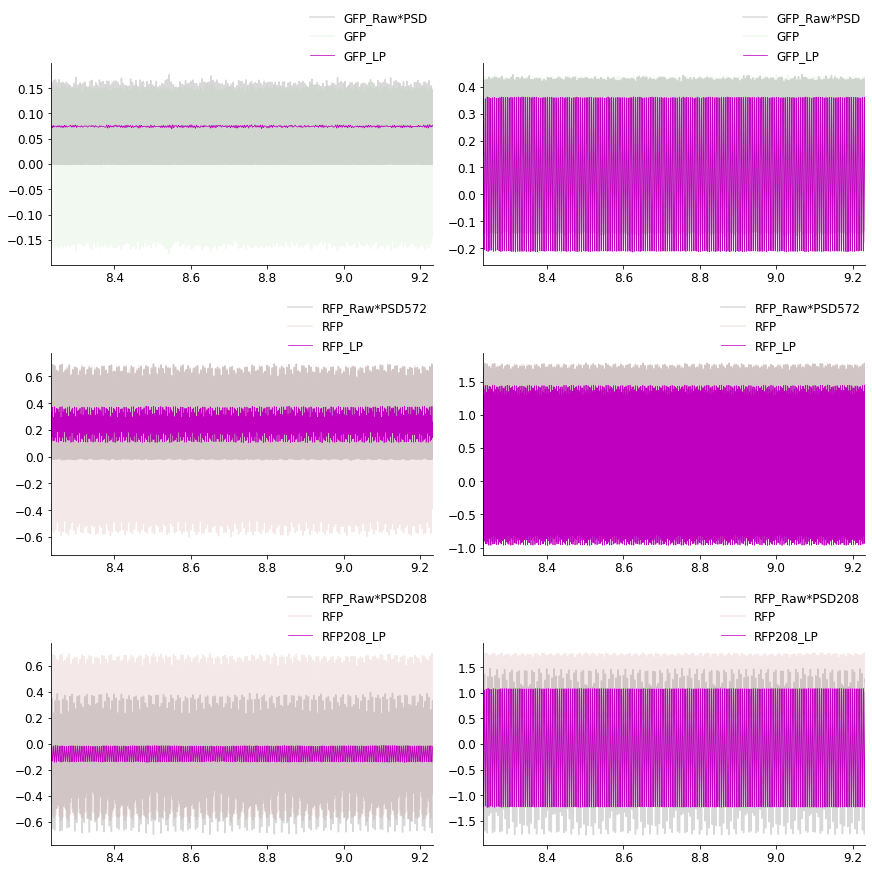

In [ ]:
#GFP_PSD       = GFP_Ref_PSD * (GFP_equidistant - np.mean(GFP_equidistant))
#RFP_PSD       = RFP_Ref572_PSD * (RFP_equidistant- np.mean(RFP_equidistant))
#RFP_PSD208    = RFP_Ref208_PSD * (RFP_equidistant- np.mean(RFP_equidistant))
#GFP_PSD__     = GFP_Ref_PSD * GFP_equidistant
#RFP_PSD__     = RFP_Ref572_PSD * RFP_equidistant
#RFP_PSD208__  = RFP_Ref208_PSD * RFP_equidistant

GFP_LP = filtfilt(b_k208, a_k208_k572, GFP_PSD )
RFP_LP = filtfilt(b_k572, a_k208_k572, RFP_PSD )
RFP208_LP = filtfilt(b_k208, a_k208_k572, RFP_PSD208 )

GFP_LP__ = filtfilt(b_k208, a_k208_k572, GFP_PSD__ )
RFP_LP__ = filtfilt(b_k572, a_k208_k572, RFP_PSD__ )
RFP208_LP__ = filtfilt(b_k208, a_k208_k572, RFP_PSD208__)


bigfig2, ((axis0GFP,axis1GFP),(axis0RFP, axis1RFP),(axis0RFP208, axis1RFP208)) = plt.subplots(3,2,constrained_layout=True, figsize=[12,12])
#(A) Test subtracting mean versus not
axis0GFP.plot(equidistant_t, GFP_PSD, color='gray', label='GFP_Raw*PSD', alpha=0.3) 
axis0GFP.plot(equidistant_t, GFP_equidistant- np.mean(GFP_equidistant), color=colorscheme[0], alpha=0.1, label='GFP') 
axis0GFP.plot(equidistant_t, GFP_LP, color='m', lw=0.75, alpha=1, label='GFP_LP') 
#axis0GFP.legend(loc='upper right')
axis0GFP.legend(loc='lower right', bbox_to_anchor= (1.0, 0.98), borderaxespad=0, frameon=False)
axis0RFP.plot(equidistant_t, RFP_PSD, color='gray', label='RFP_Raw*PSD572',alpha=0.3) 
axis0RFP.plot(equidistant_t, RFP_equidistant- np.mean(RFP_equidistant), color=colorscheme[1], alpha=0.1, label='RFP') 
axis0RFP.plot(equidistant_t, RFP_LP, color='m', lw=0.75, alpha=1,  label='RFP_LP') 
axis0RFP.legend(loc='lower right', bbox_to_anchor= (1.0, 0.98), borderaxespad=0, frameon=False)
axis0RFP208.plot(equidistant_t, RFP_PSD208, color='gray', alpha=0.3, label='RFP_Raw*PSD208')
axis0RFP208.plot(equidistant_t, RFP_equidistant- np.mean(RFP_equidistant), color=colorscheme[1], alpha=0.1, label='RFP')
axis0RFP208.plot(equidistant_t, RFP208_LP, color='m', lw=0.75, alpha=1,  label='RFP208_LP')
#And try without subtracting mean. 
axis0RFP208.legend(loc='lower right', bbox_to_anchor= (1.0, 0.98), borderaxespad=0, frameon=False)
axis1GFP.plot(equidistant_t, GFP_PSD__, color='gray', label='GFP_Raw*PSD',alpha=0.3) 
axis1GFP.plot(equidistant_t, GFP_equidistant, color=colorscheme[0], alpha=0.1, label='GFP') 
axis1GFP.plot(equidistant_t, GFP_LP__, color='m', lw=0.75, alpha=1, label='GFP_LP') 
axis1GFP.legend(loc='lower right', bbox_to_anchor= (1.0, 0.98), borderaxespad=0, frameon=False)
axis1RFP.plot(equidistant_t, RFP_PSD__, color='gray', label='RFP_Raw*PSD572', alpha=0.3) 
axis1RFP.plot(equidistant_t, RFP_equidistant, color=colorscheme[1], alpha=0.1, label='RFP') 
axis1RFP.plot(equidistant_t, RFP_LP__, color='m', lw=0.75, alpha=1, label='RFP_LP') 
axis1RFP.legend(loc='lower right', bbox_to_anchor= (1.0, 0.98), borderaxespad=0, frameon=False)
axis1RFP208.plot(equidistant_t, RFP_PSD208__, color='gray', alpha=0.3, label='RFP_Raw*PSD208')
axis1RFP208.plot(equidistant_t, RFP_equidistant, color=colorscheme[1], alpha=0.1, label='RFP')
axis1RFP208.plot(equidistant_t, RFP208_LP__, color='m', lw=0.75, alpha=1, label='RFP208_LP')
axis1RFP208.legend(loc='lower right', bbox_to_anchor= (1.0, 0.98), borderaxespad=0, frameon=False)
for row in ((axis0GFP,axis1GFP),(axis0RFP, axis1RFP),(axis0RFP208, axis1RFP208)):
  for col in row:
    col.set_xlim(equidistant_t[0]+0.03, equidistant_t[0]+1.03)


Text(0.5, 0.98, 'Left FiltFilt, Right FF+mean18ms')

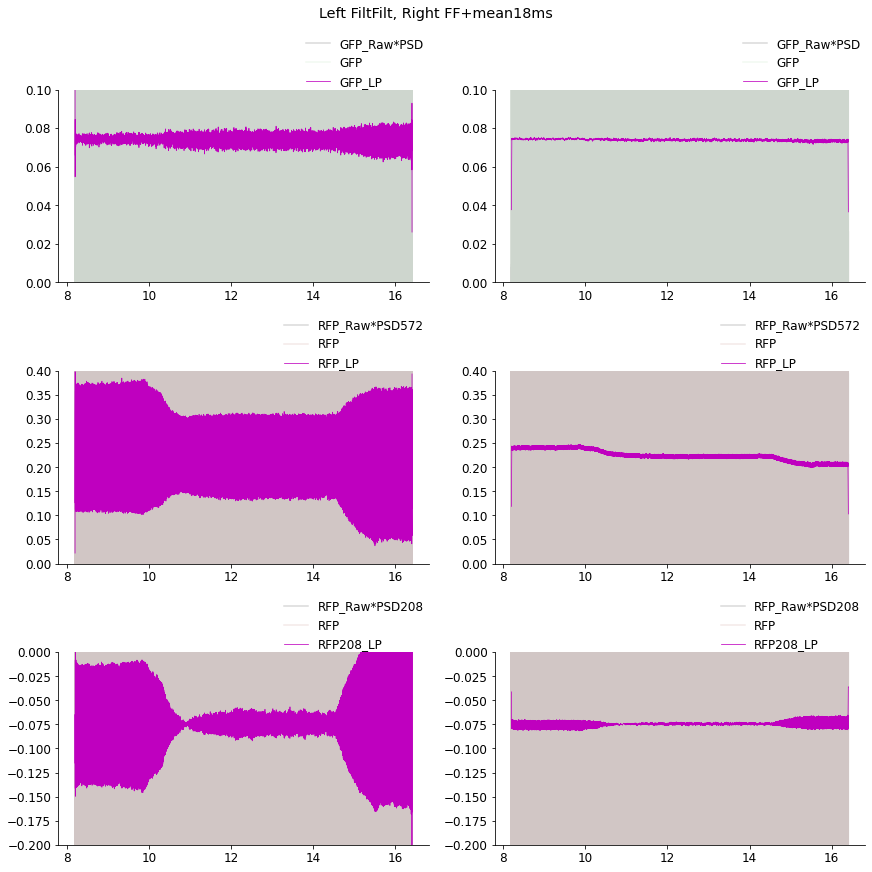

In [ ]:
moving_average_convolver = np.ones(215)/215

bigfig2, ((axis0GFP,axis1GFP),(axis0RFP, axis1RFP),(axis0RFP208, axis1RFP208)) = plt.subplots(3,2,constrained_layout=True, figsize=[12,12])
#(A) Test subtracting mean versus not
axis0GFP.plot(equidistant_t, GFP_PSD, color='gray', label='GFP_Raw*PSD', alpha=0.3) 
axis0GFP.plot(equidistant_t, GFP_equidistant- np.mean(GFP_equidistant), color=colorscheme[0], alpha=0.1, label='GFP') 
axis0GFP.plot(equidistant_t, GFP_LP, color='m', lw=0.75, alpha=1, label='GFP_LP') 
axis0GFP.set_ylim(0,0.1)
#axis0GFP.legend(loc='upper right')
axis0GFP.legend(loc='lower right', bbox_to_anchor= (1.0, 0.98), borderaxespad=0, frameon=False)
axis0RFP.plot(equidistant_t, RFP_PSD, color='gray', label='RFP_Raw*PSD572',alpha=0.3) 
axis0RFP.plot(equidistant_t, RFP_equidistant- np.mean(RFP_equidistant), color=colorscheme[1], alpha=0.1, label='RFP') 
axis0RFP.plot(equidistant_t, RFP_LP, color='m', lw=0.75, alpha=1,  label='RFP_LP') 
axis0RFP.set_ylim(0,0.4)
axis0RFP.legend(loc='lower right', bbox_to_anchor= (1.0, 0.98), borderaxespad=0, frameon=False)
axis0RFP208.plot(equidistant_t, RFP_PSD208, color='gray', alpha=0.3, label='RFP_Raw*PSD208')
axis0RFP208.plot(equidistant_t, RFP_equidistant- np.mean(RFP_equidistant), color=colorscheme[1], alpha=0.1, label='RFP')
axis0RFP208.plot(equidistant_t, RFP208_LP, color='m', lw=0.75, alpha=1,  label='RFP208_LP')
#And try without subtracting mean. 
axis0RFP208.set_ylim(-0.2,0)
axis0RFP208.legend(loc='lower right', bbox_to_anchor= (1.0, 0.98), borderaxespad=0, frameon=False)

axis1GFP.plot(equidistant_t, GFP_PSD, color='gray', label='GFP_Raw*PSD', alpha=0.3) 
axis1GFP.plot(equidistant_t, GFP_equidistant- np.mean(GFP_equidistant), color=colorscheme[0], alpha=0.1, label='GFP') 
axis1GFP.plot(equidistant_t, np.convolve( moving_average_convolver,GFP_LP,mode='same'), color='m', lw=0.75, alpha=1, label='GFP_LP') 
axis1GFP.set_ylim(0,0.1)
axis1GFP.legend(loc='lower right', bbox_to_anchor= (1.0, 0.98), borderaxespad=0, frameon=False)
axis1RFP.plot(equidistant_t, RFP_PSD, color='gray', label='RFP_Raw*PSD572',alpha=0.3) 
axis1RFP.plot(equidistant_t, RFP_equidistant- np.mean(RFP_equidistant), color=colorscheme[1], alpha=0.1, label='RFP') 
axis1RFP.plot(equidistant_t, np.convolve( moving_average_convolver,RFP_LP,mode='same'), color='m', lw=0.75, alpha=1,  label='RFP_LP') 
axis1RFP.set_ylim(0,0.4)
axis1RFP.legend(loc='lower right', bbox_to_anchor= (1.0, 0.98), borderaxespad=0, frameon=False)
axis1RFP208.plot(equidistant_t, RFP_PSD208, color='gray', alpha=0.3, label='RFP_Raw*PSD208')
axis1RFP208.plot(equidistant_t, RFP_equidistant- np.mean(RFP_equidistant), color=colorscheme[1], alpha=0.1, label='RFP')
axis1RFP208.plot(equidistant_t, np.convolve( moving_average_convolver,RFP208_LP,mode='same'), color='m', lw=0.75, alpha=1,  label='RFP208_LP')
axis1RFP208.legend(loc='lower right', bbox_to_anchor= (1.0, 0.98), borderaxespad=0, frameon=False)
axis1RFP208.set_ylim(-0.2,0)
#for row in ((axis0GFP,axis1GFP),(axis0RFP, axis1RFP),(axis0RFP208, axis1RFP208)):
  #for col in row:
    #col.set_xlim(equidistant_t[0]+0.03, equidistant_t[0]+1.03)
bigfig2.suptitle('Left FiltFilt, Right FF+mean18ms')
    

Text(0.5, 0.98, 'Doric on Left,    PSD+LPF on Right')

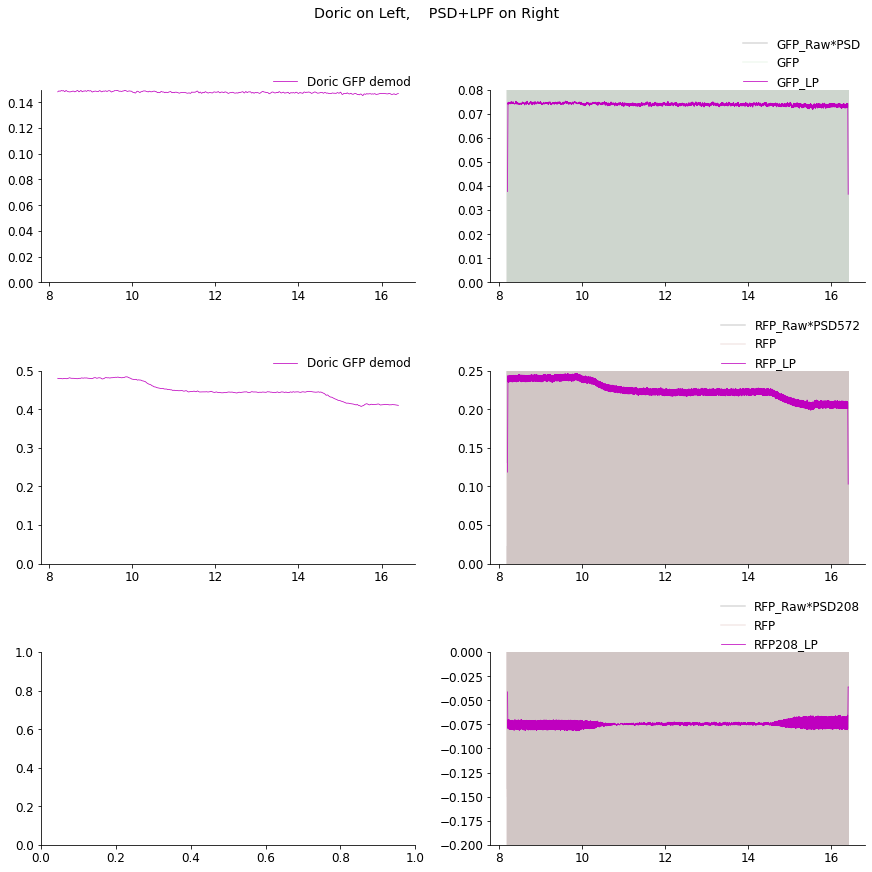

In [ ]:
bigfig2, ((axis0GFP,axis1GFP),(axis0RFP, axis1RFP),(axis0RFP208, axis1RFP208)) = plt.subplots(3,2,constrained_layout=True, figsize=[12,12])
#(A) Test subtracting mean versus not
#axis0GFP.plot(d, GFP_PSD, color='gray', label='GFP_Raw*PSD', alpha=0.3) 
#axis0GFP.plot(equidistant_t, GFP_equidistant- np.mean(GFP_equidistant), color=colorscheme[0], alpha=0.1, label='GFP') 
axis0GFP.plot(dDoric['t'], dDoric['Green_doric_demod'], color='m', lw=0.75, alpha=1, label='Doric GFP demod') 
axis0GFP.set_ylim(0,0.15)
#axis0GFP.legend(loc='upper right')
axis0GFP.legend(loc='lower right', bbox_to_anchor= (1.0, 0.98), borderaxespad=0, frameon=False)
#axis0RFP.plot(equidistant_t, RFP_PSD, color='gray', label='RFP_Raw*PSD572',alpha=0.3) 
#axis0RFP.plot(equidistant_t, RFP_equidistant- np.mean(RFP_equidistant), color=colorscheme[1], alpha=0.1, label='RFP') 
axis0RFP.plot(dDoric['t'], dDoric['Red_doric_demod'], color='m', lw=0.75, alpha=1, label='Doric GFP demod') 
axis0RFP.set_ylim(0,0.5)
axis0RFP.legend(loc='lower right', bbox_to_anchor= (1.0, 0.98), borderaxespad=0, frameon=False)
#axis0RFP208.plot(equidistant_t, RFP_PSD208, color='gray', alpha=0.3, label='RFP_Raw*PSD208')
#axis0RFP208.plot(equidistant_t, RFP_equidistant- np.mean(RFP_equidistant), color=colorscheme[1], alpha=0.1, label='RFP')
#axis0RFP208.plot(equidistant_t, RFP208_LP, color='m', lw=0.75, alpha=1,  label='RFP208_LP')
#And try without subtracting mean. 
#axis0RFP208.set_ylim(-0.2,0)
#axis0RFP208.legend(loc='lower right', bbox_to_anchor= (1.0, 0.98), borderaxespad=0, frameon=False)

axis1GFP.plot(equidistant_t, GFP_PSD, color='gray', label='GFP_Raw*PSD', alpha=0.3) 
axis1GFP.plot(equidistant_t, GFP_equidistant- np.mean(GFP_equidistant), color=colorscheme[0], alpha=0.1, label='GFP') 
axis1GFP.plot(equidistant_t, np.convolve( moving_average_convolver,GFP_LP,mode='same'), color='m', lw=0.75, alpha=1, label='GFP_LP') 
axis1GFP.set_ylim(0,0.08)
axis1GFP.legend(loc='lower right', bbox_to_anchor= (1.0, 0.98), borderaxespad=0, frameon=False)
axis1RFP.plot(equidistant_t, RFP_PSD, color='gray', label='RFP_Raw*PSD572',alpha=0.3) 
axis1RFP.plot(equidistant_t, RFP_equidistant- np.mean(RFP_equidistant), color=colorscheme[1], alpha=0.1, label='RFP') 
axis1RFP.plot(equidistant_t, np.convolve( moving_average_convolver,RFP_LP,mode='same'), color='m', lw=0.75, alpha=1,  label='RFP_LP') 
axis1RFP.set_ylim(0,0.25)
axis1RFP.legend(loc='lower right', bbox_to_anchor= (1.0, 0.98), borderaxespad=0, frameon=False)
axis1RFP208.plot(equidistant_t, RFP_PSD208, color='gray', alpha=0.3, label='RFP_Raw*PSD208')
axis1RFP208.plot(equidistant_t, RFP_equidistant- np.mean(RFP_equidistant), color=colorscheme[1], alpha=0.1, label='RFP')
axis1RFP208.plot(equidistant_t, np.convolve( moving_average_convolver,RFP208_LP,mode='same'), color='m', lw=0.75, alpha=1,  label='RFP208_LP')
axis1RFP208.legend(loc='lower right', bbox_to_anchor= (1.0, 0.98), borderaxespad=0, frameon=False)
axis1RFP208.set_ylim(-0.2,0)
#for row in ((axis0GFP,axis1GFP),(axis0RFP, axis1RFP),(axis0RFP208, axis1RFP208)):
  #for col in row:
    #col.set_xlim(equidistant_t[0]+0.03, equidistant_t[0]+1.03)
bigfig2.suptitle('Doric on Left,    PSD+LPF on Right')

In [ ]:
# t[:200+GFP_find_maxes_mins_window]
# t[:200+RFP_find_maxes_mins_window]
print( 'GFP_find_maxes_mins_window', GFP_find_maxes_mins_window )
print( 'RFP_find_maxes_mins_window', RFP_find_maxes_mins_window )

GFP_find_maxes_mins_window 43
RFP_find_maxes_mins_window 15


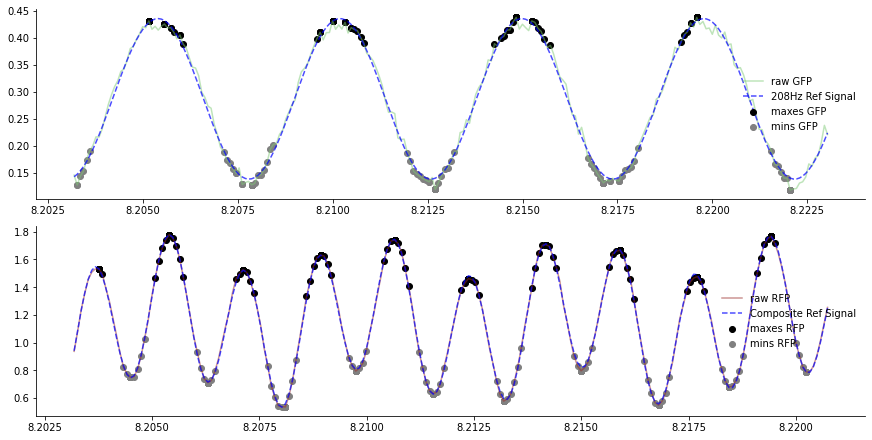

In [ ]:
fig, (axG, axR) = plt.subplots(2,1,constrained_layout=True)
axG.scatter( t[GFP_mxs[0,:].astype(int)], GFP_mxs[1,:] , color='k', label='maxes GFP')
axG.scatter( t[GFP_mns[0,:].astype(int)], GFP_mns[1,:] , color='gray', label='mins GFP')
axG.plot( t[:200+GFP_find_maxes_mins_window], GFP_Photodetector[:200+GFP_find_maxes_mins_window], color=colorscheme[0], alpha=0.5 , label='raw GFP')
axG.plot( t[:200+GFP_find_maxes_mins_window], GFP_Ref[:200+GFP_find_maxes_mins_window], color='b', linestyle='--',alpha=0.7, label='208Hz Ref Signal')

axR.scatter( t[RFP_mxs[0,:].astype(int)], RFP_mxs[1,:] , color='k', label='maxes RFP')
axR.scatter( t[RFP_mns[0,:].astype(int)], RFP_mns[1,:] , color='gray', label='mins RFP')
axR.plot( t[:200+RFP_find_maxes_mins_window], RFP_Photodetector[:200+RFP_find_maxes_mins_window], color=colorscheme[1], alpha=0.5 , label='raw RFP')
axR.plot( t[:200+RFP_find_maxes_mins_window], RFP_Ref[:200+RFP_find_maxes_mins_window], color='b', linestyle='--',alpha=0.7, label='Composite Ref Signal')
axG.legend(loc='center right')
axR.legend(loc='center right')
plt.show()

In [ ]:

testmode=True #Boost debugging ability, plotting, and allow chunking

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
#from scipy.signal import kaiserord, kaiser, firwin, filtfilt, freqz
Doric_csvlist = glob('/content/drive/My Drive/Doric_Data/March7/LTMUUS_*_*_*_*.csv')
print(Doric_csvlist)
#Doric_csvlist = glob('/content/June21/DiscLTM_*_*_*_*.csv')
print(len(Doric_csvlist))
NGRFP_betaGRFP = []

if testmode==True: iterator = range(1) # Use this iterator for file batches.  
else: iterator = range(len(Doric_csvlist)) # Use this iterator when testing or debugging.      

for i in iterator:                         
  csvfile=Doric_csvlist[i]
  ID = csvfile.split('_')[-3]
  MonthDay = csvfile.split('_')[-2]
  IDENTIFIER = str(ID)+'_'+str(MonthDay)

  if testmode==True:
    dDoric_large = pd.read_csv(csvfile,skiprows=1, usecols=[0,1,2,3,4,5], chunksize=100000)
    dDoric = next(iter(dDoric_large))
  else:
    dDoric = pd.read_csv(csvfile,skiprows=1, usecols=[0,1,2,3,4,5]) # No chunking
  count1 = len(dDoric)
  print(dDoric.info())
  print(dDoric.head())
  print(dDoric.tail())
  dDoric= dDoric.dropna()
  print('{} NULL VALUES DROPPED'.format(count1 - len(dDoric)))


  dDoric = dDoric[['Time(s)', 'AIn-1 - Raw', 'AIn-2 - Raw', 'DI/O-2', 'AIn-1 - Dem (AOut-1)', 'AIn-2 - Dem (AOut-2)']]
  dDoric.columns = ['t','G_Raw','R_Raw','Events','Green_doric_demod','Red_doric_demod']

  print('t std should be non-negligible',dDoric['t'].diff().dropna().std())

  #dDoric['backup_R_Raw'] = dDoric['R_Raw'].copy()

  t = dDoric['t'].values
  GFP_Photodetector = dDoric['G_Raw'].values
  RFP_Photodetector = dDoric['R_Raw'].values

  GFP_demodulated = demodulateSignalAtFrequency(t, GFP_Photodetector, GFP_charfreq)
  RFP_demodulated = demodulateSignalAtFrequency(t, RFP_Photodetector, RFP_charfreq)

  print('Should be 1.0 to indicate consistent timekeeping: ', np.mean(GFP_demodulated['time'] == RFP_demodulated['time']))
  t = GFP_demodulated['time']
  GFP_magnitude = GFP_demodulated['magnitude']
  RFP_magnitude = RFP_demodulated['magnitude']

  print('time_std should be reduced now or eliminated',dDoric['t'].diff().dropna().std())

  fig, axes = plt.subplots(2,1, constrained_layout=True)
  axes[0].plot(dDoric['t'], dDoric['Green_doric_demod'], label='Doric-demod-GFP', color='k', lw='1')
  axes[0].plot(t, GFP_magnitude, label='My-demod-GFP', color='', lw='1')
  axes[1].plot(dDoric['t'], dDoric['Red_doric_demod'], label='Doric-demod-RFP', color='k', lw='1')
  axes[1].plot(t, RFP_magnitude, label='My-demod-RFP', color='', lw='1')

  plt.show()

['/content/drive/My Drive/Doric_Data/March7/LTMUUS_walter_285299_mar7_2020.csv', '/content/drive/My Drive/Doric_Data/March7/LTMUUS_walter_285305_mar7_2020.csv', '/content/drive/My Drive/Doric_Data/March7/LTMUUS_walter_285306_mar7_2020.csv', '/content/drive/My Drive/Doric_Data/March7/LTMUUS_walter_285300_mar7_2020.csv']
4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Time(s)               100000 non-null  float64
 1   AIn-1 - Dem (AOut-1)  99000 non-null   float64
 2   AIn-1 - Raw           100000 non-null  float64
 3   AIn-2 - Dem (AOut-2)  99000 non-null   float64
 4   AIn-2 - Raw           100000 non-null  float64
 5   DI/O-2                100000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 4.6 MB
None
    Time(s)  AIn-1 - Dem (AOut-1)  ...  AIn-2 - Raw  DI/O-2
0  0.000000                   NaN  ..

ValueError: ignored

In [ ]:
print( 'GFP_find_maxes_mins_window', GFP_find_maxes_mins_window )
print( 'RFP_find_maxes_mins_window', RFP_find_maxes_mins_window )

In [ ]:
#Figure 2?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from scipy.signal import kaiserord, kaiser, firwin, filtfilt, freqz
Doric_csvlist = glob('/content/drive/My Drive/Doric_Data/June20/DiscPTC_*_*_*_*.csv')
print(len(Doric_csvlist))


for i in range(len(Doric_csvlist)): #This has files.
#for i in range(1): #Use this one for testing.
  csvfile=Doric_csvlist[i]
  ID = csvfile.split('_')[-3]
  MonthDay = csvfile.split('_')[-2]
  IDENTIFIER = str(ID)+'_'+str(MonthDay)

  dDoric = pd.read_csv(csvfile,skiprows=1, usecols=[0,1,2,3,4,5])#, chunksize=100000)
  #dDoric = next(iter(dDoric_large))
  count1 = len(dDoric)
  print(dDoric.info())
  print(dDoric.head())
  print(dDoric.tail())
  dDoric= dDoric.dropna()
  print('{} NULL VALUES DROPPED'.format(count1 - len(dDoric)))


  dDoric = dDoric[['Time(s)', 'AIn-1 - Raw', 'AIn-2 - Raw', 'DI/O-2', 'AIn-1 - Dem (AOut-1)', 'AIn-2 - Dem (AOut-2)']]
  dDoric.columns = ['t','G_Raw','R_Raw','Events','Green_doric_demod','Red_doric_demod']


  dDoric['backup_R_Raw'] = dDoric['R_Raw'].copy()


  fs = 1/np.mean(np.diff(dDoric.t.values))
  print('fs: '+str(fs))
  GFP_charfreq = 208.616 # (Hz)
  RFP_charfreq = 572.205 # (Hz)
  cutofffreq_GFP = GFP_charfreq * 1.3
  cutofffreq_RFP = RFP_charfreq * 1.15
  #Python code scipy.signal.kaiserord expresses width and ripple in terms of Nyquist frequency (fs/2)
  nyquist_freq = fs/2
  width_GFP = (cutofffreq_GFP * 0.04)/nyquist_freq #width between high freq end of passband and low freq end of stopband.
  width_RFP = (cutofffreq_RFP * 0.02)/nyquist_freq
  ripple_db=30
  # Compute the order and Kaiser parameter for the FIR filter.
  N_GFP, beta_GFP = kaiserord(ripple_db, width_GFP)
  N_RFP, beta_RFP = kaiserord(ripple_db, width_RFP)

  print(N_GFP, beta_GFP)
  print(N_RFP, beta_RFP)

  b_k208 = firwin(N_GFP, (cutofffreq_GFP)/nyquist_freq, window=('kaiser', beta_GFP))
  b_k572 = firwin(N_RFP, (cutofffreq_RFP)/nyquist_freq, window=('kaiser', beta_RFP))
  a_k208_k572 = 1

  #kaiser_208 = kaiser(N_GFP, beta_GFP)
  #kaiser_572 = kaiser(N_RFP, beta_RFP)



  R_Raw = dDoric['R_Raw'].values

  # Required input defintions are as follows;
  # time:   Time between samples
  # band:   The bandwidth around the centerline freqency that you wish to filter
  # freq:   The centerline frequency to be filtered
  # ripple: The maximum passband ripple that is allowed in db
  # order:  The filter order.  For FIR notch filters this is best set to 2 or 3,
  #         IIR filters are best suited for high values of order.  This algorithm
  #         is hard coded to FIR filters
  # filter_type: 'butter', 'bessel', 'cheby1', 'cheby2', 'ellip'
  # data:         the data to be filtered
  def Implement_Notch_Filter(time, band, freq, ripple, order, filter_type, data):
      from scipy.signal import iirfilter, lfilter
      fs   = 1/time
      nyq  = fs/2.0
      low  = freq - band/2.0
      high = freq + band/2.0
      low  = low/nyq
      high = high/nyq
      b, a = iirfilter(order, [low, high], rp=ripple, btype='bandstop',
                      analog=False, ftype=filter_type)
      filtered_data = lfilter(b, a, data)
      return filtered_data, (b,a) #Return b and a so they can be plotted.

  #Transform_R, (b_iir, a_iir) = Implement_Notch_Filter(np.mean(np.diff(t)), band=10, freq=208.616, ripple=0.01, order=10, filter_type='butter', data=R_Raw)

  from scipy.signal import iirnotch
  from scipy.signal import lfilter
  #fs  # Sample frequency (Hz)
  f0 = 208.616  # Frequency to be removed from signal (Hz)
  Q = 6  # Quality factor
  # Design notch filter
  b, a = iirnotch(f0, Q, fs)

  # Frequency response
  freq, h = freqz(b, a, fs=fs)
  # Plot
  #fig, ax = plt.subplots(2, 1, figsize=(8, 6))
  #ax[0].plot(freq, 20*np.log10(abs(h)), color='blue')
  #ax[0].set_title("Frequency Response")
  #ax[0].set_ylabel("Amplitude (dB)", color='blue')
  #ax[0].set_xlim([0, 500])
  #ax[0].set_ylim([-25, 10])
  #ax[0].grid()
  #ax[1].plot(freq, np.unwrap(np.angle(h))*180/np.pi, color='green')
  #ax[1].set_ylabel("Angle (degrees)", color='green')
  #ax[1].set_xlabel("Frequency (Hz)")
  #ax[1].set_xlim([0, 500])
  #ax[1].set_yticks([-90, -60, -30, 0, 30, 60, 90])
  #ax[1].set_ylim([-90, 90])
  #ax[1].grid()
  #plt.show()

  #fig4, (ax_pre, ax_post) = plt.subplots(2,2, constrained_layout=True)
  #ax_pre[0].plot(t[s:e], R_Raw[s:e], color=colorscheme[1])
  #ax_pre[1].plot(np.linspace(0,fs/2,int(len(np.fft.fft(R_Raw[s:e]))/2)),abs(np.fft.fft(R_Raw[s:e]))[:int(len(np.fft.fft(R_Raw[s:e]))/2)], color=colorscheme[1])
  R_notched = lfilter(b, a, R_Raw)
  #ax_post[0].plot(t[s:e], R_notched[s:e], color=colorscheme[1])
  #ax_post[1].plot(np.linspace(0,fs/2,int(len(np.fft.fft(R_notched))/2)),abs(np.fft.fft(R_notched))[:int(len(np.fft.fft(R_notched))/2)], color=colorscheme[1])
  #plt.show()
  #print(R_notched)
  #print(len(R_Raw[s:e]))
  #print(len(np.fft.fft(R_Raw[s:e])))
  #print(len(np.linspace(0,fs,int(len(np.fft.fft(R_Raw[s:e]))))))
  #ax_post[0].plot(t[s:e], R_notched, color=colorscheme[1])
  #ax_pre[1].set_xlim(150,1000)
  #ax_pre[1].hlines(0, *ax_pre[1].get_xlim(), linestyle='dotted', lw=1.5)
  #ax_post[1].set_xlim(150,1000)
  #ax_post[1].hlines(0, *ax_post[1].get_xlim(), linestyle='dotted', lw=1.5)


  dDoric['R_Raw'] = R_notched



  dDoric['G_Sin208'] = (dDoric['G_Raw']-dDoric['G_Raw'].rolling(N_GFP).mean()) * np.sin(2*np.pi*GFP_charfreq*dDoric['t'])
  dDoric['G_Cos208'] = (dDoric['G_Raw']-dDoric['G_Raw'].rolling(N_GFP).mean()) * np.cos(2*np.pi*GFP_charfreq*dDoric['t'])
  dDoric['G_Sin572'] = (dDoric['G_Raw']-dDoric['G_Raw'].rolling(N_RFP).mean()) * np.sin(2*np.pi*RFP_charfreq*dDoric['t'])
  dDoric['G_Cos572'] = (dDoric['G_Raw']-dDoric['G_Raw'].rolling(N_RFP).mean()) * np.cos(2*np.pi*RFP_charfreq*dDoric['t'])
  dDoric['R_Sin208'] = (dDoric['R_Raw']-dDoric['R_Raw'].rolling(N_GFP).mean()) * np.sin(2*np.pi*GFP_charfreq*dDoric['t'])
  dDoric['R_Cos208'] = (dDoric['R_Raw']-dDoric['R_Raw'].rolling(N_GFP).mean()) * np.cos(2*np.pi*GFP_charfreq*dDoric['t'])
  dDoric['R_Sin572'] = (dDoric['R_Raw']-dDoric['R_Raw'].rolling(N_RFP).mean()) * np.sin(2*np.pi*RFP_charfreq*dDoric['t'])
  dDoric['R_Cos572'] = (dDoric['R_Raw']-dDoric['R_Raw'].rolling(N_RFP).mean()) * np.cos(2*np.pi*RFP_charfreq*dDoric['t'])
  dDoric.head()

  #kaiskais_208 = kaiser_208 #* np.flip(kaiser_208)
  #kaiskais_572 = kaiser_572 #* np.flip(kaiser_572)
  #dLPF_208 = pd.DataFrame(np.zeros_like(dDoric.iloc[:,:4].values))
  #dLPF_572 = pd.DataFrame(np.zeros_like(dDoric.iloc[:,:4].values))
  print(len(dDoric['G_Sin208']))
  print(len(dDoric['G_Sin572']))

  LPF_G_Sin208 = filtfilt(b_k208, a_k208_k572, np.array(dDoric['G_Sin208']))
  LPF_G_Cos208 = filtfilt(b_k208, a_k208_k572, np.array(dDoric['G_Sin208'])) 
  LPF_R_Sin208 = filtfilt(b_k208, a_k208_k572, np.array(dDoric['R_Sin208'])) 
  LPF_R_Cos208 = filtfilt(b_k208, a_k208_k572, np.array(dDoric['R_Sin208'])) 

  LPF_G_Sin572 = filtfilt(b_k208, a_k208_k572, np.array(dDoric['G_Sin572'])) 
  LPF_G_Cos572 = filtfilt(b_k208, a_k208_k572, np.array(dDoric['G_Sin572'])) 
  LPF_R_Sin572 = filtfilt(b_k208, a_k208_k572, np.array(dDoric['R_Sin572'])) 
  LPF_R_Cos572 = filtfilt(b_k208, a_k208_k572, np.array(dDoric['R_Sin572'])) 

  #LPF_G_Sin208 = np.convolve(kaiskais_208/np.sum(kaiskais_208), np.array(dDoric['G_Sin208']), 'same')
  #LPF_G_Cos208 = np.convolve(kaiskais_208/np.sum(kaiskais_208), np.array(dDoric['G_Cos208']), 'same')
  #LPF_R_Sin208 = np.convolve(kaiskais_208/np.sum(kaiskais_208), np.array(dDoric['R_Sin208']), 'same')
  #LPF_R_Cos208 = np.convolve(kaiskais_208/np.sum(kaiskais_208), np.array(dDoric['R_Cos208']), 'same')

  #LPF_G_Sin572 = np.convolve(kaiskais_572/np.sum(kaiskais_572), np.array(dDoric['G_Sin572']), 'same')
  #LPF_G_Cos572 = np.convolve(kaiskais_572/np.sum(kaiskais_572), np.array(dDoric['G_Cos572']), 'same')
  #LPF_R_Sin572 = np.convolve(kaiskais_572/np.sum(kaiskais_572), np.array(dDoric['R_Sin572']), 'same')
  #LPF_R_Cos572 = np.convolve(kaiskais_572/np.sum(kaiskais_572), np.array(dDoric['R_Cos572']), 'same')
  print(len(LPF_G_Sin208))
  print(len(LPF_G_Sin572))
  for printtarget in [LPF_G_Sin208, LPF_G_Cos208, LPF_R_Sin208, LPF_R_Cos208, LPF_G_Sin572, LPF_G_Cos572, LPF_R_Sin572, LPF_R_Cos572]:
    print(printtarget[:4])

  G208_polar = np.array([np.linalg.norm([LPF_G_Sin208, LPF_G_Cos208], axis=0), np.arctan2(LPF_G_Cos208,LPF_G_Sin208)], dtype=complex)
  G572_polar = np.array([np.linalg.norm([LPF_G_Sin572, LPF_G_Cos572], axis=0), np.arctan2(LPF_G_Cos572,LPF_G_Sin572)], dtype=complex)
  R208_polar = np.array([np.linalg.norm([LPF_R_Sin208, LPF_R_Cos208], axis=0), np.arctan2(LPF_R_Cos208,LPF_R_Sin208)], dtype=complex)
  R572_polar = np.array([np.linalg.norm([LPF_R_Sin572, LPF_R_Cos572], axis=0), np.arctan2(LPF_R_Cos572,LPF_R_Sin572)], dtype=complex)

  print(G208_polar)

  t = dDoric.t.values
  Events = dDoric.Events.values
  G_Raw = dDoric.G_Raw.values
  R_Raw = dDoric.R_Raw.values
  #del dDoric

  G_analytic = np.linalg.norm([LPF_G_Sin208, LPF_G_Cos208], axis=0) * abs(np.e**(1j*np.arctan2(LPF_G_Cos208,LPF_G_Sin208)))
  G_amp = np.linalg.norm([LPF_G_Sin208, LPF_G_Cos208], axis=0)

  R_analytic = np.linalg.norm([LPF_R_Sin572, LPF_R_Cos572], axis=0) * abs(np.e**(1j*np.arctan2(LPF_R_Cos572, LPF_R_Sin572)))
  R_amp = np.linalg.norm([LPF_R_Sin572, LPF_R_Cos572], axis=0)

  df = dDoric[['t','Events','Green_doric_demod','Red_doric_demod']].copy()
  print(df.head())
  del dDoric
  print(df.info())
  df['G_analytic'] = G_analytic
  df['G_amp'] = G_amp
  df['R_analytic'] = R_analytic
  df['R_amp'] = R_amp
  del R_Raw
  del G_analytic
  del G_amp
  del R_analytic
  del R_amp
  
  df.head()

  df['deltatimeindex'] = pd.to_timedelta(t, unit='s', errors='ignore')
  df.index=df['deltatimeindex']
  print(df.info())

  df = df.resample('5ms').mean()
  df = df.dropna()
  #df['Events'] = df['Events'].astype('bool')
  df['FILE_ID'] = IDENTIFIER
  print(df.info())

  file_save_csv_path = '/content/drive/My Drive/Doric_Data/resampled_Aug4/resampled5ms_'+csvfile.split('/')[-1]
  print(file_save_csv_path)
  df.to_csv(file_save_csv_path)

  len(df)


5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4936497 entries, 0 to 4936496
Data columns (total 6 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Time(s)               float64
 1   AIn-1 - Dem (AOut-1)  float64
 2   AIn-1 - Raw           float64
 3   AIn-2 - Dem (AOut-2)  float64
 4   AIn-2 - Raw           float64
 5   DI/O-2                float64
dtypes: float64(6)
memory usage: 226.0 MB
None
    Time(s)  AIn-1 - Dem (AOut-1)  ...  AIn-2 - Raw  DI/O-2
0  0.082155              0.021790  ...     0.460372     0.0
1  0.082483              0.021791  ...     0.360347     0.0
2  0.082811              0.021792  ...     0.212561     0.0
3  0.083139              0.021793  ...     0.215918     0.0
4  0.083467              0.021794  ...     0.369274     0.0

[5 rows x 6 columns]
            Time(s)  AIn-1 - Dem (AOut-1)  ...  AIn-2 - Raw  DI/O-2
4936492  1619.88158              0.020850  ...     0.232017     0.0
4936493  1619.88191              0.020849

In [ ]:
df.describe()

,t,Events,Green_doric_demod,Red_doric_demod,G_analytic,G_amp,R_analytic,R_amp
count,321280.000000,321280.000000,321280.000000,321280.000000,321280.000000,321280.000000,321280.000000,321280.000000
mean,803.562154,0.126264,0.018102,0.067270,0.007569,0.007569,0.033641,0.033641
std,463.728459,0.332121,0.000325,0.001155,0.003987,0.003987,0.013444,0.013444
min,0.364671,0.000000,0.017425,0.061370,0.000108,0.000108,0.000105,0.000105
25%,401.963395,0.000000,0.017766,0.066205,0.004122,0.004122,0.024788,0.024788
50%,803.562157,0.000000,0.018112,0.067414,0.007826,0.007826,0.038788,0.038788
75%,1205.160824,0.000000,0.018336,0.068328,0.011759,0.011759,0.044665,0.044665
max,1606.759328,1.000000,0.019995,0.069493,0.013054,0.013054,0.048941,0.048941


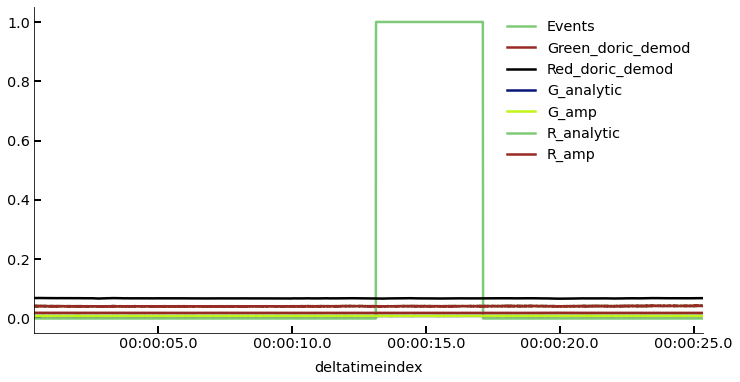

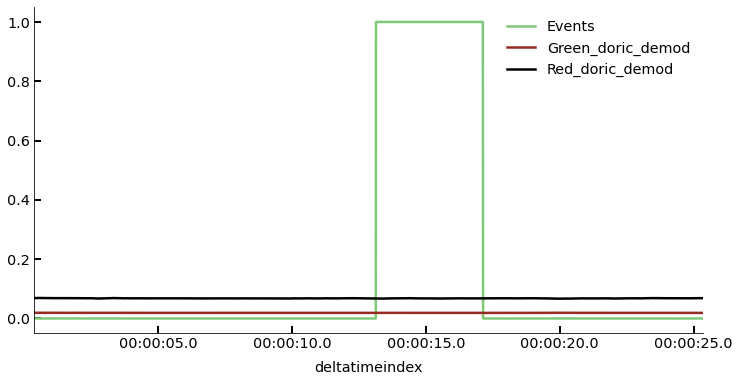

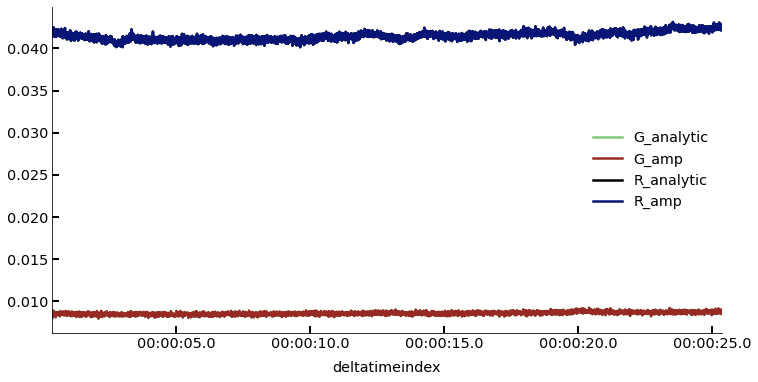

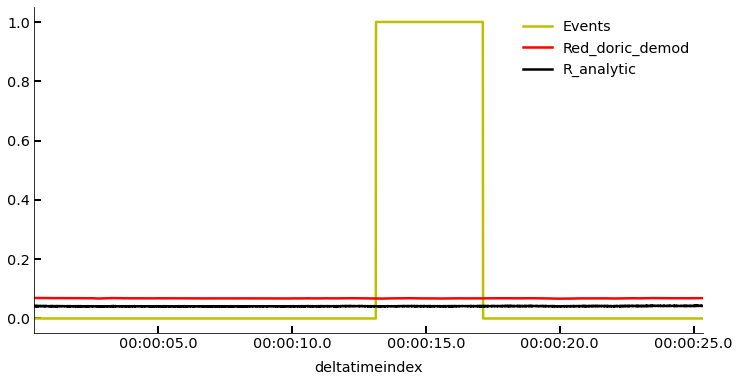

In [ ]:
s=0
e=s+5000

df.iloc[s:e,1:].plot()
plt.show()

df.iloc[s:e,1:4].plot()
plt.show()

df.iloc[s:e,4:8].plot()
plt.show()

df.iloc[s:e,[1,3,6]].plot(color=['y','r','k'])
plt.show()

In [ ]:
#Figure 2?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from scipy.signal import kaiserord, kaiser, firwin, filtfilt, freqz
Doric_csvlist = glob('/content/drive/My Drive/Doric_Data/March7/LTMUUS_*_*_*_*.csv')
print(len(Doric_csvlist))
dDoric = pd.read_csv(Doric_csvlist[2],skiprows=1)#, chunksize=1000000)
#dDoric = next(iter(dDoric_large))

dDoric = dDoric[['Time(s)','AIn-1 - Raw','AIn-2 - Raw','DI/O-2','AIn-1 - Dem (AOut-1)','AIn-2 - Dem (AOut-2)']]
dDoric.columns = ['t','G_Raw','R_Raw','Events','Green_doric_demod','Red_doric_demod']


dDoric['backup_R_Raw'] = dDoric['R_Raw'].copy()


fs = 1/np.mean(np.diff(dDoric.t.values))
print('fs: '+str(fs))
GFP_charfreq = 208.616 # (Hz)
RFP_charfreq = 572.205 # (Hz)
cutofffreq_GFP = GFP_charfreq * 1.3
cutofffreq_RFP = RFP_charfreq * 1.15
#Python code scipy.signal.kaiserord expresses width and ripple in terms of Nyquist frequency (fs/2)
nyquist_freq = fs/2
width_GFP = (cutofffreq_GFP * 0.04)/nyquist_freq #width between high freq end of passband and low freq end of stopband.
width_RFP = (cutofffreq_RFP * 0.02)/nyquist_freq
ripple_db=30
# Compute the order and Kaiser parameter for the FIR filter.
N_GFP, beta_GFP = kaiserord(ripple_db, width_GFP)
N_RFP, beta_RFP = kaiserord(ripple_db, width_RFP)

print(N_GFP, beta_GFP)
print(N_RFP, beta_RFP)

b_k208 = firwin(N_GFP, (cutofffreq_GFP)/nyquist_freq, window=('kaiser', beta_GFP))
b_k572 = firwin(N_RFP, (cutofffreq_RFP)/nyquist_freq, window=('kaiser', beta_RFP))
a_k208_k572 = 1

#kaiser_208 = kaiser(N_GFP, beta_GFP)
#kaiser_572 = kaiser(N_RFP, beta_RFP)



R_Raw = dDoric['R_Raw'].values

# Required input defintions are as follows;
# time:   Time between samples
# band:   The bandwidth around the centerline freqency that you wish to filter
# freq:   The centerline frequency to be filtered
# ripple: The maximum passband ripple that is allowed in db
# order:  The filter order.  For FIR notch filters this is best set to 2 or 3,
#         IIR filters are best suited for high values of order.  This algorithm
#         is hard coded to FIR filters
# filter_type: 'butter', 'bessel', 'cheby1', 'cheby2', 'ellip'
# data:         the data to be filtered
def Implement_Notch_Filter(time, band, freq, ripple, order, filter_type, data):
    from scipy.signal import iirfilter, lfilter
    fs   = 1/time
    nyq  = fs/2.0
    low  = freq - band/2.0
    high = freq + band/2.0
    low  = low/nyq
    high = high/nyq
    b, a = iirfilter(order, [low, high], rp=ripple, btype='bandstop',
                     analog=False, ftype=filter_type)
    filtered_data = lfilter(b, a, data)
    return filtered_data, (b,a) #Return b and a so they can be plotted.

#Transform_R, (b_iir, a_iir) = Implement_Notch_Filter(np.mean(np.diff(t)), band=10, freq=208.616, ripple=0.01, order=10, filter_type='butter', data=R_Raw)

from scipy.signal import iirnotch
from scipy.signal import lfilter
#fs  # Sample frequency (Hz)
f0 = 208.616  # Frequency to be removed from signal (Hz)
Q = 6  # Quality factor
# Design notch filter
b, a = iirnotch(f0, Q, fs)

# Frequency response
freq, h = freqz(b, a, fs=fs)
# Plot
#fig, ax = plt.subplots(2, 1, figsize=(8, 6))
#ax[0].plot(freq, 20*np.log10(abs(h)), color='blue')
#ax[0].set_title("Frequency Response")
#ax[0].set_ylabel("Amplitude (dB)", color='blue')
#ax[0].set_xlim([0, 500])
#ax[0].set_ylim([-25, 10])
#ax[0].grid()
#ax[1].plot(freq, np.unwrap(np.angle(h))*180/np.pi, color='green')
#ax[1].set_ylabel("Angle (degrees)", color='green')
#ax[1].set_xlabel("Frequency (Hz)")
#ax[1].set_xlim([0, 500])
#ax[1].set_yticks([-90, -60, -30, 0, 30, 60, 90])
#ax[1].set_ylim([-90, 90])
#ax[1].grid()
#plt.show()

#fig4, (ax_pre, ax_post) = plt.subplots(2,2, constrained_layout=True)
#ax_pre[0].plot(t[s:e], R_Raw[s:e], color=colorscheme[1])
#ax_pre[1].plot(np.linspace(0,fs/2,int(len(np.fft.fft(R_Raw[s:e]))/2)),abs(np.fft.fft(R_Raw[s:e]))[:int(len(np.fft.fft(R_Raw[s:e]))/2)], color=colorscheme[1])
R_notched = lfilter(b, a, R_Raw)
#ax_post[0].plot(t[s:e], R_notched[s:e], color=colorscheme[1])
#ax_post[1].plot(np.linspace(0,fs/2,int(len(np.fft.fft(R_notched))/2)),abs(np.fft.fft(R_notched))[:int(len(np.fft.fft(R_notched))/2)], color=colorscheme[1])
#plt.show()
#print(R_notched)
#print(len(R_Raw[s:e]))
#print(len(np.fft.fft(R_Raw[s:e])))
#print(len(np.linspace(0,fs,int(len(np.fft.fft(R_Raw[s:e]))))))
#ax_post[0].plot(t[s:e], R_notched, color=colorscheme[1])
#ax_pre[1].set_xlim(150,1000)
#ax_pre[1].hlines(0, *ax_pre[1].get_xlim(), linestyle='dotted', lw=1.5)
#ax_post[1].set_xlim(150,1000)
#ax_post[1].hlines(0, *ax_post[1].get_xlim(), linestyle='dotted', lw=1.5)


dDoric['R_Raw'] = R_notched



dDoric['G_Sin208'] = (dDoric['G_Raw']-dDoric['G_Raw'].rolling(N_GFP).mean()) * np.sin(2*np.pi*GFP_charfreq*dDoric['t'])
dDoric['G_Cos208'] = (dDoric['G_Raw']-dDoric['G_Raw'].rolling(N_GFP).mean()) * np.cos(2*np.pi*GFP_charfreq*dDoric['t'])
dDoric['G_Sin572'] = (dDoric['G_Raw']-dDoric['G_Raw'].rolling(N_RFP).mean()) * np.sin(2*np.pi*RFP_charfreq*dDoric['t'])
dDoric['G_Cos572'] = (dDoric['G_Raw']-dDoric['G_Raw'].rolling(N_RFP).mean()) * np.cos(2*np.pi*RFP_charfreq*dDoric['t'])
dDoric['R_Sin208'] = (dDoric['R_Raw']-dDoric['R_Raw'].rolling(N_GFP).mean()) * np.sin(2*np.pi*GFP_charfreq*dDoric['t'])
dDoric['R_Cos208'] = (dDoric['R_Raw']-dDoric['R_Raw'].rolling(N_GFP).mean()) * np.cos(2*np.pi*GFP_charfreq*dDoric['t'])
dDoric['R_Sin572'] = (dDoric['R_Raw']-dDoric['R_Raw'].rolling(N_RFP).mean()) * np.sin(2*np.pi*RFP_charfreq*dDoric['t'])
dDoric['R_Cos572'] = (dDoric['R_Raw']-dDoric['R_Raw'].rolling(N_RFP).mean()) * np.cos(2*np.pi*RFP_charfreq*dDoric['t'])
dDoric.head()

#kaiskais_208 = kaiser_208 #* np.flip(kaiser_208)
#kaiskais_572 = kaiser_572 #* np.flip(kaiser_572)
#dLPF_208 = pd.DataFrame(np.zeros_like(dDoric.iloc[:,:4].values))
#dLPF_572 = pd.DataFrame(np.zeros_like(dDoric.iloc[:,:4].values))
print(len(dDoric['G_Sin208']))
print(len(dDoric['G_Sin572']))

LPF_G_Sin208 = filtfilt(b_k208, a_k208_k572, np.array(dDoric['G_Sin208']))
LPF_G_Cos208 = filtfilt(b_k208, a_k208_k572, np.array(dDoric['G_Sin208'])) 
LPF_R_Sin208 = filtfilt(b_k208, a_k208_k572, np.array(dDoric['R_Sin208'])) 
LPF_R_Cos208 = filtfilt(b_k208, a_k208_k572, np.array(dDoric['R_Sin208'])) 

LPF_G_Sin572 = filtfilt(b_k208, a_k208_k572, np.array(dDoric['G_Sin572'])) 
LPF_G_Cos572 = filtfilt(b_k208, a_k208_k572, np.array(dDoric['G_Sin572'])) 
LPF_R_Sin572 = filtfilt(b_k208, a_k208_k572, np.array(dDoric['R_Sin572'])) 
LPF_R_Cos572 = filtfilt(b_k208, a_k208_k572, np.array(dDoric['R_Sin572'])) 

#LPF_G_Sin208 = np.convolve(kaiskais_208/np.sum(kaiskais_208), np.array(dDoric['G_Sin208']), 'same')
#LPF_G_Cos208 = np.convolve(kaiskais_208/np.sum(kaiskais_208), np.array(dDoric['G_Cos208']), 'same')
#LPF_R_Sin208 = np.convolve(kaiskais_208/np.sum(kaiskais_208), np.array(dDoric['R_Sin208']), 'same')
#LPF_R_Cos208 = np.convolve(kaiskais_208/np.sum(kaiskais_208), np.array(dDoric['R_Cos208']), 'same')

#LPF_G_Sin572 = np.convolve(kaiskais_572/np.sum(kaiskais_572), np.array(dDoric['G_Sin572']), 'same')
#LPF_G_Cos572 = np.convolve(kaiskais_572/np.sum(kaiskais_572), np.array(dDoric['G_Cos572']), 'same')
#LPF_R_Sin572 = np.convolve(kaiskais_572/np.sum(kaiskais_572), np.array(dDoric['R_Sin572']), 'same')
#LPF_R_Cos572 = np.convolve(kaiskais_572/np.sum(kaiskais_572), np.array(dDoric['R_Cos572']), 'same')
print(len(LPF_G_Sin208))
print(len(LPF_G_Sin572))
for printtarget in [LPF_G_Sin208, LPF_G_Cos208, LPF_R_Sin208, LPF_R_Cos208, LPF_G_Sin572, LPF_G_Cos572, LPF_R_Sin572, LPF_R_Cos572]:
  print(printtarget[:4])

G208_polar = np.array([np.linalg.norm([LPF_G_Sin208, LPF_G_Cos208], axis=0), np.arctan2(LPF_G_Cos208,LPF_G_Sin208)], dtype=complex)
G572_polar = np.array([np.linalg.norm([LPF_G_Sin572, LPF_G_Cos572], axis=0), np.arctan2(LPF_G_Cos572,LPF_G_Sin572)], dtype=complex)
R208_polar = np.array([np.linalg.norm([LPF_R_Sin208, LPF_R_Cos208], axis=0), np.arctan2(LPF_R_Cos208,LPF_R_Sin208)], dtype=complex)
R572_polar = np.array([np.linalg.norm([LPF_R_Sin572, LPF_R_Cos572], axis=0), np.arctan2(LPF_R_Cos572,LPF_R_Sin572)], dtype=complex)

print(G208_polar)

t = dDoric.t.values
Events = dDoric.Events.values
G_Raw = dDoric.G_Raw.values
R_Raw = dDoric.R_Raw.values
#del dDoric



4
fs: 12190.376536241543
1727 2.1166248611409806
1424 2.1166248611409806
19953704
19953704
19953704
19953704
[nan nan nan nan]
[nan nan nan nan]
[nan nan nan nan]
[nan nan nan nan]
[nan nan nan nan]
[nan nan nan nan]
[nan nan nan nan]
[nan nan nan nan]
[[   nan+0.j    nan+0.j    nan+0.j ... 0.1049+0.j 0.1164+0.j 0.128 +0.j]
 [   nan+0.j    nan+0.j    nan+0.j ... 0.7854+0.j 0.7854+0.j 0.7854+0.j]]


In [ ]:
G_analytic = np.linalg.norm([LPF_G_Sin208, LPF_G_Cos208], axis=0) * abs(np.e**(1j*np.arctan2(LPF_G_Cos208,LPF_G_Sin208)))
G_amp = np.linalg.norm([LPF_G_Sin208, LPF_G_Cos208], axis=0)

R_analytic = np.linalg.norm([LPF_R_Sin572, LPF_R_Cos572], axis=0) * abs(np.e**(1j*np.arctan2(LPF_R_Cos572, LPF_R_Sin572)))
R_amp = np.linalg.norm([LPF_R_Sin572, LPF_R_Cos572], axis=0)



In [ ]:
df = dDoric[['t','Events','Green_doric_demod','Red_doric_demod']].copy()
print(df.head())
del dDoric
print(df.info())
df['G_analytic'] = G_analytic
df['G_amp'] = G_amp
df['R_analytic'] = R_analytic
df['R_amp'] = R_amp
del R_Raw
del G_analytic
del G_amp
del R_analytic
del R_amp
df.head()

          t  Events  Green_doric_demod  Red_doric_demod
0  0.000000       0                NaN              NaN
1  0.000082       0                NaN              NaN
2  0.000165       0                NaN              NaN
3  0.000247       0                NaN              NaN
4  0.000328       0                NaN              NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19953704 entries, 0 to 19953703
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   t                  float64
 1   Events             int64  
 2   Green_doric_demod  float64
 3   Red_doric_demod    float64
dtypes: float64(3), int64(1)
memory usage: 608.9 MB
None


,t,Events,Green_doric_demod,Red_doric_demod,G_analytic,G_amp,R_analytic,R_amp
0,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000082,0,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000165,0,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000247,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000328,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19953704 entries, 0 to 19953703
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   t                  float64
 1   Events             int64  
 2   Green_doric_demod  float64
 3   Red_doric_demod    float64
 4   G_analytic         float64
 5   G_amp              float64
 6   R_analytic         float64
 7   R_amp              float64
dtypes: float64(7), int64(1)
memory usage: 1.2 GB


In [ ]:
df['deltatimeindex'] = pd.to_timedelta(t, unit='s', errors='ignore')
df.index=df['deltatimeindex']
print(df.info())

<class 'pandas.core.frame.DataFrame'>
TimedeltaIndex: 19953704 entries, 00:00:00 to 00:27:16.840580
Data columns (total 9 columns):
 #   Column             Dtype          
---  ------             -----          
 0   t                  float64        
 1   Events             int64          
 2   Green_doric_demod  float64        
 3   Red_doric_demod    float64        
 4   G_analytic         float64        
 5   G_amp              float64        
 6   R_analytic         float64        
 7   R_amp              float64        
 8   deltatimeindex     timedelta64[ns]
dtypes: float64(7), int64(1), timedelta64[ns](1)
memory usage: 1.5 GB
None


In [ ]:
df = df.resample('5ms').mean()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
TimedeltaIndex: 327369 entries, 00:00:00 to 00:27:16.840000
Freq: 5L
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   t                  327369 non-null  float64
 1   Events             327369 non-null  float64
 2   Green_doric_demod  327337 non-null  float64
 3   Red_doric_demod    327336 non-null  float64
 4   G_analytic         327313 non-null  float64
 5   G_amp              327313 non-null  float64
 6   R_analytic         327318 non-null  float64
 7   R_amp              327318 non-null  float64
dtypes: float64(8)
memory usage: 22.5 MB
None


In [ ]:
file_save_csv_path = '/content/drive/My Drive/Doric_Data/resampled5ms_'+Doric_csvlist[0].split('/')[-1]
print(file_save_csv_path)
df.to_csv(file_save_csv_path)

/content/drive/My Drive/Doric_Data/resampled5ms_LTMUUS_walter_285299_mar7_2020.csv


In [ ]:
Doric_csvlist

['/content/drive/My Drive/Doric_Data/March7/LTMUUS_walter_285299_mar7_2020.csv',
 '/content/drive/My Drive/Doric_Data/March7/LTMUUS_walter_285305_mar7_2020.csv',
 '/content/drive/My Drive/Doric_Data/March7/LTMUUS_walter_285306_mar7_2020.csv',
 '/content/drive/My Drive/Doric_Data/March7/LTMUUS_walter_285300_mar7_2020.csv']

In [ ]:
ERise_list = df.loc[df.Events.diff()>0]

In [ ]:
ERise_list = ERise_list.loc[ERise_list.Events==1]

In [ ]:
ERise_list

,t,Events,Green_doric_demod,Red_doric_demod,G_analytic,G_amp,R_analytic,R_amp
deltatimeindex,,,,,,,,
00:00:10.280000,10.282499,1.0,0.134329,0.237458,0.048625,0.048625,0.159983,0.159983
00:05:10.630000,310.632517,1.0,0.124756,0.215332,0.074887,0.074887,0.137207,0.137207
00:09:00.825000,540.827503,1.0,0.124635,0.214508,0.087747,0.087747,0.068526,0.068526
00:12:01.020000,721.022461,1.0,0.145127,0.220235,0.101402,0.101402,0.036341,0.036341
00:15:41.200000,941.202529,1.0,0.152921,0.222616,0.095071,0.095071,0.064938,0.064938
00:19:11.530000,1151.532485,1.0,0.123289,0.214397,0.055765,0.055765,0.130011,0.130011
00:22:11.730000,1331.732477,1.0,0.124681,0.213938,0.041939,0.041939,0.148473,0.148473
00:24:42.895000,1482.897473,1.0,0.123308,0.214145,0.021431,0.021431,0.150951,0.150951


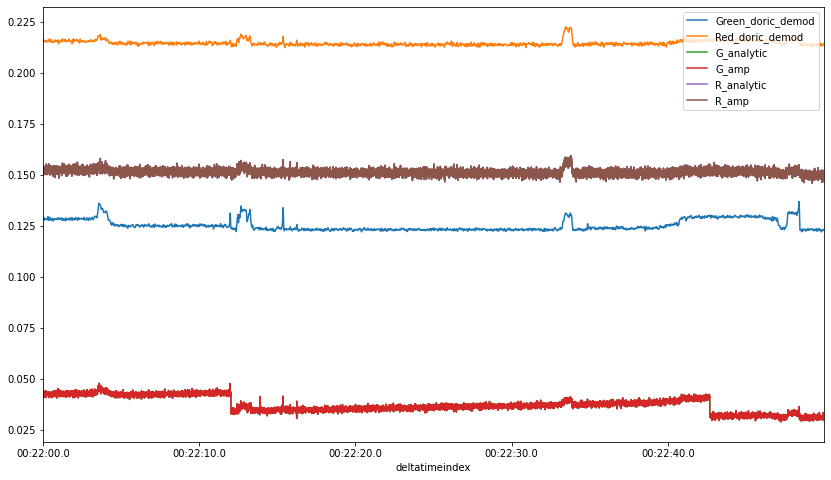

In [ ]:
df.loc[1320<df.t].loc[df.t<1370][['Green_doric_demod','Red_doric_demod','G_analytic','G_amp','R_analytic','R_amp']].plot(figsize=[14,8])

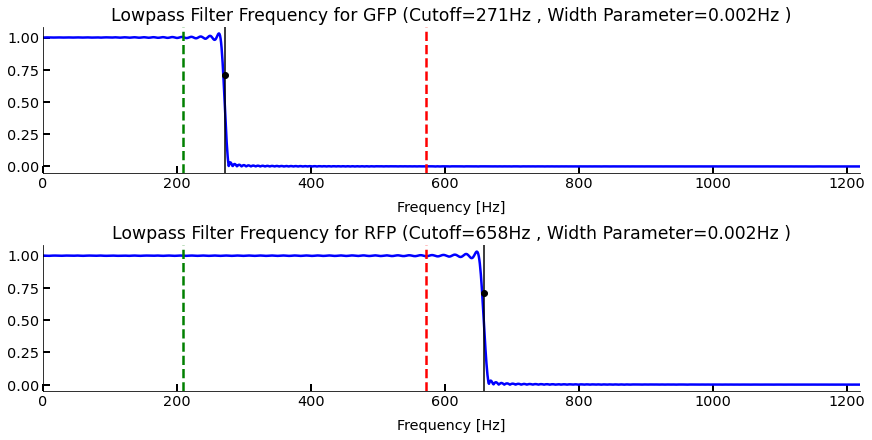

In [ ]:
fig3, (ax0, ax1) = plt.subplots(2,1,constrained_layout=True)

w, h = freqz(b_k208, a_k208_k572, worN=8000)
ax0.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
ax0.plot(cutofffreq_GFP, 0.5*np.sqrt(2), 'ko')
ax0.axvline(cutofffreq_GFP, color='k', lw=1.5)
ax0.axvline(208.616, color='g', linestyle='--')
ax0.axvline(572.205, color='r', linestyle='--')

ax0.set_title('Lowpass Filter Frequency for GFP (Cutoff={:.0f}Hz'.format(cutofffreq_GFP)+' , Width Parameter={:.3f}Hz'.format(width_GFP)+' )')
ax0.set_xlabel('Frequency [Hz]')
plt.grid()

ax0.set_xlim(0, 0.1*fs)


w_RFP, h_RFP = freqz(b_k572, a_k208_k572, worN=8000)
ax1.plot(0.5*fs*w_RFP/np.pi, np.abs(h_RFP), 'b')
ax1.plot(cutofffreq_RFP, 0.5*np.sqrt(2), 'ko')
ax1.axvline(cutofffreq_RFP, color='k', lw=1.5)
ax1.axvline(208.616, color='g', linestyle='--')
ax1.axvline(572.205, color='r', linestyle='--')
ax1.set_title('Lowpass Filter Frequency for RFP (Cutoff={:.0f}Hz'.format(cutofffreq_RFP)+' , Width Parameter={:.3f}Hz'.format(width_GFP)+' )')
ax1.set_xlabel('Frequency [Hz]')
plt.grid()


ax1.set_xlim(0, 0.1*fs)
plt.show()

In [ ]:
####################################### CHARACTERISTIC FREQUENCIES #########################################################
s=5000
e=18000000
fig, ((ax0,sax0), (ax1, sax1), (ax2, sax2), (ax3, sax3), (ax5,sax5),(ax4, sax4)) = plt.subplots(6,2,figsize=[8,14])

ax0.plot(t[s:e], G_Raw[s:e]-G_Raw[s:e].mean(), label='Raw GFP Signal')
ax0.plot(t[s:e],  np.sin(2*np.pi*GFP_charfreq*t[s:e]) ,  label='Ref Signal', color='k', linestyle='--', lw=1.5, alpha=0.3)
ax0.plot(t[s:e],  np.cos(2*np.pi*GFP_charfreq*t[s:e]) ,  label='Shift Ref Signal', color='b', linestyle='--', lw=1.5, alpha=0.3)
ax1.plot(t[s:e], dDoric.loc[s:e-1,'G_Sin208'], label='In-phase', lw=1.2)
ax1.plot(t[s:e], LPF_G_Sin208[s:e], label='In-phase (filtered)', color=colorscheme[2], lw=1.2)
ax2.plot(t[s:e], dDoric.loc[s:e-1,'G_Cos208'], label='Quadrature', lw=1.2)
ax2.plot(t[s:e], LPF_G_Cos208[s:e], label='Quadrature (filtered)', color=colorscheme[3], lw=1.2)
ax3.plot(t[s:e], np.linalg.norm([LPF_G_Sin208[s:e], LPF_G_Cos208[s:e]], axis=0), label='Amplitude', lw=1.2)
ax5.plot(t[s:e], np.arctan2(LPF_G_Cos208[s:e],LPF_G_Sin208[s:e]),color=colorscheme[4], label='Phase', lw=2)
##ax0.set_xlim(0,5)
ax1.set_xlim(*ax0.get_xlim())
ax2.set_xlim(*ax0.get_xlim())
ax3.set_xlim(*ax0.get_xlim())
ax4.set_xlim(*ax0.get_xlim())
#ax6.plot(t[s:e], dDoric.Green_doric_demod.values[s:e], label='Doric\nbuilt-in\ndemodulation', lw=1.2)
ax4.plot(t[s:e], np.linalg.norm([LPF_G_Sin208[s:e], LPF_G_Cos208[s:e]], axis=0) * abs(np.e**(1j*np.arctan2(LPF_G_Cos208[s:e],LPF_G_Sin208[s:e]))), color='k', lw=1.2, label='Analytic signal') #Analytic signal



#for axi in ax:
#  axi.legend(loc='upper right')
#plt.show()

#fig, ax = plt.subplots(4,1,figsize=[8,8],sharex=True, constrained_layout=True)
sax0.plot(t[s:e], R_Raw[s:e]-R_Raw[s:e].mean(), label='Raw GFP Signal', color=colorscheme[1])
sax0.plot(t[s:e], np.sin(2*np.pi*RFP_charfreq*t[s:e]) ,  label='Ref Signal', color='k', linestyle='--', lw=1.2, alpha=0.6)
sax0.plot(t[s:e],  np.cos(2*np.pi*RFP_charfreq*t[s:e]) ,  label='Shift Ref Signal', color='b', linestyle='--', lw=1.2, alpha=0.6)
sax1.plot(t[s:e], dDoric.loc[s:e-1,'R_Sin572'], label='In-phase', color=colorscheme[1], lw=1.2)
sax1.plot(t[s:e], LPF_R_Sin572[s:e], label='In-phase (filtered)', color=colorscheme[2], lw=1.2)
sax2.plot(t[s:e], dDoric.loc[s:e-1,'R_Cos572'], label='Quadrature', color=colorscheme[1], lw=1.2)
sax2.plot(t[s:e], LPF_R_Cos572[s:e], label='Quadrature (filtered)', color=colorscheme[3], lw=1.2)
sax3.plot(t[s:e], np.linalg.norm([LPF_R_Sin572[s:e], LPF_R_Cos572[s:e]], axis=0), label='Amplitude', color=colorscheme[1], lw=1.2)
sax5.plot(t[s:e], np.arctan2(LPF_R_Cos572[s:e],LPF_R_Sin572[s:e]),color=colorscheme[4], label='Phase', lw=2)
#sax0.set_xlim(0,5)
sax1.set_xlim(*sax0.get_xlim())
sax2.set_xlim(*sax0.get_xlim())
sax3.set_xlim(*sax0.get_xlim())
sax4.set_xlim(*sax0.get_xlim())
#sax6.plot(t[s:e], dDoric.Green_doric_demod.values[s:e], color=colorscheme[1] , label='Doric\nbuilt-in\ndemodulation', lw=1.2)
sax4.plot(t[s:e], np.linalg.norm([LPF_R_Sin572[s:e], LPF_R_Cos572[s:e]], axis=0) * abs(np.e**(1j*np.arctan2(LPF_R_Cos572[s:e],LPF_R_Sin572[s:e]))), color='k', lw=1.2, label='Analytic signal') #Analytic signal



for axi in (sax0,sax1,sax2,sax3,sax4,sax5,sax6):
  axi.legend(loc='center right', bbox_to_anchor=(2.1,0.3), borderaxespad=0)

for axi in (ax0,ax1,ax2,ax3,ax4,ax5,sax0,sax1,sax2,sax3,sax4,sax5):
  if axi != ax5 and axi != sax5:
    y_fmt = '{x:,.2f}V'
    y_tick = mtick.StrMethodFormatter(y_fmt)
    if axi in [ax3,ax4]:
      axi.set_ylim(0.08,0.18)
    elif axi in [sax3,sax4]:
      axi.set_ylim(0.27,0.305)
    #if axi in [ax6,sax6]:
    #  axi.set_ylim(0.145, 0.155)
  else:
    y_fmt = 'a.u. {x:,.1f}'
    y_tick = mtick.StrMethodFormatter(y_fmt)
  axi.yaxis.set_major_formatter(y_tick) 
  #axi.yaxis.set_major_formatter(y_tick) 

  x_fmt = r'{x:,.3f}s'
  x_tick = mtick.StrMethodFormatter(x_fmt)
  axi.xaxis.set_major_formatter(x_tick) 
  #axi.xaxis.set_major_formatter(x_tick)

  axi.yaxis.set_major_locator(plt.MaxNLocator(1))
  axi.xaxis.set_major_locator(plt.MaxNLocator(1))
  
plt.show()

# In this context, steady phase means there is little to no drift of the source signal.

(4.5, 4.7)

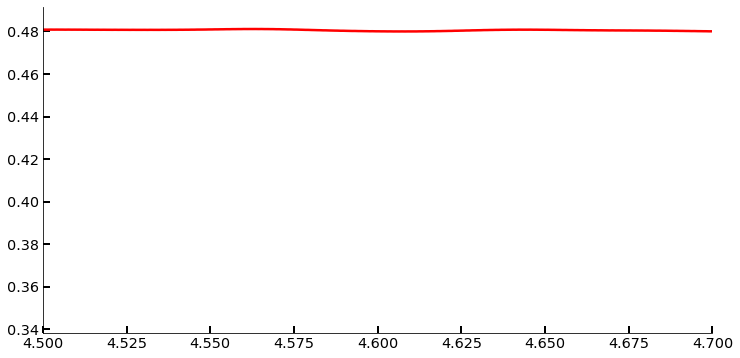

In [ ]:
plt.plot(t,dDoric['Red_doric_demod'],color='r')
plt.xlim(4.5,4.7)

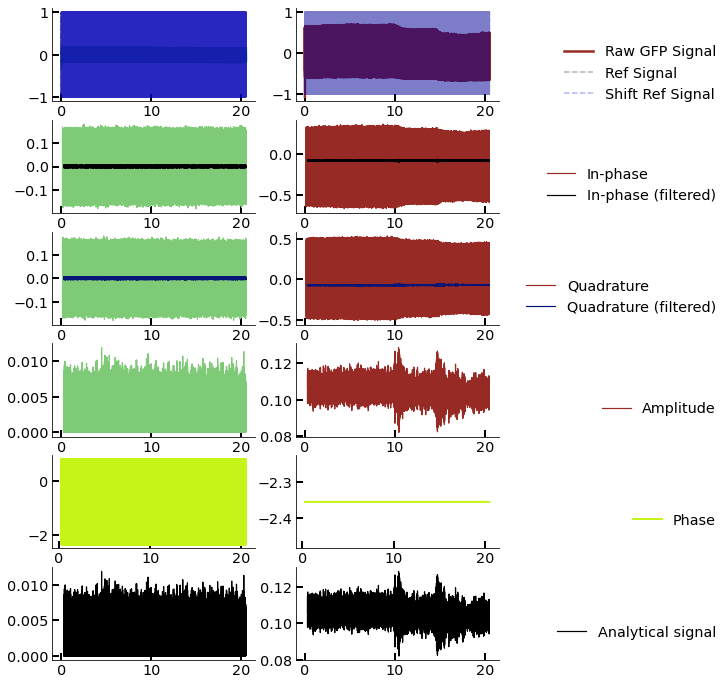

In [ ]:
#minor frequencies
s=0
e=250000
fig, ((ax0,sax0), (ax1, sax1), (ax2, sax2), (ax3, sax3), (ax5,sax5),(ax4, sax4))= plt.subplots(6,2,figsize=[8,12])
ax0.plot(t[s:e], G_Raw[s:e]-G_Raw[s:e].mean(),           label='Raw GFP Signal') #Plot raw signal
ax0.plot(t[s:e],  np.sin(2*np.pi*RFP_charfreq*t[s:e]) ,  label='RefSignal572Hz', color='k', linestyle='--',  alpha=0.6, lw=1.5) # Plot reference signal
ax0.plot(t[s:e],  np.cos(2*np.pi*RFP_charfreq*t[s:e]) ,  label='ShiftRefSignal', color='b', linestyle='--',  alpha=0.6, lw=1.5) #Plot Quadrature reference wave
ax1.plot(t[s:e], dDoric.loc[s:e-1,'G_Sin572'],           label='In-phase', lw=1.2) # Plot ref * raw # Frequencies have approximately doubled
ax1.plot(t[s:e], LPF_G_Sin572[s:e],                      label='In-phase (filtered)', color=colorscheme[2], lw=1.2) # Plot filtered ref * raw
ax2.plot(t[s:e], dDoric.loc[s:e-1,'G_Cos572'],           label='Quadrature', lw=1.2) # Plot quadrature * raw
ax2.plot(t[s:e], LPF_G_Cos572[s:e],                      label='Quadrature (filtered)', color=colorscheme[3], lw=1.2)
ax3.plot(t[s:e], np.linalg.norm([LPF_G_Sin572[s:e], LPF_G_Cos572[s:e]], axis=0),        label='Amplitude', lw=1.2)
ax5.plot(t[s:e], np.arctan2(LPF_G_Cos572[s:e],LPF_G_Sin572[s:e]),color=colorscheme[4],  label='Phase', lw=2)

#ax0.set_xlim(0,5)
ax1.set_xlim(*ax0.get_xlim())
ax2.set_xlim(*ax0.get_xlim())
ax3.set_xlim(*ax0.get_xlim())
ax4.set_xlim(*ax0.get_xlim())
#ax4.plot(t[s:e], dDoric.Green_doric_demod.values[s:e], label='Doric demodulated')
ax4.plot(t[s:e], np.linalg.norm([LPF_G_Sin572[s:e], LPF_G_Cos572[s:e]], axis=0) * abs(np.e**(1j*np.arctan2(LPF_G_Cos572[s:e],LPF_G_Sin572[s:e]))), color='k', lw=1.2, label='Analytical signal') #Analytical signal
#for axi in ax:
#  axi.legend(loc='upper right')
#plt.show()

#fig, ax = plt.subplots(4,1,figsize=[8,8],sharex=True, constrained_layout=True)
sax0.plot(t[s:e], R_Raw[s:e]-R_Raw[s:e].mean(), label='Raw GFP Signal', color=colorscheme[1])
sax0.plot(t[s:e], np.sin(2*np.pi*GFP_charfreq*t[s:e]) ,  label='Ref Signal', color='k', linestyle='--', lw=1.5, alpha=0.3)
sax0.plot(t[s:e],  np.cos(2*np.pi*GFP_charfreq*t[s:e]) ,  label='Shift Ref Signal', color='b', linestyle='--', lw=1.5, alpha=0.3)
sax1.plot(t[s:e], dDoric.loc[s:e-1,'R_Sin208'], label='In-phase', color=colorscheme[1], lw=1.2)
sax1.plot(t[s:e], LPF_R_Sin208[s:e], label='In-phase (filtered)', color=colorscheme[2], lw=1.2)
sax2.plot(t[s:e], dDoric.loc[s:e-1,'R_Cos208'], label='Quadrature', color=colorscheme[1], lw=1.2)
sax2.plot(t[s:e], LPF_R_Cos208[s:e], label='Quadrature (filtered)', color=colorscheme[3], lw=1.2)
sax3.plot(t[s:e], np.linalg.norm([LPF_R_Sin208[s:e], LPF_R_Cos208[s:e]], axis=0), label='Amplitude', color=colorscheme[1], lw=1.2)
sax5.plot(t[s:e], np.arctan2(LPF_R_Cos208[s:e],LPF_R_Sin208[s:e]),color=colorscheme[4], label='Phase', lw=2)
#sax0.set_xlim(0,5)
sax1.set_xlim(*sax0.get_xlim())
sax2.set_xlim(*sax0.get_xlim())
sax3.set_xlim(*sax0.get_xlim())
sax4.set_xlim(*sax0.get_xlim())
#sax4.plot(t[s:e], dDoric.Green_doric_demod.values[s:e], color=colorscheme[1] , label='Doric demodulated')
sax4.plot(t[s:e], np.linalg.norm([LPF_R_Sin208[s:e], LPF_R_Cos208[s:e]], axis=0) * abs(np.e**(1j*np.arctan2(LPF_R_Cos208[s:e],LPF_R_Sin208[s:e]))), color='k', lw=1.2, label='Analytical signal') #Analytical signal
for axi in (sax0,sax1,sax2,sax3,sax4,sax5):
  axi.legend(loc='center right', bbox_to_anchor=(2.1,0.3), borderaxespad=0)

plt.show()

# In this context, steady phase means there is little to no drift of the source signal.

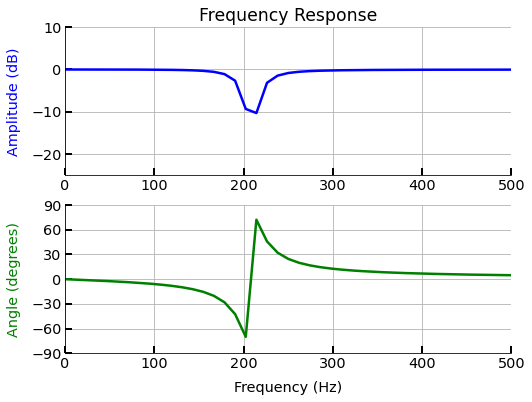

[1.6871 1.616  1.5259 1.3898 1.2417 1.0969 0.9752 0.8257 0.7185 0.6573
 0.637  0.6669 0.7335 0.8279 0.955  1.087  1.2437 1.346  1.4539 1.5249
 1.5368 1.5512 1.5094 1.4126 1.3051 1.1783 1.041  0.8943 0.7824 0.7021
 0.6259 0.6143 0.6357 0.7007 0.8165 0.9435 1.0906 1.2331 1.382  1.4832
 1.5725 1.6327 1.6472 1.6328 1.5683 1.4703 1.3336 1.1972 1.0723 0.9506
 0.8548 0.7787 0.7275 0.743  0.7909 0.8637 0.9917 1.1258 1.2499 1.3722
 1.4876 1.6004 1.6337 1.6426 1.6218 1.5492 1.4502 1.3191 1.1801 1.0419
 0.9131 0.7762 0.6923 0.6551 0.6403 0.6718 0.7416 0.8494 0.9672 1.1088
 1.2668 1.3963 1.4961 1.5584 1.5634 1.5876 1.5277 1.4569 1.3455 1.2078
 1.0796 0.9255 0.8155 0.7197 0.6631 0.6567 0.6924 0.7404 0.8661 0.9877]
100
100
100


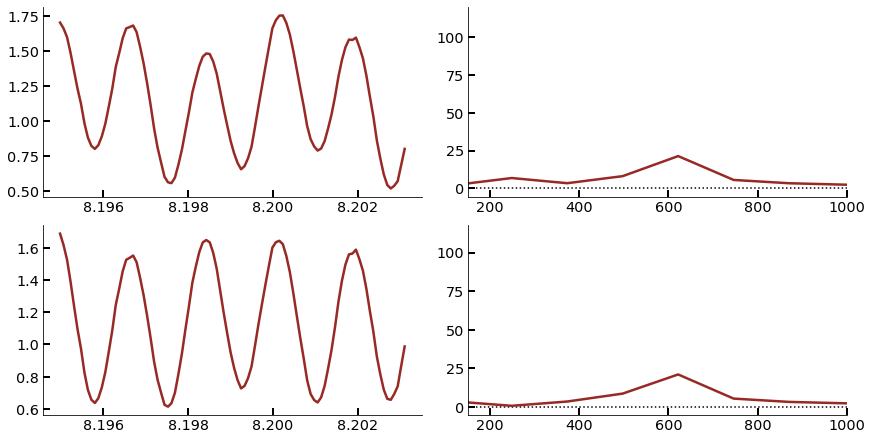

In [ ]:
# Required input defintions are as follows;
# time:   Time between samples
# band:   The bandwidth around the centerline freqency that you wish to filter
# freq:   The centerline frequency to be filtered
# ripple: The maximum passband ripple that is allowed in db
# order:  The filter order.  For FIR notch filters this is best set to 2 or 3,
#         IIR filters are best suited for high values of order.  This algorithm
#         is hard coded to FIR filters
# filter_type: 'butter', 'bessel', 'cheby1', 'cheby2', 'ellip'
# data:         the data to be filtered
def Implement_Notch_Filter(time, band, freq, ripple, order, filter_type, data):
    from scipy.signal import iirfilter, lfilter
    fs   = 1/time
    nyq  = fs/2.0
    low  = freq - band/2.0
    high = freq + band/2.0
    low  = low/nyq
    high = high/nyq
    b, a = iirfilter(order, [low, high], rp=ripple, btype='bandstop',
                     analog=False, ftype=filter_type)
    filtered_data = lfilter(b, a, data)
    return filtered_data, (b,a) #Return b and a so they can be plotted.

#Transform_R, (b_iir, a_iir) = Implement_Notch_Filter(np.mean(np.diff(t)), band=10, freq=208.616, ripple=0.01, order=10, filter_type='butter', data=R_Raw)

from scipy.signal import iirnotch
from scipy.signal import lfilter
#fs  # Sample frequency (Hz)
f0 = 208.616  # Frequency to be removed from signal (Hz)
Q = 6  # Quality factor
# Design notch filter
b, a = iirnotch(f0, Q, fs)

# Frequency response
freq, h = freqz(b, a, fs=fs)
# Plot
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(freq, 20*np.log10(abs(h)), color='blue')
ax[0].set_title("Frequency Response")
ax[0].set_ylabel("Amplitude (dB)", color='blue')
ax[0].set_xlim([0, 500])
ax[0].set_ylim([-25, 10])
ax[0].grid()
ax[1].plot(freq, np.unwrap(np.angle(h))*180/np.pi, color='green')
ax[1].set_ylabel("Angle (degrees)", color='green')
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_xlim([0, 500])
ax[1].set_yticks([-90, -60, -30, 0, 30, 60, 90])
#ax[1].set_ylim([-90, 90])
ax[1].grid()
plt.show()

fig4, (ax_pre, ax_post) = plt.subplots(2,2, constrained_layout=True)
ax_pre[0].plot(t[s:e], R_Raw[s:e], color=colorscheme[1])
ax_pre[1].plot(np.linspace(0,fs/2,int(len(np.fft.fft(R_Raw[s:e]))/2)),abs(np.fft.fft(R_Raw[s:e]))[:int(len(np.fft.fft(R_Raw[s:e]))/2)], color=colorscheme[1])
R_notched = lfilter(b, a, R_Raw[s:e])
#ax_post[0].plot(t[s:e], R_notched[s:e], color=colorscheme[1])
ax_post[1].plot(np.linspace(0,fs/2,int(len(np.fft.fft(R_notched))/2)),abs(np.fft.fft(R_notched))[:int(len(np.fft.fft(R_notched))/2)], color=colorscheme[1])
#plt.show()
print(R_notched)
print(len(R_Raw[s:e]))
print(len(np.fft.fft(R_Raw[s:e])))
print(len(np.linspace(0,fs,int(len(np.fft.fft(R_Raw[s:e]))))))
ax_post[0].plot(t[s:e], R_notched, color=colorscheme[1])
ax_pre[1].set_xlim(150,1000)
ax_pre[1].hlines(0, *ax_pre[1].get_xlim(), linestyle='dotted', lw=1.5)
ax_post[1].set_xlim(150,1000)
ax_post[1].hlines(0, *ax_post[1].get_xlim(), linestyle='dotted', lw=1.5)

In [ ]:
fs

12190.387579125572

No handles with labels found to put in legend.
No handles with labels found to put in legend.


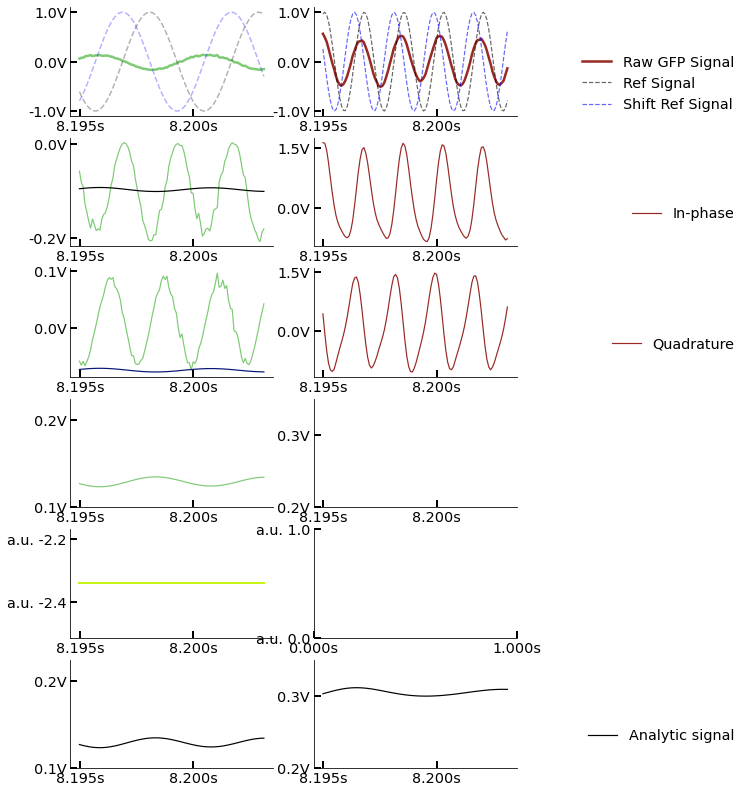

In [ ]:
####################################### CHARACTERISTIC FREQUENCIES ##### with R_notched ####################################################
s=99900
e=100000
fig, ((ax0,sax0), (ax1, sax1), (ax2, sax2), (ax3, sax3), (ax5,sax5),(ax4, sax4)) = plt.subplots(6,2,figsize=[8,14])

ax0.plot(t[s:e], G_Raw[s:e]-G_Raw[s:e].mean(), label='Raw GFP Signal')
ax0.plot(t[s:e],  np.sin(2*np.pi*GFP_charfreq*t[s:e]) ,  label='Ref Signal', color='k', linestyle='--', lw=1.5, alpha=0.3)
ax0.plot(t[s:e],  np.cos(2*np.pi*GFP_charfreq*t[s:e]) ,  label='Shift Ref Signal', color='b', linestyle='--', lw=1.5, alpha=0.3)
ax1.plot(t[s:e], dDoric.loc[s:e-1,'G_Sin208'], label='In-phase', lw=1.2)
ax1.plot(t[s:e], LPF_G_Sin208[s:e], label='In-phase (filtered)', color=colorscheme[2], lw=1.2)
ax2.plot(t[s:e], dDoric.loc[s:e-1,'G_Cos208'], label='Quadrature', lw=1.2)
ax2.plot(t[s:e], LPF_G_Cos208[s:e], label='Quadrature (filtered)', color=colorscheme[3], lw=1.2)
ax3.plot(t[s:e], np.linalg.norm([LPF_G_Sin208[s:e], LPF_G_Cos208[s:e]], axis=0), label='Amplitude', lw=1.2)
ax5.plot(t[s:e], np.arctan2(LPF_G_Cos208[s:e],LPF_G_Sin208[s:e]),color=colorscheme[4], label='Phase', lw=2)
##ax0.set_xlim(0,5)
ax1.set_xlim(*ax0.get_xlim())
ax2.set_xlim(*ax0.get_xlim())
ax3.set_xlim(*ax0.get_xlim())
ax4.set_xlim(*ax0.get_xlim())
#ax6.plot(t[s:e], dDoric.Green_doric_demod.values[s:e], label='Doric\nbuilt-in\ndemodulation', lw=1.2)
ax4.plot(t[s:e], np.linalg.norm([LPF_G_Sin208[s:e], LPF_G_Cos208[s:e]], axis=0) * abs(np.e**(1j*np.arctan2(LPF_G_Cos208[s:e],LPF_G_Sin208[s:e]))), color='k', lw=1.2, label='Analytic signal') #Analytic signal
#for axi in ax:
#  axi.legend(loc='upper right')
#plt.show()

#fig, ax = plt.subplots(4,1,figsize=[8,8],sharex=True, constrained_layout=True)
sax0.plot(t[s:e], R_notched-R_notched.mean(), label='Raw GFP Signal', color=colorscheme[1])
sax0.plot(t[s:e], np.sin(2*np.pi*RFP_charfreq*t[s:e]) ,  label='Ref Signal', color='k', linestyle='--', lw=1.2, alpha=0.6)
sax0.plot(t[s:e],  np.cos(2*np.pi*RFP_charfreq*t[s:e]) ,  label='Shift Ref Signal', color='b', linestyle='--', lw=1.2, alpha=0.6)
sax1.plot(t[s:e], R_notched * np.sin(2*np.pi*RFP_charfreq*t[s:e]), label='In-phase', color=colorscheme[1], lw=1.2)
#sax1.plot(t[s:e], LPF_R_Sin572[s:e], label='In-phase (filtered)', color=colorscheme[2], lw=1.2)
sax2.plot(t[s:e], R_notched * np.cos(2*np.pi*RFP_charfreq*t[s:e]), label='Quadrature', color=colorscheme[1], lw=1.2)
#sax2.plot(t[s:e], LPF_R_Cos572[s:e], label='Quadrature (filtered)', color=colorscheme[3], lw=1.2)
#sax3.plot(t[s:e], np.linalg.norm([LPF_R_Sin572[s:e], LPF_R_Cos572[s:e]], axis=0), label='Amplitude', color=colorscheme[1], lw=1.2)
#sax5.plot(t[s:e], np.arctan2(LPF_R_Cos572[s:e],LPF_R_Sin572[s:e]),color=colorscheme[4], label='Phase', lw=2)
#sax0.set_xlim(0,5)
sax1.set_xlim(*sax0.get_xlim())
sax2.set_xlim(*sax0.get_xlim())
sax3.set_xlim(*sax0.get_xlim())
sax4.set_xlim(*sax0.get_xlim())
#sax6.plot(t[s:e], dDoric.Green_doric_demod.values[s:e], color=colorscheme[1] , label='Doric\nbuilt-in\ndemodulation', lw=1.2)
sax4.plot(t[s:e], np.linalg.norm([LPF_R_Sin572[s:e], LPF_R_Cos572[s:e]], axis=0) * abs(np.e**(1j*np.arctan2(LPF_R_Cos572[s:e],LPF_R_Sin572[s:e]))), color='k', lw=1.2, label='Analytic signal') #Analytic signal
for axi in (sax0,sax1,sax2,sax3,sax4,sax5,sax6):
  axi.legend(loc='center right', bbox_to_anchor=(2.1,0.3), borderaxespad=0)

for axi in (ax0,ax1,ax2,ax3,ax4,ax5,sax0,sax1,sax2,sax3,sax4,sax5):
  if axi != ax5 and axi != sax5:
    y_fmt = '{x:,.1f}V'
    y_tick = mtick.StrMethodFormatter(y_fmt)
    if axi in [ax3,ax4]:
      axi.set_ylim(0.08,0.18)
    elif axi in [sax3,sax4]:
      axi.set_ylim(0.2,0.35)
    #if axi in [ax6,sax6]:
    #  axi.set_ylim(0.145, 0.155)
  else:
    y_fmt = 'a.u. {x:,.1f}'
    y_tick = mtick.StrMethodFormatter(y_fmt)
  axi.yaxis.set_major_formatter(y_tick) 
  #axi.yaxis.set_major_formatter(y_tick) 

  x_fmt = r'{x:,.3f}s'
  x_tick = mtick.StrMethodFormatter(x_fmt)
  axi.xaxis.set_major_formatter(x_tick) 
  #axi.xaxis.set_major_formatter(x_tick)

  axi.yaxis.set_major_locator(plt.MaxNLocator(1))
  axi.xaxis.set_major_locator(plt.MaxNLocator(1))
  
plt.show()

# In this context, steady phase means there is little to no drift of the source signal.

In [ ]:
# 